# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [13]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [12]:
env = gym.make('BipedalWalker-v2')

random_seed = 10
env.seed(random_seed)

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.999            # discount factor
LR_D = 1e-4         # learning rate of the actor/discriminator 
LR_G = 1e-3        # learning rate of the generator

NameError: name 'gym' is not defined

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
env.action_space, env.observation_space

(Box(4,), Box(24,))

In [7]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [8]:
action_size, state_size

(4, 24)

In [9]:
env.observation_space.low, env.observation_space.high

(array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf], dtype=float32),
 array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       dtype=float32))

In [10]:
env.action_space.low, env.action_space.high

(array([-1., -1., -1., -1.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32))

In [11]:
env.reward_range

(-inf, inf)

### 3. Instantiate DDPG Agent

In [10]:
# class TEST():
#     def __init__(self, Var1):
#         print(Var1)

In [11]:
# TEST(Var1=1)

In [12]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [14]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=100000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot
losses = []

In [ ]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)
    
    R = 0 # R: total reward

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-1, 1]
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done, _)
        
        s = np.reshape(s, [-1])
        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        gloss, dloss, rewards, rewards_in = agent.start_learn()

        if done:
            break

    Rs_deque.append(R)
    meanR_deque = np.mean(Rs_deque) # print
    meanRs.append(meanR_deque) # plot
    losses.append([gloss, dloss])

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, meanR_deque), 
          'Gloss:{:.4f}'.format(gloss), 'Dloss:{:.4f}'.format(dloss))
    
    if meanR_deque >= R_goal:
        torch.save(agent.g.state_dict(), 'g-bipedal.pth')
        torch.save(agent.d.state_dict(), 'd-bipedal.pth')
        break

Episode 1	Total Average Score: -121.67 Gloss:107.7873 Dloss:0.2372
Episode 2	Total Average Score: -117.50 Gloss:211.4118 Dloss:0.2714
Episode 3	Total Average Score: -116.73 Gloss:112.9799 Dloss:0.3292
Episode 4	Total Average Score: -116.52 Gloss:404.5683 Dloss:0.3819
Episode 5	Total Average Score: -114.59 Gloss:411.9354 Dloss:0.4177
Episode 6	Total Average Score: -114.23 Gloss:502.2628 Dloss:0.4422
Episode 7	Total Average Score: -115.50 Gloss:397.7689 Dloss:0.4223
Episode 8	Total Average Score: -116.46 Gloss:407.5596 Dloss:0.4838
Episode 9	Total Average Score: -116.57 Gloss:585.2207 Dloss:0.4899
Episode 10	Total Average Score: -119.37 Gloss:166.6045 Dloss:1.3826
Episode 11	Total Average Score: -117.75 Gloss:74.5382 Dloss:2.2328
Episode 12	Total Average Score: -120.23 Gloss:118.3853 Dloss:2.2898
Episode 13	Total Average Score: -119.70 Gloss:219.5809 Dloss:2.0731
Episode 14	Total Average Score: -120.70 Gloss:139.5578 Dloss:2.5375
Episode 15	Total Average Score: -119.86 Gloss:105.1269 Dlo

Episode 122	Total Average Score: -103.80 Gloss:171.2316 Dloss:2.0946
Episode 123	Total Average Score: -103.82 Gloss:189.3115 Dloss:1.8784
Episode 124	Total Average Score: -103.98 Gloss:203.7186 Dloss:1.7887
Episode 125	Total Average Score: -103.63 Gloss:173.1486 Dloss:2.0012
Episode 126	Total Average Score: -103.23 Gloss:157.9257 Dloss:1.8509
Episode 127	Total Average Score: -101.40 Gloss:205.4630 Dloss:1.8050
Episode 128	Total Average Score: -101.91 Gloss:195.0841 Dloss:1.5386
Episode 129	Total Average Score: -100.27 Gloss:165.0686 Dloss:1.2724
Episode 130	Total Average Score: -100.37 Gloss:143.6172 Dloss:1.3734
Episode 131	Total Average Score: -100.26 Gloss:177.1073 Dloss:1.5438
Episode 132	Total Average Score: -98.90 Gloss:195.3271 Dloss:1.5763
Episode 133	Total Average Score: -99.25 Gloss:210.3511 Dloss:1.2886
Episode 134	Total Average Score: -99.36 Gloss:190.6028 Dloss:1.5162
Episode 135	Total Average Score: -99.37 Gloss:168.2302 Dloss:1.4976
Episode 136	Total Average Score: -99.3

Episode 241	Total Average Score: -85.11 Gloss:249.2945 Dloss:-2.8090
Episode 242	Total Average Score: -86.61 Gloss:227.5757 Dloss:-2.8919
Episode 243	Total Average Score: -87.02 Gloss:248.9353 Dloss:-2.6063
Episode 244	Total Average Score: -88.59 Gloss:215.4457 Dloss:-2.9811
Episode 245	Total Average Score: -90.38 Gloss:216.5570 Dloss:-3.0978
Episode 246	Total Average Score: -90.60 Gloss:216.3515 Dloss:-2.9894
Episode 247	Total Average Score: -92.53 Gloss:240.0315 Dloss:-2.7208
Episode 248	Total Average Score: -92.97 Gloss:234.9942 Dloss:-2.9957
Episode 249	Total Average Score: -94.94 Gloss:226.7722 Dloss:-2.9547
Episode 250	Total Average Score: -96.83 Gloss:206.0506 Dloss:-2.8178
Episode 251	Total Average Score: -98.60 Gloss:255.8935 Dloss:-2.7211
Episode 252	Total Average Score: -98.61 Gloss:232.0475 Dloss:-2.8012
Episode 253	Total Average Score: -98.49 Gloss:250.2712 Dloss:-2.8406
Episode 254	Total Average Score: -98.52 Gloss:205.7373 Dloss:-2.9983
Episode 255	Total Average Score: -

Episode 359	Total Average Score: -108.74 Gloss:285.0998 Dloss:-2.3047
Episode 360	Total Average Score: -108.67 Gloss:253.1695 Dloss:-1.5920
Episode 361	Total Average Score: -108.85 Gloss:252.2348 Dloss:-2.0586
Episode 362	Total Average Score: -109.01 Gloss:268.2334 Dloss:-1.7688
Episode 363	Total Average Score: -108.96 Gloss:235.9136 Dloss:-1.9618
Episode 364	Total Average Score: -108.87 Gloss:267.5934 Dloss:-2.0924
Episode 365	Total Average Score: -108.74 Gloss:280.8174 Dloss:-1.9179
Episode 366	Total Average Score: -108.89 Gloss:258.4209 Dloss:-1.4605
Episode 367	Total Average Score: -108.93 Gloss:235.8765 Dloss:-2.1172
Episode 368	Total Average Score: -109.05 Gloss:267.3572 Dloss:-2.0735
Episode 369	Total Average Score: -109.17 Gloss:303.3765 Dloss:-1.9456
Episode 370	Total Average Score: -109.22 Gloss:243.1251 Dloss:-1.9966
Episode 371	Total Average Score: -109.15 Gloss:267.0161 Dloss:-2.0190
Episode 372	Total Average Score: -108.91 Gloss:291.4803 Dloss:-1.8918
Episode 373	Total Av

Episode 477	Total Average Score: -111.16 Gloss:271.9286 Dloss:-2.6895
Episode 478	Total Average Score: -111.14 Gloss:280.9427 Dloss:-2.0881
Episode 479	Total Average Score: -111.22 Gloss:264.9973 Dloss:-2.0540
Episode 480	Total Average Score: -111.27 Gloss:232.5934 Dloss:-2.2914
Episode 481	Total Average Score: -111.33 Gloss:281.8416 Dloss:-2.3220
Episode 482	Total Average Score: -111.26 Gloss:282.8907 Dloss:-2.4955
Episode 483	Total Average Score: -111.29 Gloss:296.5345 Dloss:-2.1484
Episode 484	Total Average Score: -111.19 Gloss:333.6761 Dloss:-2.3417
Episode 485	Total Average Score: -111.30 Gloss:294.3435 Dloss:-2.5217
Episode 486	Total Average Score: -111.32 Gloss:278.8765 Dloss:-2.2069
Episode 487	Total Average Score: -111.32 Gloss:327.2743 Dloss:-2.3922
Episode 488	Total Average Score: -111.18 Gloss:277.8257 Dloss:-2.4225
Episode 489	Total Average Score: -111.06 Gloss:352.4368 Dloss:-2.2895
Episode 490	Total Average Score: -110.97 Gloss:301.9637 Dloss:-2.3430
Episode 491	Total Av

Episode 595	Total Average Score: -106.92 Gloss:370.4382 Dloss:-1.6169
Episode 596	Total Average Score: -106.90 Gloss:375.2774 Dloss:-1.7230
Episode 597	Total Average Score: -106.88 Gloss:285.2065 Dloss:-1.7143
Episode 598	Total Average Score: -106.86 Gloss:290.8147 Dloss:-1.7470
Episode 599	Total Average Score: -106.81 Gloss:286.9456 Dloss:-1.5178
Episode 600	Total Average Score: -106.79 Gloss:289.5331 Dloss:-1.4764
Episode 601	Total Average Score: -106.76 Gloss:293.7668 Dloss:-1.6845
Episode 602	Total Average Score: -106.71 Gloss:287.7359 Dloss:-1.8044
Episode 603	Total Average Score: -106.68 Gloss:361.4708 Dloss:-1.8655
Episode 604	Total Average Score: -106.66 Gloss:252.5383 Dloss:-1.4459
Episode 605	Total Average Score: -106.64 Gloss:291.9794 Dloss:-1.4841
Episode 606	Total Average Score: -106.59 Gloss:308.9913 Dloss:-1.4960
Episode 607	Total Average Score: -106.56 Gloss:302.7694 Dloss:-1.6459
Episode 608	Total Average Score: -106.58 Gloss:278.0399 Dloss:-1.4466
Episode 609	Total Av

Episode 713	Total Average Score: -103.96 Gloss:353.0131 Dloss:-1.1545
Episode 714	Total Average Score: -103.98 Gloss:288.5346 Dloss:-1.4460
Episode 715	Total Average Score: -104.01 Gloss:359.5332 Dloss:-1.1703
Episode 716	Total Average Score: -104.00 Gloss:357.6919 Dloss:-0.8725
Episode 717	Total Average Score: -104.02 Gloss:342.0330 Dloss:-1.3863
Episode 718	Total Average Score: -103.94 Gloss:322.6922 Dloss:-0.7618
Episode 719	Total Average Score: -103.95 Gloss:358.9199 Dloss:-0.7777
Episode 720	Total Average Score: -103.96 Gloss:360.3435 Dloss:-0.8727
Episode 721	Total Average Score: -103.97 Gloss:311.3499 Dloss:-1.1190
Episode 722	Total Average Score: -103.96 Gloss:332.1271 Dloss:-1.3236
Episode 723	Total Average Score: -103.96 Gloss:441.1920 Dloss:-0.8319
Episode 724	Total Average Score: -103.97 Gloss:325.4304 Dloss:-0.7737
Episode 725	Total Average Score: -103.97 Gloss:323.2129 Dloss:-1.0024
Episode 726	Total Average Score: -103.97 Gloss:375.6229 Dloss:-0.6575
Episode 727	Total Av

Episode 831	Total Average Score: -104.33 Gloss:395.2686 Dloss:-0.7081
Episode 832	Total Average Score: -104.29 Gloss:320.0378 Dloss:-0.3412
Episode 833	Total Average Score: -104.29 Gloss:342.2270 Dloss:-0.5624
Episode 834	Total Average Score: -104.27 Gloss:334.8657 Dloss:-0.4252
Episode 835	Total Average Score: -104.25 Gloss:347.5165 Dloss:-0.8216
Episode 836	Total Average Score: -104.23 Gloss:404.3033 Dloss:-0.5051
Episode 837	Total Average Score: -104.21 Gloss:297.4896 Dloss:-0.5152
Episode 838	Total Average Score: -104.20 Gloss:293.1663 Dloss:-0.4268
Episode 839	Total Average Score: -104.18 Gloss:351.2784 Dloss:-0.1624
Episode 840	Total Average Score: -104.05 Gloss:325.1176 Dloss:-0.3538
Episode 841	Total Average Score: -104.01 Gloss:322.0723 Dloss:-0.1850
Episode 842	Total Average Score: -103.99 Gloss:314.4382 Dloss:-0.4730
Episode 843	Total Average Score: -103.96 Gloss:344.3892 Dloss:-0.1308
Episode 844	Total Average Score: -103.93 Gloss:363.1943 Dloss:-0.4352
Episode 845	Total Av

Episode 949	Total Average Score: -101.45 Gloss:324.6830 Dloss:-0.5066
Episode 950	Total Average Score: -101.43 Gloss:333.4817 Dloss:-0.3336
Episode 951	Total Average Score: -101.42 Gloss:300.0799 Dloss:-0.6261
Episode 952	Total Average Score: -101.41 Gloss:389.8116 Dloss:-0.8000
Episode 953	Total Average Score: -101.41 Gloss:350.7972 Dloss:-0.1848
Episode 954	Total Average Score: -101.46 Gloss:352.3719 Dloss:-0.3050
Episode 955	Total Average Score: -101.46 Gloss:318.7394 Dloss:-0.7225
Episode 956	Total Average Score: -101.46 Gloss:337.4114 Dloss:-0.2434
Episode 957	Total Average Score: -101.47 Gloss:328.1937 Dloss:-0.3409
Episode 958	Total Average Score: -101.46 Gloss:340.6269 Dloss:-0.4340
Episode 959	Total Average Score: -101.45 Gloss:313.5376 Dloss:-0.4183
Episode 960	Total Average Score: -101.38 Gloss:294.3542 Dloss:-0.3329
Episode 961	Total Average Score: -101.41 Gloss:304.5491 Dloss:-0.2279
Episode 962	Total Average Score: -101.42 Gloss:357.1865 Dloss:-0.6232
Episode 963	Total Av

Episode 1066	Total Average Score: -104.46 Gloss:322.9051 Dloss:0.2521
Episode 1067	Total Average Score: -104.45 Gloss:377.5453 Dloss:0.5717
Episode 1068	Total Average Score: -104.43 Gloss:320.2970 Dloss:0.3411
Episode 1069	Total Average Score: -104.42 Gloss:315.7581 Dloss:-0.2055
Episode 1070	Total Average Score: -104.42 Gloss:352.7888 Dloss:-0.0240
Episode 1071	Total Average Score: -104.44 Gloss:344.9897 Dloss:-0.0896
Episode 1072	Total Average Score: -104.37 Gloss:338.5813 Dloss:0.5311
Episode 1073	Total Average Score: -104.40 Gloss:309.3704 Dloss:-0.0815
Episode 1074	Total Average Score: -104.44 Gloss:285.5192 Dloss:0.3277
Episode 1075	Total Average Score: -104.47 Gloss:374.5663 Dloss:0.3406
Episode 1076	Total Average Score: -104.53 Gloss:339.8409 Dloss:0.4964
Episode 1077	Total Average Score: -104.59 Gloss:317.4108 Dloss:0.5010
Episode 1078	Total Average Score: -104.59 Gloss:339.1229 Dloss:0.0813
Episode 1079	Total Average Score: -104.53 Gloss:345.3980 Dloss:0.3290
Episode 1080	Tot

Episode 1183	Total Average Score: -104.61 Gloss:349.8146 Dloss:1.4092
Episode 1184	Total Average Score: -104.64 Gloss:424.7380 Dloss:0.8019
Episode 1185	Total Average Score: -104.54 Gloss:340.0765 Dloss:1.3480
Episode 1186	Total Average Score: -104.52 Gloss:354.8732 Dloss:1.3358
Episode 1187	Total Average Score: -104.58 Gloss:328.6619 Dloss:1.6955
Episode 1188	Total Average Score: -104.52 Gloss:374.6612 Dloss:1.7834
Episode 1189	Total Average Score: -104.55 Gloss:347.4098 Dloss:1.3714
Episode 1190	Total Average Score: -104.59 Gloss:408.7986 Dloss:1.1726
Episode 1191	Total Average Score: -104.59 Gloss:394.1268 Dloss:1.2988
Episode 1192	Total Average Score: -104.64 Gloss:452.5139 Dloss:1.6796
Episode 1193	Total Average Score: -104.69 Gloss:331.5338 Dloss:1.3996
Episode 1194	Total Average Score: -104.70 Gloss:394.6720 Dloss:1.4568
Episode 1195	Total Average Score: -104.72 Gloss:374.8365 Dloss:1.2319
Episode 1196	Total Average Score: -104.71 Gloss:359.0916 Dloss:1.3390
Episode 1197	Total A

Episode 1301	Total Average Score: -104.73 Gloss:311.7997 Dloss:2.4411
Episode 1302	Total Average Score: -104.64 Gloss:421.8228 Dloss:2.2897
Episode 1303	Total Average Score: -104.59 Gloss:359.1070 Dloss:2.4035
Episode 1304	Total Average Score: -104.60 Gloss:379.3557 Dloss:2.4112
Episode 1305	Total Average Score: -104.53 Gloss:386.5124 Dloss:2.4414
Episode 1306	Total Average Score: -104.58 Gloss:372.8536 Dloss:2.2624
Episode 1307	Total Average Score: -104.63 Gloss:411.0322 Dloss:2.5535
Episode 1308	Total Average Score: -104.61 Gloss:351.4024 Dloss:2.0194
Episode 1309	Total Average Score: -104.63 Gloss:367.0079 Dloss:2.4914
Episode 1310	Total Average Score: -104.54 Gloss:336.1912 Dloss:2.3031
Episode 1311	Total Average Score: -104.55 Gloss:409.2196 Dloss:2.9209
Episode 1312	Total Average Score: -104.56 Gloss:379.7546 Dloss:2.5572
Episode 1313	Total Average Score: -104.51 Gloss:348.4266 Dloss:2.5791
Episode 1314	Total Average Score: -104.53 Gloss:391.1646 Dloss:2.4491
Episode 1315	Total A

Episode 1419	Total Average Score: -105.72 Gloss:612.8972 Dloss:3.7118
Episode 1420	Total Average Score: -105.71 Gloss:403.0953 Dloss:2.7515
Episode 1421	Total Average Score: -105.69 Gloss:423.8033 Dloss:3.4360
Episode 1422	Total Average Score: -105.69 Gloss:352.7272 Dloss:3.0029
Episode 1423	Total Average Score: -105.68 Gloss:412.0309 Dloss:3.4198
Episode 1424	Total Average Score: -105.67 Gloss:378.2028 Dloss:3.2489
Episode 1425	Total Average Score: -105.67 Gloss:427.7879 Dloss:3.2166
Episode 1426	Total Average Score: -105.64 Gloss:368.4539 Dloss:2.9929
Episode 1427	Total Average Score: -105.63 Gloss:377.5051 Dloss:3.4181
Episode 1428	Total Average Score: -105.67 Gloss:418.8635 Dloss:3.4089
Episode 1429	Total Average Score: -105.68 Gloss:457.7495 Dloss:3.7020
Episode 1430	Total Average Score: -105.63 Gloss:358.5936 Dloss:3.0035
Episode 1431	Total Average Score: -105.66 Gloss:356.3096 Dloss:2.9110
Episode 1432	Total Average Score: -105.66 Gloss:408.5712 Dloss:3.1892
Episode 1433	Total A

Episode 1537	Total Average Score: -105.60 Gloss:358.7574 Dloss:3.4904
Episode 1538	Total Average Score: -105.61 Gloss:392.2045 Dloss:3.7325
Episode 1539	Total Average Score: -105.64 Gloss:440.2207 Dloss:3.5064
Episode 1540	Total Average Score: -105.62 Gloss:376.8872 Dloss:3.4780
Episode 1541	Total Average Score: -105.66 Gloss:423.7770 Dloss:3.6480
Episode 1542	Total Average Score: -105.64 Gloss:448.4470 Dloss:3.8452
Episode 1543	Total Average Score: -105.57 Gloss:453.3768 Dloss:3.9918
Episode 1544	Total Average Score: -105.57 Gloss:439.9899 Dloss:3.4151
Episode 1545	Total Average Score: -105.38 Gloss:438.0972 Dloss:3.7874
Episode 1546	Total Average Score: -105.35 Gloss:429.7878 Dloss:3.7011
Episode 1547	Total Average Score: -105.44 Gloss:424.3018 Dloss:3.4771
Episode 1548	Total Average Score: -105.44 Gloss:437.7418 Dloss:3.5602
Episode 1549	Total Average Score: -105.49 Gloss:379.4691 Dloss:3.6554
Episode 1550	Total Average Score: -105.51 Gloss:417.7281 Dloss:3.5276
Episode 1551	Total A

Episode 1655	Total Average Score: -105.70 Gloss:418.3036 Dloss:3.9005
Episode 1656	Total Average Score: -105.78 Gloss:562.3785 Dloss:3.6692
Episode 1657	Total Average Score: -105.73 Gloss:419.5637 Dloss:3.6166
Episode 1658	Total Average Score: -105.76 Gloss:414.8875 Dloss:3.8221
Episode 1659	Total Average Score: -105.74 Gloss:433.5461 Dloss:4.0441
Episode 1660	Total Average Score: -105.76 Gloss:389.6204 Dloss:3.5565
Episode 1661	Total Average Score: -105.78 Gloss:385.3935 Dloss:3.7477
Episode 1662	Total Average Score: -105.75 Gloss:416.1629 Dloss:3.8235
Episode 1663	Total Average Score: -105.75 Gloss:477.8394 Dloss:3.4973
Episode 1664	Total Average Score: -105.73 Gloss:435.7908 Dloss:3.8135
Episode 1665	Total Average Score: -105.73 Gloss:413.6311 Dloss:3.6856
Episode 1666	Total Average Score: -105.76 Gloss:439.0598 Dloss:3.2686
Episode 1667	Total Average Score: -105.82 Gloss:430.4718 Dloss:3.6176
Episode 1668	Total Average Score: -105.90 Gloss:404.8806 Dloss:3.5732
Episode 1669	Total A

Episode 1773	Total Average Score: -104.65 Gloss:486.7888 Dloss:3.0610
Episode 1774	Total Average Score: -104.66 Gloss:441.3795 Dloss:3.0917
Episode 1775	Total Average Score: -104.64 Gloss:451.6889 Dloss:3.2435
Episode 1776	Total Average Score: -104.75 Gloss:498.9747 Dloss:3.4972
Episode 1777	Total Average Score: -104.58 Gloss:380.1424 Dloss:3.5354
Episode 1778	Total Average Score: -104.42 Gloss:445.2122 Dloss:3.8204
Episode 1779	Total Average Score: -104.42 Gloss:453.4604 Dloss:3.1778
Episode 1780	Total Average Score: -104.36 Gloss:389.1993 Dloss:3.3312
Episode 1781	Total Average Score: -104.35 Gloss:501.1009 Dloss:2.9677
Episode 1782	Total Average Score: -104.24 Gloss:418.8748 Dloss:3.1438
Episode 1783	Total Average Score: -104.25 Gloss:483.3170 Dloss:3.9627
Episode 1784	Total Average Score: -104.23 Gloss:490.7713 Dloss:3.6237
Episode 1785	Total Average Score: -104.09 Gloss:423.7894 Dloss:2.8335
Episode 1786	Total Average Score: -104.17 Gloss:411.2603 Dloss:3.0875
Episode 1787	Total A

Episode 1891	Total Average Score: -107.36 Gloss:459.8123 Dloss:3.3536
Episode 1892	Total Average Score: -107.46 Gloss:466.6479 Dloss:3.2984
Episode 1893	Total Average Score: -107.53 Gloss:453.9164 Dloss:3.5332
Episode 1894	Total Average Score: -107.57 Gloss:430.7438 Dloss:3.6886
Episode 1895	Total Average Score: -107.55 Gloss:445.6613 Dloss:4.1545
Episode 1896	Total Average Score: -107.64 Gloss:516.1555 Dloss:3.5967
Episode 1897	Total Average Score: -107.83 Gloss:412.6581 Dloss:3.9777
Episode 1898	Total Average Score: -107.93 Gloss:369.0898 Dloss:3.4287
Episode 1899	Total Average Score: -107.84 Gloss:511.6183 Dloss:3.9579
Episode 1900	Total Average Score: -108.01 Gloss:478.2419 Dloss:3.8797
Episode 1901	Total Average Score: -107.96 Gloss:391.6890 Dloss:3.2770
Episode 1902	Total Average Score: -108.09 Gloss:519.0427 Dloss:3.8751
Episode 1903	Total Average Score: -108.24 Gloss:420.8387 Dloss:3.9050
Episode 1904	Total Average Score: -108.31 Gloss:432.1360 Dloss:3.6550
Episode 1905	Total A

Episode 2009	Total Average Score: -112.47 Gloss:470.2190 Dloss:3.9056
Episode 2010	Total Average Score: -112.40 Gloss:446.7293 Dloss:3.6009
Episode 2011	Total Average Score: -111.18 Gloss:467.3866 Dloss:3.9693
Episode 2012	Total Average Score: -110.99 Gloss:393.7693 Dloss:3.8386
Episode 2013	Total Average Score: -110.85 Gloss:443.8777 Dloss:4.0198
Episode 2014	Total Average Score: -110.70 Gloss:458.4032 Dloss:3.8258
Episode 2015	Total Average Score: -110.71 Gloss:509.2768 Dloss:3.7452
Episode 2016	Total Average Score: -110.57 Gloss:463.7240 Dloss:3.2889
Episode 2017	Total Average Score: -110.52 Gloss:420.2385 Dloss:3.7749
Episode 2018	Total Average Score: -110.61 Gloss:469.7770 Dloss:4.0302
Episode 2019	Total Average Score: -110.49 Gloss:463.2104 Dloss:4.0864
Episode 2020	Total Average Score: -110.36 Gloss:475.0975 Dloss:3.7098
Episode 2021	Total Average Score: -109.85 Gloss:504.5217 Dloss:4.0919
Episode 2022	Total Average Score: -109.84 Gloss:473.3305 Dloss:4.0465
Episode 2023	Total A

Episode 2127	Total Average Score: -103.43 Gloss:496.0512 Dloss:3.0499
Episode 2128	Total Average Score: -103.38 Gloss:427.4883 Dloss:3.6681
Episode 2129	Total Average Score: -103.34 Gloss:391.7549 Dloss:3.4593
Episode 2130	Total Average Score: -103.18 Gloss:472.1184 Dloss:4.0425
Episode 2131	Total Average Score: -103.13 Gloss:394.7325 Dloss:3.8421
Episode 2132	Total Average Score: -103.02 Gloss:449.5681 Dloss:4.1017
Episode 2133	Total Average Score: -102.81 Gloss:491.5664 Dloss:3.2111
Episode 2134	Total Average Score: -102.67 Gloss:480.4810 Dloss:4.0943
Episode 2135	Total Average Score: -102.66 Gloss:410.8755 Dloss:4.2293
Episode 2136	Total Average Score: -102.56 Gloss:413.8388 Dloss:3.9075
Episode 2137	Total Average Score: -102.56 Gloss:485.5231 Dloss:3.5004
Episode 2138	Total Average Score: -102.56 Gloss:533.5724 Dloss:4.3982
Episode 2139	Total Average Score: -102.52 Gloss:429.1592 Dloss:3.3894
Episode 2140	Total Average Score: -102.58 Gloss:471.7904 Dloss:4.2605
Episode 2141	Total A

Episode 2245	Total Average Score: -101.74 Gloss:519.6951 Dloss:4.2676
Episode 2246	Total Average Score: -101.68 Gloss:497.5330 Dloss:3.6614
Episode 2247	Total Average Score: -101.63 Gloss:478.5587 Dloss:3.4034
Episode 2248	Total Average Score: -101.56 Gloss:469.3038 Dloss:3.4290
Episode 2249	Total Average Score: -101.25 Gloss:584.7579 Dloss:3.3940
Episode 2250	Total Average Score: -101.23 Gloss:424.7914 Dloss:2.9349
Episode 2251	Total Average Score: -101.11 Gloss:487.0051 Dloss:4.0698
Episode 2252	Total Average Score: -100.97 Gloss:478.0473 Dloss:4.2378
Episode 2253	Total Average Score: -100.97 Gloss:472.3848 Dloss:3.4004
Episode 2254	Total Average Score: -101.03 Gloss:523.1514 Dloss:3.4563
Episode 2255	Total Average Score: -101.14 Gloss:490.4475 Dloss:3.6826
Episode 2256	Total Average Score: -101.09 Gloss:474.1409 Dloss:3.3925
Episode 2257	Total Average Score: -101.01 Gloss:506.4677 Dloss:3.5951
Episode 2258	Total Average Score: -100.94 Gloss:531.6106 Dloss:3.5414
Episode 2259	Total A

Episode 2363	Total Average Score: -104.37 Gloss:521.0453 Dloss:3.3903
Episode 2364	Total Average Score: -104.41 Gloss:503.2661 Dloss:2.3516
Episode 2365	Total Average Score: -104.10 Gloss:517.9910 Dloss:2.6506
Episode 2366	Total Average Score: -104.05 Gloss:443.1528 Dloss:2.7737
Episode 2367	Total Average Score: -104.04 Gloss:528.8839 Dloss:2.5994
Episode 2368	Total Average Score: -103.90 Gloss:433.9513 Dloss:2.9168
Episode 2369	Total Average Score: -103.84 Gloss:533.2740 Dloss:1.8840
Episode 2370	Total Average Score: -103.81 Gloss:512.5662 Dloss:3.3973
Episode 2371	Total Average Score: -103.81 Gloss:515.5002 Dloss:2.7032
Episode 2372	Total Average Score: -103.86 Gloss:491.8109 Dloss:2.5814
Episode 2373	Total Average Score: -103.87 Gloss:468.3902 Dloss:2.3977
Episode 2374	Total Average Score: -103.84 Gloss:472.6899 Dloss:2.2603
Episode 2375	Total Average Score: -103.98 Gloss:499.3089 Dloss:2.7110
Episode 2376	Total Average Score: -103.94 Gloss:418.6005 Dloss:2.8919
Episode 2377	Total A

Episode 2481	Total Average Score: -102.93 Gloss:444.6075 Dloss:2.4249
Episode 2482	Total Average Score: -102.92 Gloss:492.7948 Dloss:2.1585
Episode 2483	Total Average Score: -102.88 Gloss:506.4795 Dloss:2.0849
Episode 2484	Total Average Score: -102.95 Gloss:431.7264 Dloss:2.5749
Episode 2485	Total Average Score: -102.99 Gloss:462.0181 Dloss:2.0860
Episode 2486	Total Average Score: -103.00 Gloss:631.9937 Dloss:2.5779
Episode 2487	Total Average Score: -102.99 Gloss:509.4964 Dloss:2.1782
Episode 2488	Total Average Score: -103.11 Gloss:463.6282 Dloss:2.4193
Episode 2489	Total Average Score: -103.12 Gloss:531.5347 Dloss:2.5814
Episode 2490	Total Average Score: -103.04 Gloss:554.6255 Dloss:2.9381
Episode 2491	Total Average Score: -103.07 Gloss:483.6447 Dloss:2.1750
Episode 2492	Total Average Score: -103.09 Gloss:462.2950 Dloss:1.7831
Episode 2493	Total Average Score: -103.13 Gloss:520.6812 Dloss:2.0578
Episode 2494	Total Average Score: -103.00 Gloss:471.6174 Dloss:2.7993
Episode 2495	Total A

Episode 2599	Total Average Score: -103.56 Gloss:540.6719 Dloss:2.6393
Episode 2600	Total Average Score: -103.54 Gloss:543.3900 Dloss:2.5555
Episode 2601	Total Average Score: -103.53 Gloss:560.7935 Dloss:2.4373
Episode 2602	Total Average Score: -103.54 Gloss:559.2758 Dloss:3.1590
Episode 2603	Total Average Score: -103.54 Gloss:492.4591 Dloss:3.0719
Episode 2604	Total Average Score: -103.55 Gloss:542.1975 Dloss:2.9402
Episode 2605	Total Average Score: -103.62 Gloss:553.5464 Dloss:3.3210
Episode 2606	Total Average Score: -103.59 Gloss:553.9618 Dloss:2.9103
Episode 2607	Total Average Score: -103.50 Gloss:482.0806 Dloss:3.0976
Episode 2608	Total Average Score: -103.56 Gloss:646.8613 Dloss:2.7272
Episode 2609	Total Average Score: -103.53 Gloss:551.5065 Dloss:3.5357
Episode 2610	Total Average Score: -103.57 Gloss:551.1423 Dloss:2.7732
Episode 2611	Total Average Score: -103.55 Gloss:635.4396 Dloss:3.3688
Episode 2612	Total Average Score: -103.59 Gloss:565.4193 Dloss:3.1916
Episode 2613	Total A

Episode 2717	Total Average Score: -103.82 Gloss:534.3582 Dloss:2.8399
Episode 2718	Total Average Score: -103.91 Gloss:551.1820 Dloss:3.1738
Episode 2719	Total Average Score: -103.91 Gloss:495.4363 Dloss:3.4649
Episode 2720	Total Average Score: -103.88 Gloss:532.4194 Dloss:2.9336
Episode 2721	Total Average Score: -103.86 Gloss:559.7950 Dloss:3.6672
Episode 2722	Total Average Score: -103.88 Gloss:436.0714 Dloss:2.8097
Episode 2723	Total Average Score: -103.91 Gloss:552.3967 Dloss:3.3585
Episode 2724	Total Average Score: -103.91 Gloss:504.1598 Dloss:2.9971
Episode 2725	Total Average Score: -103.81 Gloss:537.6864 Dloss:3.2086
Episode 2726	Total Average Score: -103.79 Gloss:523.0714 Dloss:3.7682
Episode 2727	Total Average Score: -103.75 Gloss:526.3638 Dloss:3.6672
Episode 2728	Total Average Score: -103.71 Gloss:523.2205 Dloss:2.9520
Episode 2729	Total Average Score: -103.71 Gloss:521.8082 Dloss:3.1879
Episode 2730	Total Average Score: -103.68 Gloss:533.2567 Dloss:3.2416
Episode 2731	Total A

Episode 2835	Total Average Score: -102.12 Gloss:557.5081 Dloss:3.3118
Episode 2836	Total Average Score: -102.18 Gloss:567.9506 Dloss:3.5117
Episode 2837	Total Average Score: -102.22 Gloss:525.4337 Dloss:3.4758
Episode 2838	Total Average Score: -102.17 Gloss:560.2753 Dloss:3.3732
Episode 2839	Total Average Score: -102.14 Gloss:589.7388 Dloss:2.6866
Episode 2840	Total Average Score: -102.09 Gloss:550.8094 Dloss:3.5416
Episode 2841	Total Average Score: -102.07 Gloss:651.8693 Dloss:3.8377
Episode 2842	Total Average Score: -102.10 Gloss:572.1180 Dloss:3.5111
Episode 2843	Total Average Score: -102.12 Gloss:559.4260 Dloss:3.6217
Episode 2844	Total Average Score: -102.15 Gloss:512.9241 Dloss:3.3669
Episode 2845	Total Average Score: -102.14 Gloss:543.2238 Dloss:3.4175
Episode 2846	Total Average Score: -102.14 Gloss:556.6586 Dloss:3.6590
Episode 2847	Total Average Score: -102.12 Gloss:602.2950 Dloss:3.5943
Episode 2848	Total Average Score: -102.18 Gloss:529.8289 Dloss:3.4597
Episode 2849	Total A

Episode 2953	Total Average Score: -101.91 Gloss:580.7912 Dloss:2.8550
Episode 2954	Total Average Score: -101.95 Gloss:563.1879 Dloss:2.3309
Episode 2955	Total Average Score: -101.98 Gloss:560.0475 Dloss:2.7470
Episode 2956	Total Average Score: -101.91 Gloss:532.0242 Dloss:3.2952
Episode 2957	Total Average Score: -101.87 Gloss:613.7858 Dloss:2.7032
Episode 2958	Total Average Score: -101.86 Gloss:540.9207 Dloss:3.4904
Episode 2959	Total Average Score: -101.96 Gloss:647.6307 Dloss:3.3098
Episode 2960	Total Average Score: -101.87 Gloss:633.7009 Dloss:2.7496
Episode 2961	Total Average Score: -101.88 Gloss:483.8907 Dloss:2.7600
Episode 2962	Total Average Score: -101.90 Gloss:585.1366 Dloss:2.9119
Episode 2963	Total Average Score: -101.89 Gloss:599.7169 Dloss:3.0456
Episode 2964	Total Average Score: -101.85 Gloss:541.8062 Dloss:2.6463
Episode 2965	Total Average Score: -101.85 Gloss:560.6417 Dloss:2.7795
Episode 2966	Total Average Score: -101.84 Gloss:570.9761 Dloss:3.1358
Episode 2967	Total A

Episode 3071	Total Average Score: -101.76 Gloss:632.6038 Dloss:2.4387
Episode 3072	Total Average Score: -101.76 Gloss:614.6588 Dloss:2.9448
Episode 3073	Total Average Score: -101.73 Gloss:622.8214 Dloss:2.6564
Episode 3074	Total Average Score: -101.73 Gloss:567.5065 Dloss:3.3440
Episode 3075	Total Average Score: -101.74 Gloss:562.9203 Dloss:3.4992
Episode 3076	Total Average Score: -101.77 Gloss:566.8348 Dloss:3.3923
Episode 3077	Total Average Score: -101.79 Gloss:619.4597 Dloss:2.8635
Episode 3078	Total Average Score: -101.79 Gloss:640.0394 Dloss:3.4043
Episode 3079	Total Average Score: -101.76 Gloss:563.1133 Dloss:3.0196
Episode 3080	Total Average Score: -101.73 Gloss:538.6454 Dloss:2.9624
Episode 3081	Total Average Score: -101.69 Gloss:545.8646 Dloss:2.7180
Episode 3082	Total Average Score: -101.73 Gloss:650.2973 Dloss:3.4966
Episode 3083	Total Average Score: -101.71 Gloss:574.8767 Dloss:3.0187
Episode 3084	Total Average Score: -101.81 Gloss:578.6312 Dloss:2.9779
Episode 3085	Total A

Episode 3189	Total Average Score: -101.32 Gloss:542.0468 Dloss:3.1650
Episode 3190	Total Average Score: -101.37 Gloss:559.1187 Dloss:2.6392
Episode 3191	Total Average Score: -101.38 Gloss:566.9300 Dloss:3.3562
Episode 3192	Total Average Score: -101.43 Gloss:640.4284 Dloss:3.4601
Episode 3193	Total Average Score: -101.44 Gloss:539.1887 Dloss:2.6128
Episode 3194	Total Average Score: -101.43 Gloss:570.7531 Dloss:3.3080
Episode 3195	Total Average Score: -101.46 Gloss:568.5378 Dloss:3.1476
Episode 3196	Total Average Score: -101.44 Gloss:576.6284 Dloss:3.3490
Episode 3197	Total Average Score: -101.45 Gloss:522.8776 Dloss:2.8491
Episode 3198	Total Average Score: -101.45 Gloss:552.9636 Dloss:2.9801
Episode 3199	Total Average Score: -101.44 Gloss:592.3762 Dloss:2.6515
Episode 3200	Total Average Score: -101.47 Gloss:606.2694 Dloss:3.2833
Episode 3201	Total Average Score: -101.52 Gloss:613.4762 Dloss:3.6592
Episode 3202	Total Average Score: -101.58 Gloss:569.0652 Dloss:2.9218
Episode 3203	Total A

Episode 3307	Total Average Score: -104.10 Gloss:603.5895 Dloss:3.1211
Episode 3308	Total Average Score: -104.18 Gloss:589.0677 Dloss:3.2296
Episode 3309	Total Average Score: -104.24 Gloss:595.5864 Dloss:3.4599
Episode 3310	Total Average Score: -104.33 Gloss:563.9231 Dloss:3.2628
Episode 3311	Total Average Score: -104.30 Gloss:565.7466 Dloss:3.5587
Episode 3312	Total Average Score: -104.32 Gloss:624.6420 Dloss:2.8334
Episode 3313	Total Average Score: -104.34 Gloss:543.6144 Dloss:4.0876
Episode 3314	Total Average Score: -104.32 Gloss:587.9954 Dloss:3.8426
Episode 3315	Total Average Score: -104.38 Gloss:584.0233 Dloss:3.4610
Episode 3316	Total Average Score: -104.41 Gloss:552.3481 Dloss:3.6895
Episode 3317	Total Average Score: -104.42 Gloss:571.4709 Dloss:3.7051
Episode 3318	Total Average Score: -104.45 Gloss:574.5164 Dloss:3.7828
Episode 3319	Total Average Score: -104.46 Gloss:553.4743 Dloss:3.7653
Episode 3320	Total Average Score: -104.45 Gloss:523.5873 Dloss:4.0270
Episode 3321	Total A

Episode 3425	Total Average Score: -104.50 Gloss:563.6652 Dloss:4.0495
Episode 3426	Total Average Score: -104.54 Gloss:631.4982 Dloss:4.2012
Episode 3427	Total Average Score: -104.54 Gloss:616.0350 Dloss:4.3800
Episode 3428	Total Average Score: -104.48 Gloss:536.4758 Dloss:4.4541
Episode 3429	Total Average Score: -104.54 Gloss:614.8308 Dloss:4.3631
Episode 3430	Total Average Score: -104.53 Gloss:561.7269 Dloss:4.2123
Episode 3431	Total Average Score: -104.55 Gloss:609.3766 Dloss:3.9718
Episode 3432	Total Average Score: -104.59 Gloss:659.9478 Dloss:4.4636
Episode 3433	Total Average Score: -104.58 Gloss:578.1997 Dloss:4.4749
Episode 3434	Total Average Score: -104.57 Gloss:545.2703 Dloss:4.5826
Episode 3435	Total Average Score: -104.54 Gloss:588.3138 Dloss:4.5756
Episode 3436	Total Average Score: -104.62 Gloss:608.6238 Dloss:4.4537
Episode 3437	Total Average Score: -104.62 Gloss:545.4647 Dloss:4.5589
Episode 3438	Total Average Score: -104.60 Gloss:548.1566 Dloss:3.4419
Episode 3439	Total A

Episode 3543	Total Average Score: -105.75 Gloss:594.5894 Dloss:4.9042
Episode 3544	Total Average Score: -105.78 Gloss:589.9608 Dloss:4.9812
Episode 3545	Total Average Score: -105.80 Gloss:701.2290 Dloss:4.3056
Episode 3546	Total Average Score: -105.82 Gloss:606.1527 Dloss:4.9178
Episode 3547	Total Average Score: -105.73 Gloss:593.1951 Dloss:4.5536
Episode 3548	Total Average Score: -105.70 Gloss:678.2750 Dloss:4.5115
Episode 3549	Total Average Score: -105.72 Gloss:564.9487 Dloss:5.3334
Episode 3550	Total Average Score: -105.60 Gloss:566.3790 Dloss:5.4640
Episode 3551	Total Average Score: -105.51 Gloss:608.5001 Dloss:4.7980
Episode 3552	Total Average Score: -105.49 Gloss:572.5383 Dloss:4.9363
Episode 3553	Total Average Score: -105.44 Gloss:559.4130 Dloss:4.5832
Episode 3554	Total Average Score: -105.48 Gloss:580.9568 Dloss:4.7758
Episode 3555	Total Average Score: -105.49 Gloss:748.0646 Dloss:5.1415
Episode 3556	Total Average Score: -105.52 Gloss:502.5759 Dloss:4.8419
Episode 3557	Total A

Episode 3661	Total Average Score: -106.63 Gloss:544.8875 Dloss:5.7829
Episode 3662	Total Average Score: -106.54 Gloss:609.9938 Dloss:5.9009
Episode 3663	Total Average Score: -106.51 Gloss:623.4332 Dloss:5.2746
Episode 3664	Total Average Score: -106.45 Gloss:592.3777 Dloss:5.9776
Episode 3665	Total Average Score: -106.45 Gloss:648.4381 Dloss:6.2349
Episode 3666	Total Average Score: -106.37 Gloss:616.0104 Dloss:5.8712
Episode 3667	Total Average Score: -106.31 Gloss:585.7919 Dloss:5.8592
Episode 3668	Total Average Score: -106.26 Gloss:563.8937 Dloss:6.2544
Episode 3669	Total Average Score: -106.22 Gloss:633.9761 Dloss:5.6896
Episode 3670	Total Average Score: -106.10 Gloss:658.4852 Dloss:5.8888
Episode 3671	Total Average Score: -106.06 Gloss:603.5452 Dloss:6.4283
Episode 3672	Total Average Score: -106.03 Gloss:626.2248 Dloss:6.1209
Episode 3673	Total Average Score: -105.95 Gloss:596.5280 Dloss:5.9611
Episode 3674	Total Average Score: -106.02 Gloss:632.3142 Dloss:5.8869
Episode 3675	Total A

Episode 3779	Total Average Score: -105.70 Gloss:669.2563 Dloss:6.1175
Episode 3780	Total Average Score: -105.65 Gloss:635.6886 Dloss:6.1655
Episode 3781	Total Average Score: -105.57 Gloss:569.9445 Dloss:6.1859
Episode 3782	Total Average Score: -105.55 Gloss:634.8058 Dloss:5.7405
Episode 3783	Total Average Score: -105.56 Gloss:559.7782 Dloss:5.4029
Episode 3784	Total Average Score: -105.48 Gloss:569.6371 Dloss:5.1736
Episode 3785	Total Average Score: -105.37 Gloss:547.3674 Dloss:5.9728
Episode 3786	Total Average Score: -105.37 Gloss:563.3515 Dloss:5.9142
Episode 3787	Total Average Score: -105.38 Gloss:602.1458 Dloss:5.4793
Episode 3788	Total Average Score: -105.39 Gloss:576.8910 Dloss:6.7667
Episode 3789	Total Average Score: -105.41 Gloss:565.4567 Dloss:5.3852
Episode 3790	Total Average Score: -105.40 Gloss:600.0486 Dloss:5.6684
Episode 3791	Total Average Score: -105.40 Gloss:584.7352 Dloss:6.6620
Episode 3792	Total Average Score: -105.40 Gloss:594.0461 Dloss:6.2762
Episode 3793	Total A

Episode 3897	Total Average Score: -103.96 Gloss:585.3533 Dloss:6.2029
Episode 3898	Total Average Score: -103.95 Gloss:568.3981 Dloss:6.0217
Episode 3899	Total Average Score: -103.97 Gloss:620.0169 Dloss:6.3475
Episode 3900	Total Average Score: -103.94 Gloss:600.1992 Dloss:5.7913
Episode 3901	Total Average Score: -103.93 Gloss:689.3933 Dloss:5.9481
Episode 3902	Total Average Score: -103.93 Gloss:550.5780 Dloss:5.5421
Episode 3903	Total Average Score: -103.93 Gloss:658.3267 Dloss:6.3403
Episode 3904	Total Average Score: -103.90 Gloss:599.1738 Dloss:5.9646
Episode 3905	Total Average Score: -103.84 Gloss:637.5630 Dloss:6.0255
Episode 3906	Total Average Score: -103.79 Gloss:552.5603 Dloss:5.8284
Episode 3907	Total Average Score: -103.81 Gloss:567.0074 Dloss:6.3851
Episode 3908	Total Average Score: -103.76 Gloss:556.2619 Dloss:5.9536
Episode 3909	Total Average Score: -103.76 Gloss:679.9554 Dloss:6.2216
Episode 3910	Total Average Score: -103.77 Gloss:556.1543 Dloss:5.8482
Episode 3911	Total A

Episode 4015	Total Average Score: -103.27 Gloss:629.1652 Dloss:6.1080
Episode 4016	Total Average Score: -103.22 Gloss:603.2069 Dloss:6.0413
Episode 4017	Total Average Score: -103.21 Gloss:621.9521 Dloss:6.1594
Episode 4018	Total Average Score: -103.22 Gloss:552.4459 Dloss:6.1489
Episode 4019	Total Average Score: -103.25 Gloss:616.7371 Dloss:5.1696
Episode 4020	Total Average Score: -103.24 Gloss:545.9456 Dloss:5.9572
Episode 4021	Total Average Score: -103.22 Gloss:512.0881 Dloss:5.5462
Episode 4022	Total Average Score: -103.27 Gloss:584.8745 Dloss:5.4006
Episode 4023	Total Average Score: -103.32 Gloss:578.3262 Dloss:5.6632
Episode 4024	Total Average Score: -103.35 Gloss:664.0260 Dloss:7.2389
Episode 4025	Total Average Score: -103.35 Gloss:719.9629 Dloss:5.9068
Episode 4026	Total Average Score: -103.32 Gloss:554.6560 Dloss:5.7955
Episode 4027	Total Average Score: -103.42 Gloss:592.6921 Dloss:6.0164
Episode 4028	Total Average Score: -103.42 Gloss:678.9304 Dloss:6.4248
Episode 4029	Total A

Episode 4133	Total Average Score: -104.23 Gloss:592.5978 Dloss:5.7419
Episode 4134	Total Average Score: -104.27 Gloss:599.0875 Dloss:5.8387
Episode 4135	Total Average Score: -104.28 Gloss:571.2550 Dloss:5.6883
Episode 4136	Total Average Score: -104.33 Gloss:639.3900 Dloss:5.9177
Episode 4137	Total Average Score: -104.34 Gloss:735.4713 Dloss:6.2559
Episode 4138	Total Average Score: -104.38 Gloss:591.0696 Dloss:6.2575
Episode 4139	Total Average Score: -104.44 Gloss:618.1396 Dloss:5.4176
Episode 4140	Total Average Score: -104.46 Gloss:688.2697 Dloss:6.9063
Episode 4141	Total Average Score: -104.49 Gloss:578.6298 Dloss:5.9688
Episode 4142	Total Average Score: -104.55 Gloss:604.4175 Dloss:6.7232
Episode 4143	Total Average Score: -104.54 Gloss:617.8022 Dloss:5.6309
Episode 4144	Total Average Score: -104.54 Gloss:653.6884 Dloss:6.4168
Episode 4145	Total Average Score: -104.62 Gloss:538.7076 Dloss:5.9904
Episode 4146	Total Average Score: -104.59 Gloss:558.6000 Dloss:6.4013
Episode 4147	Total A

Episode 4251	Total Average Score: -104.64 Gloss:607.5110 Dloss:6.0136
Episode 4252	Total Average Score: -104.65 Gloss:676.8915 Dloss:6.9327
Episode 4253	Total Average Score: -104.67 Gloss:621.0116 Dloss:6.7160
Episode 4254	Total Average Score: -104.67 Gloss:621.5818 Dloss:6.5534
Episode 4255	Total Average Score: -104.65 Gloss:585.8010 Dloss:6.7608
Episode 4256	Total Average Score: -104.58 Gloss:573.7086 Dloss:6.3379
Episode 4257	Total Average Score: -104.58 Gloss:641.1052 Dloss:6.6644
Episode 4258	Total Average Score: -104.57 Gloss:603.6821 Dloss:7.1221
Episode 4259	Total Average Score: -104.52 Gloss:639.6677 Dloss:7.5255
Episode 4260	Total Average Score: -104.52 Gloss:563.6281 Dloss:7.1797
Episode 4261	Total Average Score: -104.52 Gloss:563.4868 Dloss:6.8226
Episode 4262	Total Average Score: -104.59 Gloss:649.0125 Dloss:6.8350
Episode 4263	Total Average Score: -104.56 Gloss:550.6526 Dloss:6.6165
Episode 4264	Total Average Score: -104.56 Gloss:629.4741 Dloss:6.8870
Episode 4265	Total A

Episode 4369	Total Average Score: -103.57 Gloss:704.6574 Dloss:7.8087
Episode 4370	Total Average Score: -103.59 Gloss:633.3920 Dloss:7.5126
Episode 4371	Total Average Score: -103.56 Gloss:639.4934 Dloss:8.0281
Episode 4372	Total Average Score: -103.52 Gloss:639.8997 Dloss:7.2869
Episode 4373	Total Average Score: -103.50 Gloss:578.3871 Dloss:8.1558
Episode 4374	Total Average Score: -103.48 Gloss:561.5726 Dloss:7.3312
Episode 4375	Total Average Score: -103.55 Gloss:620.4442 Dloss:7.6752
Episode 4376	Total Average Score: -103.60 Gloss:645.5601 Dloss:7.5554
Episode 4377	Total Average Score: -103.58 Gloss:611.1649 Dloss:7.8273
Episode 4378	Total Average Score: -103.56 Gloss:576.0333 Dloss:8.1032
Episode 4379	Total Average Score: -103.59 Gloss:697.5815 Dloss:7.1268
Episode 4380	Total Average Score: -103.61 Gloss:684.0947 Dloss:8.4422
Episode 4381	Total Average Score: -103.65 Gloss:649.0367 Dloss:7.8232
Episode 4382	Total Average Score: -103.72 Gloss:629.5402 Dloss:7.6247
Episode 4383	Total A

Episode 4487	Total Average Score: -103.30 Gloss:654.1417 Dloss:7.9324
Episode 4488	Total Average Score: -103.31 Gloss:522.4630 Dloss:8.3030
Episode 4489	Total Average Score: -103.20 Gloss:573.7561 Dloss:8.5251
Episode 4490	Total Average Score: -103.22 Gloss:599.0601 Dloss:8.5244
Episode 4491	Total Average Score: -103.11 Gloss:641.2145 Dloss:8.0231
Episode 4492	Total Average Score: -103.00 Gloss:622.0916 Dloss:7.6348
Episode 4493	Total Average Score: -103.00 Gloss:597.5887 Dloss:8.2756
Episode 4494	Total Average Score: -103.00 Gloss:686.2876 Dloss:8.0123
Episode 4495	Total Average Score: -102.93 Gloss:745.2432 Dloss:8.3546
Episode 4496	Total Average Score: -102.89 Gloss:632.8872 Dloss:8.2229
Episode 4497	Total Average Score: -102.90 Gloss:597.0322 Dloss:8.8969
Episode 4498	Total Average Score: -102.90 Gloss:616.2623 Dloss:8.3857
Episode 4499	Total Average Score: -102.88 Gloss:642.8550 Dloss:8.7631
Episode 4500	Total Average Score: -102.83 Gloss:581.0548 Dloss:8.7013
Episode 4501	Total A

Episode 4605	Total Average Score: -104.38 Gloss:689.4498 Dloss:8.8432
Episode 4606	Total Average Score: -104.28 Gloss:576.7156 Dloss:9.3289
Episode 4607	Total Average Score: -104.36 Gloss:631.4667 Dloss:8.6253
Episode 4608	Total Average Score: -104.35 Gloss:588.4280 Dloss:8.7260
Episode 4609	Total Average Score: -104.40 Gloss:672.8077 Dloss:9.0961
Episode 4610	Total Average Score: -104.44 Gloss:776.8205 Dloss:9.7192
Episode 4611	Total Average Score: -104.46 Gloss:617.6276 Dloss:8.8520
Episode 4612	Total Average Score: -104.50 Gloss:628.3478 Dloss:9.1289
Episode 4613	Total Average Score: -104.55 Gloss:671.2833 Dloss:9.6057
Episode 4614	Total Average Score: -104.66 Gloss:603.6310 Dloss:9.5633
Episode 4615	Total Average Score: -104.68 Gloss:618.8671 Dloss:8.7014
Episode 4616	Total Average Score: -104.72 Gloss:666.4233 Dloss:8.8928
Episode 4617	Total Average Score: -104.69 Gloss:601.7053 Dloss:8.8876
Episode 4618	Total Average Score: -104.71 Gloss:599.6401 Dloss:9.3993
Episode 4619	Total A

Episode 4722	Total Average Score: -106.28 Gloss:595.9609 Dloss:9.7767
Episode 4723	Total Average Score: -106.37 Gloss:644.1829 Dloss:9.7164
Episode 4724	Total Average Score: -106.45 Gloss:602.5745 Dloss:9.4635
Episode 4725	Total Average Score: -106.59 Gloss:578.7098 Dloss:9.9266
Episode 4726	Total Average Score: -106.70 Gloss:657.7357 Dloss:10.3614
Episode 4727	Total Average Score: -106.74 Gloss:657.7000 Dloss:9.5860
Episode 4728	Total Average Score: -106.74 Gloss:686.3236 Dloss:9.6961
Episode 4729	Total Average Score: -106.85 Gloss:601.4950 Dloss:10.1292
Episode 4730	Total Average Score: -106.87 Gloss:596.2460 Dloss:9.5031
Episode 4731	Total Average Score: -106.87 Gloss:704.4677 Dloss:9.2820
Episode 4732	Total Average Score: -106.92 Gloss:660.2745 Dloss:9.2271
Episode 4733	Total Average Score: -107.08 Gloss:687.3093 Dloss:9.7816
Episode 4734	Total Average Score: -107.16 Gloss:631.2069 Dloss:9.9159
Episode 4735	Total Average Score: -107.25 Gloss:624.7742 Dloss:9.0527
Episode 4736	Total

Episode 4839	Total Average Score: -106.55 Gloss:633.7228 Dloss:9.7859
Episode 4840	Total Average Score: -106.63 Gloss:698.5062 Dloss:10.4669
Episode 4841	Total Average Score: -106.67 Gloss:594.4240 Dloss:10.2977
Episode 4842	Total Average Score: -106.76 Gloss:659.9566 Dloss:10.7485
Episode 4843	Total Average Score: -106.72 Gloss:681.2767 Dloss:10.1393
Episode 4844	Total Average Score: -106.68 Gloss:564.9488 Dloss:9.8792
Episode 4845	Total Average Score: -106.72 Gloss:626.7467 Dloss:10.2310
Episode 4846	Total Average Score: -106.76 Gloss:787.7911 Dloss:9.7306
Episode 4847	Total Average Score: -106.68 Gloss:601.8456 Dloss:9.8867
Episode 4848	Total Average Score: -106.68 Gloss:659.9353 Dloss:10.0098
Episode 4849	Total Average Score: -106.62 Gloss:672.6311 Dloss:10.1578
Episode 4850	Total Average Score: -106.49 Gloss:620.6404 Dloss:10.1132
Episode 4851	Total Average Score: -106.55 Gloss:646.9632 Dloss:10.2440
Episode 4852	Total Average Score: -106.57 Gloss:665.4479 Dloss:9.2792
Episode 485

Episode 4956	Total Average Score: -106.71 Gloss:682.0558 Dloss:10.2697
Episode 4957	Total Average Score: -106.72 Gloss:672.8927 Dloss:10.4381
Episode 4958	Total Average Score: -106.69 Gloss:628.6544 Dloss:10.0403
Episode 4959	Total Average Score: -106.70 Gloss:656.8488 Dloss:10.6004
Episode 4960	Total Average Score: -106.67 Gloss:727.7714 Dloss:9.9357
Episode 4961	Total Average Score: -106.78 Gloss:649.9175 Dloss:9.2862
Episode 4962	Total Average Score: -106.83 Gloss:666.2286 Dloss:9.2875
Episode 4963	Total Average Score: -106.83 Gloss:711.1750 Dloss:9.7876
Episode 4964	Total Average Score: -106.81 Gloss:630.0068 Dloss:9.9129
Episode 4965	Total Average Score: -106.75 Gloss:655.9789 Dloss:10.3992
Episode 4966	Total Average Score: -106.73 Gloss:655.1885 Dloss:10.0921
Episode 4967	Total Average Score: -106.66 Gloss:635.8165 Dloss:10.4005
Episode 4968	Total Average Score: -106.76 Gloss:661.4702 Dloss:10.8713
Episode 4969	Total Average Score: -106.87 Gloss:555.7239 Dloss:10.2056
Episode 497

Episode 5073	Total Average Score: -105.87 Gloss:684.3160 Dloss:9.7307
Episode 5074	Total Average Score: -105.84 Gloss:602.5747 Dloss:9.6034
Episode 5075	Total Average Score: -105.84 Gloss:677.0656 Dloss:9.0306
Episode 5076	Total Average Score: -105.59 Gloss:659.8397 Dloss:10.0570
Episode 5077	Total Average Score: -105.63 Gloss:714.2399 Dloss:9.2994
Episode 5078	Total Average Score: -105.58 Gloss:587.8273 Dloss:10.1161
Episode 5079	Total Average Score: -105.49 Gloss:664.9599 Dloss:10.4400
Episode 5080	Total Average Score: -105.46 Gloss:671.1536 Dloss:9.7970
Episode 5081	Total Average Score: -105.35 Gloss:690.8108 Dloss:9.4682
Episode 5082	Total Average Score: -105.34 Gloss:723.6060 Dloss:10.0531
Episode 5083	Total Average Score: -105.32 Gloss:619.0779 Dloss:9.3859
Episode 5084	Total Average Score: -105.43 Gloss:668.6085 Dloss:10.2321
Episode 5085	Total Average Score: -105.46 Gloss:610.9926 Dloss:9.5545
Episode 5086	Total Average Score: -105.53 Gloss:650.3760 Dloss:9.6878
Episode 5087	To

Episode 5190	Total Average Score: -109.31 Gloss:630.5674 Dloss:10.3132
Episode 5191	Total Average Score: -109.30 Gloss:765.7754 Dloss:9.7111
Episode 5192	Total Average Score: -109.33 Gloss:620.1732 Dloss:10.2857
Episode 5193	Total Average Score: -109.35 Gloss:679.4348 Dloss:9.8026
Episode 5194	Total Average Score: -109.35 Gloss:674.6162 Dloss:9.6809
Episode 5195	Total Average Score: -109.41 Gloss:569.1761 Dloss:9.5116
Episode 5196	Total Average Score: -109.50 Gloss:755.2134 Dloss:9.7580
Episode 5197	Total Average Score: -109.56 Gloss:712.8810 Dloss:9.7006
Episode 5198	Total Average Score: -109.77 Gloss:578.8220 Dloss:9.9831
Episode 5199	Total Average Score: -109.82 Gloss:661.6584 Dloss:9.2866
Episode 5200	Total Average Score: -109.79 Gloss:665.6287 Dloss:9.5889
Episode 5201	Total Average Score: -109.80 Gloss:769.3098 Dloss:9.2235
Episode 5202	Total Average Score: -109.78 Gloss:605.0466 Dloss:9.4926
Episode 5203	Total Average Score: -109.82 Gloss:695.0333 Dloss:9.5849
Episode 5204	Total

Episode 5307	Total Average Score: -109.15 Gloss:656.6752 Dloss:9.2066
Episode 5308	Total Average Score: -109.15 Gloss:791.8622 Dloss:9.8272
Episode 5309	Total Average Score: -109.14 Gloss:751.3062 Dloss:9.4402
Episode 5310	Total Average Score: -109.19 Gloss:721.8688 Dloss:10.2649
Episode 5311	Total Average Score: -109.18 Gloss:715.5657 Dloss:9.9038
Episode 5312	Total Average Score: -109.18 Gloss:722.9720 Dloss:9.7948
Episode 5313	Total Average Score: -109.10 Gloss:602.5194 Dloss:9.4767
Episode 5314	Total Average Score: -109.09 Gloss:664.2598 Dloss:9.7548
Episode 5315	Total Average Score: -109.10 Gloss:736.3856 Dloss:9.0485
Episode 5316	Total Average Score: -109.12 Gloss:632.3542 Dloss:9.7141
Episode 5317	Total Average Score: -109.14 Gloss:653.9927 Dloss:9.9174
Episode 5318	Total Average Score: -109.08 Gloss:785.6483 Dloss:9.9878
Episode 5319	Total Average Score: -109.15 Gloss:851.6729 Dloss:10.3597
Episode 5320	Total Average Score: -109.12 Gloss:746.9072 Dloss:9.8413
Episode 5321	Total

Episode 5424	Total Average Score: -107.95 Gloss:626.1838 Dloss:10.0754
Episode 5425	Total Average Score: -108.01 Gloss:628.2775 Dloss:10.1821
Episode 5426	Total Average Score: -108.03 Gloss:769.6838 Dloss:9.8575
Episode 5427	Total Average Score: -108.01 Gloss:661.7604 Dloss:10.1980
Episode 5428	Total Average Score: -108.00 Gloss:713.0575 Dloss:9.8168
Episode 5429	Total Average Score: -108.00 Gloss:692.4201 Dloss:9.4069
Episode 5430	Total Average Score: -107.97 Gloss:660.7808 Dloss:10.2663
Episode 5431	Total Average Score: -107.98 Gloss:673.8374 Dloss:10.1012
Episode 5432	Total Average Score: -108.02 Gloss:756.3032 Dloss:10.5224
Episode 5433	Total Average Score: -108.04 Gloss:760.1104 Dloss:10.1002
Episode 5434	Total Average Score: -108.03 Gloss:754.8480 Dloss:11.2576
Episode 5435	Total Average Score: -108.08 Gloss:659.6650 Dloss:10.2833
Episode 5436	Total Average Score: -108.09 Gloss:716.9860 Dloss:10.0235
Episode 5437	Total Average Score: -108.09 Gloss:756.8085 Dloss:10.4089
Episode 5

Episode 5540	Total Average Score: -107.00 Gloss:643.3815 Dloss:9.7851
Episode 5541	Total Average Score: -107.01 Gloss:698.4392 Dloss:10.3703
Episode 5542	Total Average Score: -106.99 Gloss:681.6417 Dloss:10.4042
Episode 5543	Total Average Score: -106.99 Gloss:694.9563 Dloss:10.1366
Episode 5544	Total Average Score: -106.97 Gloss:628.5793 Dloss:10.6468
Episode 5545	Total Average Score: -106.93 Gloss:753.2983 Dloss:10.3654
Episode 5546	Total Average Score: -106.90 Gloss:698.0192 Dloss:11.0199
Episode 5547	Total Average Score: -106.86 Gloss:775.3170 Dloss:9.7216
Episode 5548	Total Average Score: -106.86 Gloss:654.8977 Dloss:10.3798
Episode 5549	Total Average Score: -106.87 Gloss:739.4526 Dloss:9.9679
Episode 5550	Total Average Score: -106.85 Gloss:763.4224 Dloss:11.0529
Episode 5551	Total Average Score: -106.80 Gloss:724.8690 Dloss:9.8657
Episode 5552	Total Average Score: -106.78 Gloss:770.5109 Dloss:10.3027
Episode 5553	Total Average Score: -106.79 Gloss:628.1896 Dloss:10.3900
Episode 55

Episode 5656	Total Average Score: -106.62 Gloss:828.2117 Dloss:10.8148
Episode 5657	Total Average Score: -106.60 Gloss:809.7641 Dloss:10.6154
Episode 5658	Total Average Score: -106.60 Gloss:645.6435 Dloss:10.7697
Episode 5659	Total Average Score: -106.65 Gloss:701.1365 Dloss:10.2634
Episode 5660	Total Average Score: -106.66 Gloss:755.8102 Dloss:10.0954
Episode 5661	Total Average Score: -106.67 Gloss:728.8499 Dloss:10.4638
Episode 5662	Total Average Score: -106.67 Gloss:708.8712 Dloss:10.5315
Episode 5663	Total Average Score: -106.67 Gloss:677.7435 Dloss:10.2620
Episode 5664	Total Average Score: -106.73 Gloss:668.9357 Dloss:10.4830
Episode 5665	Total Average Score: -106.73 Gloss:775.3594 Dloss:10.5813
Episode 5666	Total Average Score: -106.71 Gloss:767.7566 Dloss:10.2216
Episode 5667	Total Average Score: -106.70 Gloss:770.9098 Dloss:9.7361
Episode 5668	Total Average Score: -106.69 Gloss:607.6933 Dloss:10.7184
Episode 5669	Total Average Score: -106.68 Gloss:689.0569 Dloss:10.4737
Episode

Episode 5772	Total Average Score: -106.87 Gloss:752.7811 Dloss:10.3149
Episode 5773	Total Average Score: -106.90 Gloss:644.9957 Dloss:10.7021
Episode 5774	Total Average Score: -106.91 Gloss:672.8146 Dloss:10.9307
Episode 5775	Total Average Score: -106.93 Gloss:683.8751 Dloss:10.3495
Episode 5776	Total Average Score: -106.92 Gloss:730.7408 Dloss:10.1485
Episode 5777	Total Average Score: -107.03 Gloss:734.1552 Dloss:10.5041
Episode 5778	Total Average Score: -107.01 Gloss:684.3915 Dloss:10.6044
Episode 5779	Total Average Score: -107.01 Gloss:646.0077 Dloss:10.8441
Episode 5780	Total Average Score: -106.97 Gloss:725.9034 Dloss:11.5172
Episode 5781	Total Average Score: -107.02 Gloss:697.0126 Dloss:10.3369
Episode 5782	Total Average Score: -107.02 Gloss:633.0577 Dloss:11.1012
Episode 5783	Total Average Score: -107.01 Gloss:666.4006 Dloss:10.5026
Episode 5784	Total Average Score: -107.04 Gloss:684.3385 Dloss:11.0097
Episode 5785	Total Average Score: -107.04 Gloss:727.7393 Dloss:10.5270
Episod

Episode 5888	Total Average Score: -107.16 Gloss:676.7180 Dloss:11.3622
Episode 5889	Total Average Score: -107.14 Gloss:752.4705 Dloss:11.6952
Episode 5890	Total Average Score: -107.16 Gloss:644.4249 Dloss:11.1314
Episode 5891	Total Average Score: -107.15 Gloss:704.9786 Dloss:11.1178
Episode 5892	Total Average Score: -107.17 Gloss:616.2429 Dloss:10.7449
Episode 5893	Total Average Score: -107.20 Gloss:707.2000 Dloss:11.9616
Episode 5894	Total Average Score: -107.21 Gloss:772.8893 Dloss:10.8761
Episode 5895	Total Average Score: -107.22 Gloss:676.0592 Dloss:10.8344
Episode 5896	Total Average Score: -107.23 Gloss:775.0574 Dloss:11.5052
Episode 5897	Total Average Score: -107.11 Gloss:689.1057 Dloss:11.5997
Episode 5898	Total Average Score: -107.07 Gloss:738.0342 Dloss:11.3636
Episode 5899	Total Average Score: -107.03 Gloss:763.9977 Dloss:10.5958
Episode 5900	Total Average Score: -107.03 Gloss:645.2529 Dloss:11.2828
Episode 5901	Total Average Score: -107.04 Gloss:625.9373 Dloss:11.0557
Episod

Episode 6004	Total Average Score: -106.97 Gloss:714.8224 Dloss:11.7373
Episode 6005	Total Average Score: -106.96 Gloss:730.3590 Dloss:11.4179
Episode 6006	Total Average Score: -107.00 Gloss:703.2725 Dloss:10.6428
Episode 6007	Total Average Score: -106.97 Gloss:704.3599 Dloss:11.1264
Episode 6008	Total Average Score: -106.98 Gloss:674.1522 Dloss:11.2016
Episode 6009	Total Average Score: -106.96 Gloss:685.8694 Dloss:11.0099
Episode 6010	Total Average Score: -106.96 Gloss:716.5731 Dloss:10.8365
Episode 6011	Total Average Score: -107.01 Gloss:719.2426 Dloss:10.2767
Episode 6012	Total Average Score: -107.04 Gloss:725.3074 Dloss:11.5722
Episode 6013	Total Average Score: -107.02 Gloss:707.8857 Dloss:10.5266
Episode 6014	Total Average Score: -107.02 Gloss:809.8907 Dloss:11.6172
Episode 6015	Total Average Score: -107.02 Gloss:686.9553 Dloss:10.7502
Episode 6016	Total Average Score: -107.03 Gloss:681.6514 Dloss:11.1550
Episode 6017	Total Average Score: -106.98 Gloss:790.3948 Dloss:11.0812
Episod

Episode 6120	Total Average Score: -106.29 Gloss:670.6501 Dloss:11.3020
Episode 6121	Total Average Score: -106.30 Gloss:701.2859 Dloss:12.2637
Episode 6122	Total Average Score: -106.32 Gloss:757.9318 Dloss:11.2152
Episode 6123	Total Average Score: -106.27 Gloss:746.0680 Dloss:11.9192
Episode 6124	Total Average Score: -106.21 Gloss:783.6059 Dloss:12.1256
Episode 6125	Total Average Score: -106.23 Gloss:671.7393 Dloss:11.5968
Episode 6126	Total Average Score: -106.18 Gloss:852.0941 Dloss:12.2155
Episode 6127	Total Average Score: -106.17 Gloss:731.4448 Dloss:11.8591
Episode 6128	Total Average Score: -106.09 Gloss:840.6198 Dloss:11.3668
Episode 6129	Total Average Score: -106.06 Gloss:736.6873 Dloss:12.2244
Episode 6130	Total Average Score: -106.06 Gloss:764.9586 Dloss:13.0511
Episode 6131	Total Average Score: -106.06 Gloss:720.0764 Dloss:12.0131
Episode 6132	Total Average Score: -105.99 Gloss:695.4202 Dloss:11.8753
Episode 6133	Total Average Score: -105.99 Gloss:647.0068 Dloss:11.7535
Episod

Episode 6236	Total Average Score: -106.83 Gloss:776.9712 Dloss:11.1928
Episode 6237	Total Average Score: -106.84 Gloss:728.8015 Dloss:11.7664
Episode 6238	Total Average Score: -106.80 Gloss:781.2895 Dloss:12.4158
Episode 6239	Total Average Score: -106.91 Gloss:748.4283 Dloss:12.0999
Episode 6240	Total Average Score: -106.93 Gloss:658.8821 Dloss:11.8037
Episode 6241	Total Average Score: -107.00 Gloss:781.1956 Dloss:11.5702
Episode 6242	Total Average Score: -106.99 Gloss:756.6174 Dloss:11.9374
Episode 6243	Total Average Score: -106.99 Gloss:709.0184 Dloss:11.5804
Episode 6244	Total Average Score: -107.05 Gloss:705.9348 Dloss:11.3521
Episode 6245	Total Average Score: -107.03 Gloss:692.4756 Dloss:12.4550
Episode 6246	Total Average Score: -107.01 Gloss:764.1394 Dloss:12.0263
Episode 6247	Total Average Score: -107.03 Gloss:742.9534 Dloss:11.8050
Episode 6248	Total Average Score: -107.05 Gloss:694.9669 Dloss:11.6471
Episode 6249	Total Average Score: -107.04 Gloss:760.0320 Dloss:11.9080
Episod

Episode 6352	Total Average Score: -105.11 Gloss:670.9177 Dloss:12.2428
Episode 6353	Total Average Score: -105.14 Gloss:761.9188 Dloss:12.4312
Episode 6354	Total Average Score: -105.16 Gloss:720.8201 Dloss:12.4386
Episode 6355	Total Average Score: -105.20 Gloss:713.3191 Dloss:12.6087
Episode 6356	Total Average Score: -105.27 Gloss:753.7178 Dloss:12.4297
Episode 6357	Total Average Score: -105.28 Gloss:648.9216 Dloss:12.5164
Episode 6358	Total Average Score: -105.32 Gloss:884.8479 Dloss:12.3342
Episode 6359	Total Average Score: -105.30 Gloss:706.2234 Dloss:12.8323
Episode 6360	Total Average Score: -105.26 Gloss:713.6056 Dloss:12.7545
Episode 6361	Total Average Score: -105.22 Gloss:725.4214 Dloss:12.9241
Episode 6362	Total Average Score: -105.29 Gloss:695.3538 Dloss:12.6934
Episode 6363	Total Average Score: -105.33 Gloss:895.6219 Dloss:12.3770
Episode 6364	Total Average Score: -105.25 Gloss:724.1293 Dloss:12.9467
Episode 6365	Total Average Score: -105.23 Gloss:737.3585 Dloss:11.6031
Episod

Episode 6468	Total Average Score: -105.71 Gloss:691.5466 Dloss:12.8970
Episode 6469	Total Average Score: -105.69 Gloss:707.2438 Dloss:12.9541
Episode 6470	Total Average Score: -105.67 Gloss:812.5162 Dloss:13.0843
Episode 6471	Total Average Score: -105.65 Gloss:713.1091 Dloss:13.6162
Episode 6472	Total Average Score: -105.63 Gloss:707.8855 Dloss:12.9532
Episode 6473	Total Average Score: -105.59 Gloss:844.4156 Dloss:12.7614
Episode 6474	Total Average Score: -105.60 Gloss:693.2131 Dloss:13.1070
Episode 6475	Total Average Score: -105.57 Gloss:690.5698 Dloss:12.9653
Episode 6476	Total Average Score: -105.54 Gloss:616.1227 Dloss:12.6074
Episode 6477	Total Average Score: -105.53 Gloss:834.5886 Dloss:13.5089
Episode 6478	Total Average Score: -105.50 Gloss:806.2855 Dloss:13.2469
Episode 6479	Total Average Score: -105.46 Gloss:678.1508 Dloss:12.9719
Episode 6480	Total Average Score: -105.44 Gloss:698.0143 Dloss:13.1437
Episode 6481	Total Average Score: -105.37 Gloss:724.5530 Dloss:13.4164
Episod

Episode 6584	Total Average Score: -104.63 Gloss:857.8064 Dloss:12.9019
Episode 6585	Total Average Score: -104.61 Gloss:678.3588 Dloss:13.0504
Episode 6586	Total Average Score: -104.64 Gloss:847.2565 Dloss:13.0336
Episode 6587	Total Average Score: -104.63 Gloss:780.1917 Dloss:13.0464
Episode 6588	Total Average Score: -104.64 Gloss:840.8507 Dloss:12.8830
Episode 6589	Total Average Score: -104.70 Gloss:747.0724 Dloss:12.9459
Episode 6590	Total Average Score: -104.70 Gloss:806.8385 Dloss:12.8699
Episode 6591	Total Average Score: -104.69 Gloss:792.1937 Dloss:12.7596
Episode 6592	Total Average Score: -104.73 Gloss:757.6206 Dloss:13.0926
Episode 6593	Total Average Score: -104.74 Gloss:796.4323 Dloss:12.8161
Episode 6594	Total Average Score: -104.74 Gloss:766.3649 Dloss:12.7960
Episode 6595	Total Average Score: -104.70 Gloss:791.8920 Dloss:13.3487
Episode 6596	Total Average Score: -104.68 Gloss:752.9133 Dloss:13.9158
Episode 6597	Total Average Score: -104.66 Gloss:776.4844 Dloss:13.0658
Episod

Episode 6700	Total Average Score: -105.89 Gloss:835.2961 Dloss:12.3114
Episode 6701	Total Average Score: -105.85 Gloss:727.2728 Dloss:12.9958
Episode 6702	Total Average Score: -105.84 Gloss:705.2779 Dloss:13.3646
Episode 6703	Total Average Score: -105.84 Gloss:763.5120 Dloss:13.2120
Episode 6704	Total Average Score: -105.84 Gloss:725.7366 Dloss:13.0954
Episode 6705	Total Average Score: -105.85 Gloss:814.2623 Dloss:12.3238
Episode 6706	Total Average Score: -105.84 Gloss:722.6720 Dloss:13.2055
Episode 6707	Total Average Score: -105.82 Gloss:674.9084 Dloss:12.7996
Episode 6708	Total Average Score: -105.84 Gloss:794.0907 Dloss:12.8669
Episode 6709	Total Average Score: -105.85 Gloss:772.5178 Dloss:13.0848
Episode 6710	Total Average Score: -105.86 Gloss:670.3650 Dloss:12.6909
Episode 6711	Total Average Score: -105.85 Gloss:759.2825 Dloss:12.2632
Episode 6712	Total Average Score: -105.88 Gloss:723.5360 Dloss:12.7011
Episode 6713	Total Average Score: -105.86 Gloss:847.6601 Dloss:12.4449
Episod

Episode 6816	Total Average Score: -104.46 Gloss:793.8655 Dloss:12.5855
Episode 6817	Total Average Score: -104.53 Gloss:796.0917 Dloss:12.7709
Episode 6818	Total Average Score: -104.52 Gloss:862.0863 Dloss:13.4295
Episode 6819	Total Average Score: -104.54 Gloss:759.2253 Dloss:12.5312
Episode 6820	Total Average Score: -104.54 Gloss:777.2812 Dloss:12.5865
Episode 6821	Total Average Score: -104.58 Gloss:747.6693 Dloss:12.6818
Episode 6822	Total Average Score: -104.61 Gloss:747.7548 Dloss:12.9818
Episode 6823	Total Average Score: -104.63 Gloss:905.7217 Dloss:13.1459
Episode 6824	Total Average Score: -104.65 Gloss:820.9960 Dloss:12.7351
Episode 6825	Total Average Score: -104.68 Gloss:760.6011 Dloss:12.8364
Episode 6826	Total Average Score: -104.69 Gloss:783.4783 Dloss:12.9455
Episode 6827	Total Average Score: -104.74 Gloss:737.8501 Dloss:12.3382
Episode 6828	Total Average Score: -104.77 Gloss:769.5677 Dloss:13.3923
Episode 6829	Total Average Score: -104.78 Gloss:742.4154 Dloss:13.1938
Episod

Episode 6932	Total Average Score: -106.23 Gloss:712.3218 Dloss:12.1890
Episode 6933	Total Average Score: -106.24 Gloss:665.6665 Dloss:12.7945
Episode 6934	Total Average Score: -106.24 Gloss:763.0375 Dloss:12.5908
Episode 6935	Total Average Score: -106.21 Gloss:784.3515 Dloss:12.3575
Episode 6936	Total Average Score: -106.23 Gloss:717.8123 Dloss:12.6227
Episode 6937	Total Average Score: -106.23 Gloss:671.9318 Dloss:11.8437
Episode 6938	Total Average Score: -106.30 Gloss:787.8572 Dloss:12.4098
Episode 6939	Total Average Score: -106.29 Gloss:772.3865 Dloss:12.4255
Episode 6940	Total Average Score: -106.29 Gloss:762.0853 Dloss:12.6840
Episode 6941	Total Average Score: -106.28 Gloss:715.7861 Dloss:12.9695
Episode 6942	Total Average Score: -106.33 Gloss:718.5022 Dloss:12.3858
Episode 6943	Total Average Score: -106.41 Gloss:905.9312 Dloss:12.2288
Episode 6944	Total Average Score: -106.45 Gloss:767.7817 Dloss:11.7892
Episode 6945	Total Average Score: -106.46 Gloss:876.3300 Dloss:11.5713
Episod

Episode 7048	Total Average Score: -106.41 Gloss:785.9222 Dloss:12.8527
Episode 7049	Total Average Score: -106.48 Gloss:741.1383 Dloss:12.3875
Episode 7050	Total Average Score: -106.46 Gloss:812.5874 Dloss:11.9957
Episode 7051	Total Average Score: -106.42 Gloss:881.0453 Dloss:12.7654
Episode 7052	Total Average Score: -106.37 Gloss:790.0771 Dloss:12.4612
Episode 7053	Total Average Score: -106.30 Gloss:798.6229 Dloss:12.2199
Episode 7054	Total Average Score: -106.26 Gloss:675.7109 Dloss:12.4213
Episode 7055	Total Average Score: -106.28 Gloss:816.9920 Dloss:13.1760
Episode 7056	Total Average Score: -106.28 Gloss:754.8365 Dloss:12.7832
Episode 7057	Total Average Score: -106.35 Gloss:785.8344 Dloss:12.2339
Episode 7058	Total Average Score: -106.36 Gloss:769.0590 Dloss:12.8455
Episode 7059	Total Average Score: -106.38 Gloss:840.9570 Dloss:12.2280
Episode 7060	Total Average Score: -106.38 Gloss:804.2084 Dloss:12.2370
Episode 7061	Total Average Score: -106.39 Gloss:731.5696 Dloss:12.0613
Episod

Episode 7164	Total Average Score: -106.37 Gloss:917.9456 Dloss:11.6998
Episode 7165	Total Average Score: -106.42 Gloss:729.6205 Dloss:12.2491
Episode 7166	Total Average Score: -106.43 Gloss:800.1429 Dloss:12.2597
Episode 7167	Total Average Score: -106.42 Gloss:798.8494 Dloss:12.1613
Episode 7168	Total Average Score: -106.45 Gloss:695.4520 Dloss:11.9879
Episode 7169	Total Average Score: -106.38 Gloss:703.3590 Dloss:12.1999
Episode 7170	Total Average Score: -106.40 Gloss:722.4462 Dloss:12.3193
Episode 7171	Total Average Score: -106.31 Gloss:727.2512 Dloss:12.3053
Episode 7172	Total Average Score: -106.32 Gloss:826.3560 Dloss:11.8748
Episode 7173	Total Average Score: -106.43 Gloss:814.3141 Dloss:11.6814
Episode 7174	Total Average Score: -106.41 Gloss:762.4805 Dloss:12.0683
Episode 7175	Total Average Score: -106.44 Gloss:862.2019 Dloss:12.4756
Episode 7176	Total Average Score: -106.43 Gloss:873.5818 Dloss:12.4790
Episode 7177	Total Average Score: -106.36 Gloss:846.2748 Dloss:12.4678
Episod

Episode 7280	Total Average Score: -107.30 Gloss:771.7187 Dloss:11.7778
Episode 7281	Total Average Score: -107.29 Gloss:803.7841 Dloss:12.2693
Episode 7282	Total Average Score: -107.28 Gloss:803.0718 Dloss:11.4901
Episode 7283	Total Average Score: -107.23 Gloss:812.0128 Dloss:12.9046
Episode 7284	Total Average Score: -107.15 Gloss:864.4515 Dloss:11.5493
Episode 7285	Total Average Score: -107.07 Gloss:700.7732 Dloss:11.4033
Episode 7286	Total Average Score: -107.10 Gloss:808.1540 Dloss:12.7207
Episode 7287	Total Average Score: -107.09 Gloss:812.5745 Dloss:11.3633
Episode 7288	Total Average Score: -107.07 Gloss:801.6875 Dloss:12.1890
Episode 7289	Total Average Score: -107.08 Gloss:805.7388 Dloss:12.5187
Episode 7290	Total Average Score: -107.09 Gloss:733.1501 Dloss:11.9893
Episode 7291	Total Average Score: -107.11 Gloss:861.7776 Dloss:11.7600
Episode 7292	Total Average Score: -107.12 Gloss:755.6936 Dloss:11.8847
Episode 7293	Total Average Score: -107.11 Gloss:767.5967 Dloss:11.6472
Episod

Episode 7396	Total Average Score: -106.93 Gloss:724.9111 Dloss:10.4706
Episode 7397	Total Average Score: -106.92 Gloss:808.5208 Dloss:10.9289
Episode 7398	Total Average Score: -106.90 Gloss:713.5629 Dloss:10.8364
Episode 7399	Total Average Score: -106.88 Gloss:907.7390 Dloss:10.8371
Episode 7400	Total Average Score: -106.88 Gloss:802.7208 Dloss:11.6131
Episode 7401	Total Average Score: -106.86 Gloss:778.6392 Dloss:11.3116
Episode 7402	Total Average Score: -106.87 Gloss:921.2900 Dloss:11.3258
Episode 7403	Total Average Score: -106.88 Gloss:916.6116 Dloss:11.2580
Episode 7404	Total Average Score: -106.91 Gloss:820.6530 Dloss:11.4521
Episode 7405	Total Average Score: -106.88 Gloss:819.0465 Dloss:11.1190
Episode 7406	Total Average Score: -106.89 Gloss:902.7360 Dloss:11.4026
Episode 7407	Total Average Score: -106.88 Gloss:716.6573 Dloss:11.3439
Episode 7408	Total Average Score: -106.80 Gloss:785.6917 Dloss:12.0860
Episode 7409	Total Average Score: -106.80 Gloss:826.1430 Dloss:11.0638
Episod

Episode 7512	Total Average Score: -106.81 Gloss:793.5151 Dloss:11.4735
Episode 7513	Total Average Score: -106.83 Gloss:881.5504 Dloss:11.6343
Episode 7514	Total Average Score: -106.81 Gloss:847.5421 Dloss:11.4509
Episode 7515	Total Average Score: -106.82 Gloss:835.4822 Dloss:11.7477
Episode 7516	Total Average Score: -106.86 Gloss:906.1824 Dloss:11.8319
Episode 7517	Total Average Score: -106.88 Gloss:820.3994 Dloss:11.1258
Episode 7518	Total Average Score: -106.87 Gloss:784.8777 Dloss:11.0740
Episode 7519	Total Average Score: -106.89 Gloss:828.8121 Dloss:10.6679
Episode 7520	Total Average Score: -106.93 Gloss:827.2230 Dloss:11.5608
Episode 7521	Total Average Score: -106.90 Gloss:817.2295 Dloss:11.1548
Episode 7522	Total Average Score: -106.92 Gloss:826.4118 Dloss:10.7497
Episode 7523	Total Average Score: -106.91 Gloss:794.3893 Dloss:11.5608
Episode 7524	Total Average Score: -106.92 Gloss:923.2753 Dloss:11.3171
Episode 7525	Total Average Score: -106.93 Gloss:801.9999 Dloss:10.5775
Episod

Episode 7628	Total Average Score: -107.05 Gloss:916.5714 Dloss:11.2830
Episode 7629	Total Average Score: -107.06 Gloss:808.4198 Dloss:10.9658
Episode 7630	Total Average Score: -107.06 Gloss:892.0551 Dloss:11.1858
Episode 7631	Total Average Score: -107.09 Gloss:843.1545 Dloss:11.3407
Episode 7632	Total Average Score: -107.11 Gloss:777.5828 Dloss:11.2417
Episode 7633	Total Average Score: -107.12 Gloss:795.4117 Dloss:10.7381
Episode 7634	Total Average Score: -107.22 Gloss:863.9648 Dloss:11.1057
Episode 7635	Total Average Score: -107.24 Gloss:828.2405 Dloss:11.7549
Episode 7636	Total Average Score: -107.26 Gloss:836.3027 Dloss:10.8506
Episode 7637	Total Average Score: -107.26 Gloss:824.1058 Dloss:10.9657
Episode 7638	Total Average Score: -107.27 Gloss:874.2991 Dloss:11.2585
Episode 7639	Total Average Score: -107.28 Gloss:874.9548 Dloss:11.5241
Episode 7640	Total Average Score: -107.30 Gloss:939.5518 Dloss:11.2064
Episode 7641	Total Average Score: -107.32 Gloss:882.1155 Dloss:11.6500
Episod

Episode 7744	Total Average Score: -107.30 Gloss:934.6622 Dloss:11.2874
Episode 7745	Total Average Score: -107.30 Gloss:801.1083 Dloss:10.2183
Episode 7746	Total Average Score: -107.27 Gloss:843.8024 Dloss:10.0514
Episode 7747	Total Average Score: -107.22 Gloss:781.3605 Dloss:10.3763
Episode 7748	Total Average Score: -107.29 Gloss:859.5537 Dloss:9.7990
Episode 7749	Total Average Score: -107.28 Gloss:902.5548 Dloss:9.8399
Episode 7750	Total Average Score: -107.28 Gloss:847.6547 Dloss:9.9939
Episode 7751	Total Average Score: -107.27 Gloss:779.6512 Dloss:10.0002
Episode 7752	Total Average Score: -107.27 Gloss:848.6190 Dloss:10.1796
Episode 7753	Total Average Score: -107.30 Gloss:789.0295 Dloss:9.8620
Episode 7754	Total Average Score: -107.36 Gloss:865.2182 Dloss:9.8029
Episode 7755	Total Average Score: -107.40 Gloss:728.2048 Dloss:10.1822
Episode 7756	Total Average Score: -107.38 Gloss:852.4271 Dloss:10.5162
Episode 7757	Total Average Score: -107.41 Gloss:802.8689 Dloss:10.1718
Episode 775

Episode 7861	Total Average Score: -106.49 Gloss:797.9056 Dloss:8.9958
Episode 7862	Total Average Score: -106.47 Gloss:881.1871 Dloss:8.8238
Episode 7863	Total Average Score: -106.41 Gloss:812.0439 Dloss:9.6740
Episode 7864	Total Average Score: -106.44 Gloss:777.0364 Dloss:9.4443
Episode 7865	Total Average Score: -106.44 Gloss:818.5127 Dloss:9.4445
Episode 7866	Total Average Score: -106.43 Gloss:886.8723 Dloss:9.0398
Episode 7867	Total Average Score: -106.45 Gloss:912.5182 Dloss:9.3313
Episode 7868	Total Average Score: -106.36 Gloss:917.3805 Dloss:9.3038
Episode 7869	Total Average Score: -106.27 Gloss:821.3203 Dloss:8.6008
Episode 7870	Total Average Score: -106.20 Gloss:895.5007 Dloss:8.6575
Episode 7871	Total Average Score: -106.11 Gloss:983.2386 Dloss:8.8623
Episode 7872	Total Average Score: -106.12 Gloss:871.6239 Dloss:8.9489
Episode 7873	Total Average Score: -106.13 Gloss:931.0098 Dloss:8.9348
Episode 7874	Total Average Score: -106.15 Gloss:852.1318 Dloss:9.1797
Episode 7875	Total A

Episode 7979	Total Average Score: -105.49 Gloss:810.7241 Dloss:8.5063
Episode 7980	Total Average Score: -105.43 Gloss:843.5172 Dloss:9.0527
Episode 7981	Total Average Score: -105.46 Gloss:861.9706 Dloss:8.6742
Episode 7982	Total Average Score: -105.47 Gloss:944.0209 Dloss:8.1145
Episode 7983	Total Average Score: -105.48 Gloss:812.5571 Dloss:9.0970
Episode 7984	Total Average Score: -105.50 Gloss:809.5963 Dloss:8.0360
Episode 7985	Total Average Score: -105.57 Gloss:977.6627 Dloss:9.2323
Episode 7986	Total Average Score: -105.64 Gloss:907.4500 Dloss:8.7208
Episode 7987	Total Average Score: -105.64 Gloss:849.9519 Dloss:8.7184
Episode 7988	Total Average Score: -105.66 Gloss:773.4193 Dloss:9.0411
Episode 7989	Total Average Score: -105.66 Gloss:881.8065 Dloss:8.5472
Episode 7990	Total Average Score: -105.76 Gloss:787.1526 Dloss:8.8950
Episode 7991	Total Average Score: -105.80 Gloss:928.4913 Dloss:8.9492
Episode 7992	Total Average Score: -105.80 Gloss:779.2565 Dloss:8.6982
Episode 7993	Total A

Episode 8097	Total Average Score: -106.03 Gloss:789.6011 Dloss:7.7135
Episode 8098	Total Average Score: -106.01 Gloss:901.2808 Dloss:8.4588
Episode 8099	Total Average Score: -106.02 Gloss:871.9395 Dloss:7.9560
Episode 8100	Total Average Score: -105.99 Gloss:797.3360 Dloss:7.9146
Episode 8101	Total Average Score: -105.99 Gloss:1016.0673 Dloss:7.7340
Episode 8102	Total Average Score: -105.98 Gloss:931.8563 Dloss:7.8338
Episode 8103	Total Average Score: -106.02 Gloss:798.0424 Dloss:8.0034
Episode 8104	Total Average Score: -106.03 Gloss:884.5481 Dloss:8.0672
Episode 8105	Total Average Score: -106.08 Gloss:869.0253 Dloss:8.2299
Episode 8106	Total Average Score: -106.12 Gloss:1094.3540 Dloss:7.7779
Episode 8107	Total Average Score: -106.12 Gloss:747.5953 Dloss:7.8766
Episode 8108	Total Average Score: -106.11 Gloss:916.3839 Dloss:7.9074
Episode 8109	Total Average Score: -106.15 Gloss:852.8597 Dloss:8.2586
Episode 8110	Total Average Score: -106.19 Gloss:821.3201 Dloss:8.4552
Episode 8111	Total

Episode 8214	Total Average Score: -106.12 Gloss:880.9236 Dloss:7.8884
Episode 8215	Total Average Score: -106.09 Gloss:828.2899 Dloss:7.7653
Episode 8216	Total Average Score: -106.12 Gloss:862.5858 Dloss:8.1406
Episode 8217	Total Average Score: -106.09 Gloss:834.1776 Dloss:7.8397
Episode 8218	Total Average Score: -106.12 Gloss:755.4697 Dloss:7.4805
Episode 8219	Total Average Score: -106.12 Gloss:786.1989 Dloss:7.8210
Episode 8220	Total Average Score: -106.09 Gloss:833.3501 Dloss:7.4297
Episode 8221	Total Average Score: -106.13 Gloss:862.0090 Dloss:7.6819
Episode 8222	Total Average Score: -106.16 Gloss:832.0298 Dloss:7.6317
Episode 8223	Total Average Score: -106.17 Gloss:798.4036 Dloss:8.1542
Episode 8224	Total Average Score: -106.21 Gloss:811.1152 Dloss:6.8388
Episode 8225	Total Average Score: -106.26 Gloss:769.4432 Dloss:7.3141
Episode 8226	Total Average Score: -106.35 Gloss:869.6057 Dloss:8.1065
Episode 8227	Total Average Score: -106.36 Gloss:916.0475 Dloss:7.3250
Episode 8228	Total A

Episode 8332	Total Average Score: -108.65 Gloss:743.9945 Dloss:6.7233
Episode 8333	Total Average Score: -108.67 Gloss:831.3101 Dloss:7.5082
Episode 8334	Total Average Score: -108.69 Gloss:837.9728 Dloss:7.5995
Episode 8335	Total Average Score: -108.66 Gloss:836.3119 Dloss:7.8079
Episode 8336	Total Average Score: -108.64 Gloss:846.3605 Dloss:7.2768
Episode 8337	Total Average Score: -108.64 Gloss:770.6165 Dloss:7.7030
Episode 8338	Total Average Score: -108.65 Gloss:883.6968 Dloss:7.3859
Episode 8339	Total Average Score: -108.67 Gloss:815.3127 Dloss:8.3908
Episode 8340	Total Average Score: -108.71 Gloss:814.7375 Dloss:7.6785
Episode 8341	Total Average Score: -108.69 Gloss:886.1232 Dloss:6.9254
Episode 8342	Total Average Score: -108.67 Gloss:993.8580 Dloss:7.8379
Episode 8343	Total Average Score: -108.69 Gloss:768.8878 Dloss:6.8905
Episode 8344	Total Average Score: -108.71 Gloss:757.0917 Dloss:8.2188
Episode 8345	Total Average Score: -108.72 Gloss:873.8353 Dloss:7.5961
Episode 8346	Total A

Episode 8450	Total Average Score: -109.12 Gloss:789.3326 Dloss:7.1059
Episode 8451	Total Average Score: -109.08 Gloss:901.9231 Dloss:6.8650
Episode 8452	Total Average Score: -109.07 Gloss:848.8014 Dloss:7.3722
Episode 8453	Total Average Score: -109.14 Gloss:895.1122 Dloss:6.6173
Episode 8454	Total Average Score: -109.16 Gloss:773.5271 Dloss:7.2752
Episode 8455	Total Average Score: -109.16 Gloss:776.2296 Dloss:6.7769
Episode 8456	Total Average Score: -109.18 Gloss:793.0265 Dloss:7.0748
Episode 8457	Total Average Score: -109.28 Gloss:852.8318 Dloss:6.8866
Episode 8458	Total Average Score: -109.42 Gloss:817.6226 Dloss:7.0234
Episode 8459	Total Average Score: -109.39 Gloss:818.7343 Dloss:7.1969
Episode 8460	Total Average Score: -109.40 Gloss:781.3687 Dloss:6.8805
Episode 8461	Total Average Score: -109.37 Gloss:913.5798 Dloss:6.5821
Episode 8462	Total Average Score: -109.31 Gloss:817.7682 Dloss:7.0916
Episode 8463	Total Average Score: -109.26 Gloss:899.1428 Dloss:7.1132
Episode 8464	Total A

Episode 8568	Total Average Score: -108.81 Gloss:843.5493 Dloss:5.3778
Episode 8569	Total Average Score: -108.88 Gloss:789.8491 Dloss:5.8414
Episode 8570	Total Average Score: -108.90 Gloss:873.9368 Dloss:5.3639
Episode 8571	Total Average Score: -108.89 Gloss:810.3651 Dloss:5.7950
Episode 8572	Total Average Score: -108.88 Gloss:847.9364 Dloss:6.0214
Episode 8573	Total Average Score: -108.85 Gloss:882.2989 Dloss:5.6208
Episode 8574	Total Average Score: -108.82 Gloss:895.7816 Dloss:5.0597
Episode 8575	Total Average Score: -108.70 Gloss:783.4418 Dloss:5.7945
Episode 8576	Total Average Score: -108.72 Gloss:862.1835 Dloss:5.4144
Episode 8577	Total Average Score: -108.71 Gloss:906.3512 Dloss:5.8393
Episode 8578	Total Average Score: -108.85 Gloss:793.2273 Dloss:5.2099
Episode 8579	Total Average Score: -108.88 Gloss:801.6994 Dloss:5.3919
Episode 8580	Total Average Score: -108.84 Gloss:870.0214 Dloss:5.5157
Episode 8581	Total Average Score: -108.97 Gloss:946.1973 Dloss:5.2343
Episode 8582	Total A

Episode 8686	Total Average Score: -107.99 Gloss:831.5836 Dloss:4.6874
Episode 8687	Total Average Score: -107.95 Gloss:911.2353 Dloss:4.7997
Episode 8688	Total Average Score: -107.97 Gloss:869.3624 Dloss:4.8076
Episode 8689	Total Average Score: -107.93 Gloss:870.1561 Dloss:4.5542
Episode 8690	Total Average Score: -107.87 Gloss:824.1547 Dloss:3.9411
Episode 8691	Total Average Score: -107.85 Gloss:800.2668 Dloss:5.1517
Episode 8692	Total Average Score: -107.94 Gloss:809.1699 Dloss:4.1720
Episode 8693	Total Average Score: -107.95 Gloss:840.4093 Dloss:4.6374
Episode 8694	Total Average Score: -107.94 Gloss:880.7484 Dloss:4.2748
Episode 8695	Total Average Score: -108.00 Gloss:818.9126 Dloss:4.2277
Episode 8696	Total Average Score: -107.99 Gloss:830.3087 Dloss:3.5770
Episode 8697	Total Average Score: -108.00 Gloss:979.6622 Dloss:3.5073
Episode 8698	Total Average Score: -108.01 Gloss:881.8923 Dloss:3.6673
Episode 8699	Total Average Score: -108.03 Gloss:810.6827 Dloss:3.9892
Episode 8700	Total A

Episode 8803	Total Average Score: -108.62 Gloss:831.7004 Dloss:3.2937
Episode 8804	Total Average Score: -108.64 Gloss:842.8004 Dloss:3.1027
Episode 8805	Total Average Score: -108.63 Gloss:975.2369 Dloss:3.8057
Episode 8806	Total Average Score: -108.61 Gloss:856.3535 Dloss:3.1898
Episode 8807	Total Average Score: -108.60 Gloss:890.7365 Dloss:3.8498
Episode 8808	Total Average Score: -108.59 Gloss:876.6279 Dloss:2.8499
Episode 8809	Total Average Score: -108.52 Gloss:893.4974 Dloss:2.7996
Episode 8810	Total Average Score: -108.50 Gloss:896.6204 Dloss:3.3795
Episode 8811	Total Average Score: -108.45 Gloss:800.3324 Dloss:3.4659
Episode 8812	Total Average Score: -108.41 Gloss:819.0492 Dloss:3.3555
Episode 8813	Total Average Score: -108.38 Gloss:814.9857 Dloss:3.3269
Episode 8814	Total Average Score: -108.36 Gloss:868.1151 Dloss:3.2497
Episode 8815	Total Average Score: -108.32 Gloss:957.9406 Dloss:3.3224
Episode 8816	Total Average Score: -108.30 Gloss:880.2910 Dloss:3.5752
Episode 8817	Total A

Episode 8920	Total Average Score: -107.47 Gloss:943.4924 Dloss:2.9819
Episode 8921	Total Average Score: -107.40 Gloss:1005.6917 Dloss:3.2053
Episode 8922	Total Average Score: -107.49 Gloss:900.9482 Dloss:2.9288
Episode 8923	Total Average Score: -107.48 Gloss:911.9353 Dloss:3.0082
Episode 8924	Total Average Score: -107.49 Gloss:793.7977 Dloss:3.0266
Episode 8925	Total Average Score: -107.44 Gloss:924.3740 Dloss:2.7084
Episode 8926	Total Average Score: -107.42 Gloss:1047.5295 Dloss:2.5665
Episode 8927	Total Average Score: -107.37 Gloss:928.2491 Dloss:2.8822
Episode 8928	Total Average Score: -107.36 Gloss:955.2371 Dloss:2.9525
Episode 8929	Total Average Score: -107.36 Gloss:854.4921 Dloss:2.5768
Episode 8930	Total Average Score: -107.33 Gloss:935.8291 Dloss:3.2386
Episode 8931	Total Average Score: -107.35 Gloss:804.5374 Dloss:2.5282
Episode 8932	Total Average Score: -107.34 Gloss:1033.7842 Dloss:3.0214
Episode 8933	Total Average Score: -107.36 Gloss:890.2823 Dloss:2.5761
Episode 8934	Tota

Episode 9037	Total Average Score: -106.61 Gloss:1097.6827 Dloss:2.3439
Episode 9038	Total Average Score: -106.55 Gloss:897.9730 Dloss:2.0797
Episode 9039	Total Average Score: -106.44 Gloss:840.8048 Dloss:1.9714
Episode 9040	Total Average Score: -106.42 Gloss:994.5551 Dloss:1.9705
Episode 9041	Total Average Score: -106.40 Gloss:1011.7239 Dloss:2.7305
Episode 9042	Total Average Score: -106.42 Gloss:885.1625 Dloss:1.9974
Episode 9043	Total Average Score: -106.43 Gloss:1019.5176 Dloss:2.4954
Episode 9044	Total Average Score: -106.47 Gloss:911.0192 Dloss:2.4741
Episode 9045	Total Average Score: -106.46 Gloss:991.4739 Dloss:2.7232
Episode 9046	Total Average Score: -106.50 Gloss:932.3544 Dloss:3.0150
Episode 9047	Total Average Score: -106.50 Gloss:914.3225 Dloss:2.4639
Episode 9048	Total Average Score: -106.46 Gloss:1006.8417 Dloss:1.9416
Episode 9049	Total Average Score: -106.41 Gloss:903.7931 Dloss:1.4159
Episode 9050	Total Average Score: -106.45 Gloss:938.2498 Dloss:2.3808
Episode 9051	Tot

Episode 9154	Total Average Score: -107.38 Gloss:963.6381 Dloss:1.2083
Episode 9155	Total Average Score: -107.40 Gloss:909.4929 Dloss:0.6202
Episode 9156	Total Average Score: -107.40 Gloss:891.6429 Dloss:1.5264
Episode 9157	Total Average Score: -107.40 Gloss:835.5493 Dloss:1.6052
Episode 9158	Total Average Score: -107.40 Gloss:938.3839 Dloss:1.0526
Episode 9159	Total Average Score: -107.38 Gloss:878.2246 Dloss:1.3396
Episode 9160	Total Average Score: -107.40 Gloss:933.3044 Dloss:1.3823
Episode 9161	Total Average Score: -107.41 Gloss:921.8057 Dloss:1.1891
Episode 9162	Total Average Score: -107.40 Gloss:916.5564 Dloss:1.6134
Episode 9163	Total Average Score: -107.39 Gloss:858.0328 Dloss:0.5938
Episode 9164	Total Average Score: -107.40 Gloss:1091.5741 Dloss:1.8567
Episode 9165	Total Average Score: -107.40 Gloss:895.0074 Dloss:1.7208
Episode 9166	Total Average Score: -107.39 Gloss:931.7137 Dloss:2.4895
Episode 9167	Total Average Score: -107.37 Gloss:912.8412 Dloss:1.5889
Episode 9168	Total 

Episode 9271	Total Average Score: -107.34 Gloss:925.4260 Dloss:1.5631
Episode 9272	Total Average Score: -107.33 Gloss:997.4321 Dloss:0.9765
Episode 9273	Total Average Score: -107.32 Gloss:890.7701 Dloss:1.6215
Episode 9274	Total Average Score: -107.31 Gloss:782.6949 Dloss:2.1368
Episode 9275	Total Average Score: -107.26 Gloss:927.1144 Dloss:1.9076
Episode 9276	Total Average Score: -107.26 Gloss:1040.2688 Dloss:0.5413
Episode 9277	Total Average Score: -107.24 Gloss:836.2208 Dloss:1.3539
Episode 9278	Total Average Score: -107.24 Gloss:1014.6914 Dloss:1.5984
Episode 9279	Total Average Score: -107.26 Gloss:956.8975 Dloss:1.1356
Episode 9280	Total Average Score: -107.25 Gloss:1035.7609 Dloss:1.1717
Episode 9281	Total Average Score: -107.24 Gloss:1160.0188 Dloss:1.8981
Episode 9282	Total Average Score: -107.24 Gloss:1071.4158 Dloss:2.3506
Episode 9283	Total Average Score: -107.25 Gloss:993.3037 Dloss:0.9821
Episode 9284	Total Average Score: -107.26 Gloss:1054.4740 Dloss:1.2422
Episode 9285	T

Episode 9388	Total Average Score: -107.07 Gloss:953.0096 Dloss:2.2592
Episode 9389	Total Average Score: -107.05 Gloss:867.9762 Dloss:2.1807
Episode 9390	Total Average Score: -107.04 Gloss:978.9052 Dloss:0.6382
Episode 9391	Total Average Score: -107.02 Gloss:974.3155 Dloss:2.4288
Episode 9392	Total Average Score: -107.06 Gloss:1036.9236 Dloss:1.9429
Episode 9393	Total Average Score: -107.07 Gloss:989.2061 Dloss:2.4679
Episode 9394	Total Average Score: -107.11 Gloss:917.4653 Dloss:1.8862
Episode 9395	Total Average Score: -107.13 Gloss:957.9592 Dloss:1.8063
Episode 9396	Total Average Score: -107.13 Gloss:915.9188 Dloss:1.7917
Episode 9397	Total Average Score: -107.15 Gloss:880.5828 Dloss:2.0347
Episode 9398	Total Average Score: -107.16 Gloss:938.9454 Dloss:1.5672
Episode 9399	Total Average Score: -107.21 Gloss:858.5124 Dloss:2.3627
Episode 9400	Total Average Score: -107.20 Gloss:919.2098 Dloss:1.5181
Episode 9401	Total Average Score: -107.20 Gloss:922.9112 Dloss:1.3730
Episode 9402	Total 

Episode 9505	Total Average Score: -106.22 Gloss:1009.0295 Dloss:1.7278
Episode 9506	Total Average Score: -106.21 Gloss:1126.1010 Dloss:1.0924
Episode 9507	Total Average Score: -106.20 Gloss:1097.2188 Dloss:1.8112
Episode 9508	Total Average Score: -106.20 Gloss:1069.9058 Dloss:2.1301
Episode 9509	Total Average Score: -106.18 Gloss:952.5845 Dloss:1.5701
Episode 9510	Total Average Score: -106.16 Gloss:1069.4177 Dloss:1.8941
Episode 9511	Total Average Score: -106.15 Gloss:1006.1783 Dloss:1.6302
Episode 9512	Total Average Score: -106.17 Gloss:1035.5256 Dloss:2.8388
Episode 9513	Total Average Score: -106.16 Gloss:958.3842 Dloss:0.6892
Episode 9514	Total Average Score: -106.16 Gloss:953.0917 Dloss:1.5600
Episode 9515	Total Average Score: -106.17 Gloss:844.2272 Dloss:1.4989
Episode 9516	Total Average Score: -106.16 Gloss:908.8107 Dloss:1.2260
Episode 9517	Total Average Score: -106.19 Gloss:1073.7703 Dloss:2.0238
Episode 9518	Total Average Score: -106.21 Gloss:903.2724 Dloss:2.2982
Episode 9519

Episode 9622	Total Average Score: -107.31 Gloss:1053.8113 Dloss:1.5459
Episode 9623	Total Average Score: -107.28 Gloss:973.0762 Dloss:2.0160
Episode 9624	Total Average Score: -107.26 Gloss:974.2254 Dloss:1.2397
Episode 9625	Total Average Score: -107.23 Gloss:1036.8367 Dloss:1.6542
Episode 9626	Total Average Score: -107.20 Gloss:1008.6884 Dloss:1.5490
Episode 9627	Total Average Score: -107.18 Gloss:1037.9037 Dloss:1.4387
Episode 9628	Total Average Score: -107.19 Gloss:994.8355 Dloss:2.4150
Episode 9629	Total Average Score: -107.18 Gloss:1092.6519 Dloss:1.8203
Episode 9630	Total Average Score: -107.20 Gloss:905.4670 Dloss:1.6797
Episode 9631	Total Average Score: -107.21 Gloss:1038.7101 Dloss:2.1223
Episode 9632	Total Average Score: -107.22 Gloss:1026.5193 Dloss:2.0981
Episode 9633	Total Average Score: -107.23 Gloss:1020.1370 Dloss:2.0413
Episode 9634	Total Average Score: -107.22 Gloss:951.2207 Dloss:2.6546
Episode 9635	Total Average Score: -107.20 Gloss:971.0436 Dloss:1.9857
Episode 9636

Episode 9739	Total Average Score: -107.21 Gloss:1001.2703 Dloss:3.6735
Episode 9740	Total Average Score: -107.23 Gloss:1057.8772 Dloss:2.8671
Episode 9741	Total Average Score: -107.23 Gloss:929.7975 Dloss:3.3095
Episode 9742	Total Average Score: -107.27 Gloss:957.5775 Dloss:3.0328
Episode 9743	Total Average Score: -107.30 Gloss:934.5823 Dloss:2.7420
Episode 9744	Total Average Score: -107.28 Gloss:917.5840 Dloss:3.4674
Episode 9745	Total Average Score: -107.32 Gloss:906.1299 Dloss:2.9425
Episode 9746	Total Average Score: -107.34 Gloss:1165.9631 Dloss:2.6228
Episode 9747	Total Average Score: -107.33 Gloss:938.2831 Dloss:2.8125
Episode 9748	Total Average Score: -107.35 Gloss:1178.6375 Dloss:3.0214
Episode 9749	Total Average Score: -107.36 Gloss:897.3914 Dloss:3.2954
Episode 9750	Total Average Score: -107.35 Gloss:902.7659 Dloss:3.2577
Episode 9751	Total Average Score: -107.34 Gloss:1034.6628 Dloss:2.9129
Episode 9752	Total Average Score: -107.34 Gloss:976.8273 Dloss:2.5604
Episode 9753	To

Episode 9856	Total Average Score: -107.91 Gloss:921.8529 Dloss:3.9106
Episode 9857	Total Average Score: -107.89 Gloss:1016.6024 Dloss:4.5569
Episode 9858	Total Average Score: -107.90 Gloss:904.9546 Dloss:3.2050
Episode 9859	Total Average Score: -107.89 Gloss:937.3694 Dloss:3.7862
Episode 9860	Total Average Score: -107.88 Gloss:1085.2698 Dloss:4.1099
Episode 9861	Total Average Score: -107.81 Gloss:1018.8176 Dloss:3.8923
Episode 9862	Total Average Score: -107.84 Gloss:896.1499 Dloss:3.8536
Episode 9863	Total Average Score: -107.83 Gloss:1041.1504 Dloss:3.4761
Episode 9864	Total Average Score: -107.85 Gloss:1044.4868 Dloss:2.7536
Episode 9865	Total Average Score: -107.84 Gloss:1012.9520 Dloss:3.7692
Episode 9866	Total Average Score: -107.86 Gloss:941.6540 Dloss:3.8206
Episode 9867	Total Average Score: -107.85 Gloss:979.4144 Dloss:3.7240
Episode 9868	Total Average Score: -107.82 Gloss:1014.0194 Dloss:4.4229
Episode 9869	Total Average Score: -107.82 Gloss:978.8071 Dloss:3.6610
Episode 9870	

Episode 9973	Total Average Score: -107.36 Gloss:930.7998 Dloss:3.0694
Episode 9974	Total Average Score: -107.41 Gloss:968.9108 Dloss:2.9220
Episode 9975	Total Average Score: -107.43 Gloss:1007.7137 Dloss:3.0941
Episode 9976	Total Average Score: -107.47 Gloss:1086.3484 Dloss:3.1604
Episode 9977	Total Average Score: -107.50 Gloss:1012.0189 Dloss:3.0613
Episode 9978	Total Average Score: -107.51 Gloss:1050.4669 Dloss:2.7595
Episode 9979	Total Average Score: -107.55 Gloss:1028.8755 Dloss:3.4833
Episode 9980	Total Average Score: -107.57 Gloss:1068.0955 Dloss:3.3316
Episode 9981	Total Average Score: -107.59 Gloss:934.5099 Dloss:2.7606
Episode 9982	Total Average Score: -107.62 Gloss:1211.1306 Dloss:3.7885
Episode 9983	Total Average Score: -107.61 Gloss:1065.7633 Dloss:3.0898
Episode 9984	Total Average Score: -107.61 Gloss:1058.9680 Dloss:2.7973
Episode 9985	Total Average Score: -107.63 Gloss:1028.9784 Dloss:2.8239
Episode 9986	Total Average Score: -107.64 Gloss:941.3371 Dloss:3.4709
Episode 99

Episode 10088	Total Average Score: -108.41 Gloss:1006.4729 Dloss:0.7868
Episode 10089	Total Average Score: -108.36 Gloss:1052.3622 Dloss:0.2832
Episode 10090	Total Average Score: -108.36 Gloss:1079.5996 Dloss:0.4008
Episode 10091	Total Average Score: -108.34 Gloss:1136.4429 Dloss:0.6412
Episode 10092	Total Average Score: -108.30 Gloss:1021.7120 Dloss:1.1742
Episode 10093	Total Average Score: -108.28 Gloss:1080.4254 Dloss:1.7410
Episode 10094	Total Average Score: -108.27 Gloss:1105.9407 Dloss:0.7581
Episode 10095	Total Average Score: -108.27 Gloss:1077.7719 Dloss:1.5167
Episode 10096	Total Average Score: -108.27 Gloss:1218.7063 Dloss:0.5862
Episode 10097	Total Average Score: -108.26 Gloss:1015.9822 Dloss:0.1868
Episode 10098	Total Average Score: -108.26 Gloss:996.7921 Dloss:0.4905
Episode 10099	Total Average Score: -108.26 Gloss:1204.8218 Dloss:0.3172
Episode 10100	Total Average Score: -108.27 Gloss:997.9978 Dloss:0.4059
Episode 10101	Total Average Score: -108.27 Gloss:1199.7421 Dloss:-

Episode 10202	Total Average Score: -107.83 Gloss:1101.3684 Dloss:-1.3081
Episode 10203	Total Average Score: -107.78 Gloss:1097.5347 Dloss:-1.3840
Episode 10204	Total Average Score: -107.76 Gloss:1118.9603 Dloss:-1.4144
Episode 10205	Total Average Score: -107.72 Gloss:1007.6069 Dloss:-1.6176
Episode 10206	Total Average Score: -107.68 Gloss:1166.2339 Dloss:-0.7613
Episode 10207	Total Average Score: -107.67 Gloss:1066.3262 Dloss:-1.8502
Episode 10208	Total Average Score: -107.62 Gloss:1098.1011 Dloss:-1.5461
Episode 10209	Total Average Score: -107.58 Gloss:1016.0381 Dloss:-0.7005
Episode 10210	Total Average Score: -107.54 Gloss:1011.8298 Dloss:-1.2944
Episode 10211	Total Average Score: -107.48 Gloss:1148.4606 Dloss:-1.0940
Episode 10212	Total Average Score: -107.46 Gloss:1078.7732 Dloss:-0.8956
Episode 10213	Total Average Score: -107.45 Gloss:1036.7114 Dloss:-1.1207
Episode 10214	Total Average Score: -107.46 Gloss:973.5377 Dloss:-1.0182
Episode 10215	Total Average Score: -107.42 Gloss:978

Episode 10315	Total Average Score: -108.14 Gloss:918.5609 Dloss:-1.4071
Episode 10316	Total Average Score: -108.12 Gloss:1154.0112 Dloss:-0.4922
Episode 10317	Total Average Score: -108.12 Gloss:1034.0074 Dloss:-0.6274
Episode 10318	Total Average Score: -108.12 Gloss:964.5361 Dloss:-2.0134
Episode 10319	Total Average Score: -108.11 Gloss:945.8206 Dloss:-1.3858
Episode 10320	Total Average Score: -108.13 Gloss:1113.7474 Dloss:-1.6788
Episode 10321	Total Average Score: -108.12 Gloss:974.3779 Dloss:-1.7059
Episode 10322	Total Average Score: -108.10 Gloss:979.2355 Dloss:-1.2901
Episode 10323	Total Average Score: -108.11 Gloss:1244.6523 Dloss:-1.6816
Episode 10324	Total Average Score: -108.12 Gloss:1100.9690 Dloss:-0.9648
Episode 10325	Total Average Score: -108.06 Gloss:1046.5966 Dloss:-0.0698
Episode 10326	Total Average Score: -108.04 Gloss:1164.3182 Dloss:-1.1425
Episode 10327	Total Average Score: -108.05 Gloss:1078.2542 Dloss:-1.4053
Episode 10328	Total Average Score: -108.00 Gloss:1010.91

Episode 10428	Total Average Score: -108.05 Gloss:1111.4128 Dloss:-1.6098
Episode 10429	Total Average Score: -108.08 Gloss:937.2734 Dloss:-2.6798
Episode 10430	Total Average Score: -108.12 Gloss:1227.6917 Dloss:-0.9891
Episode 10431	Total Average Score: -108.13 Gloss:1224.6160 Dloss:-1.5699
Episode 10432	Total Average Score: -108.14 Gloss:1121.7363 Dloss:-1.6506
Episode 10433	Total Average Score: -108.17 Gloss:1091.8179 Dloss:-2.1313
Episode 10434	Total Average Score: -108.21 Gloss:948.2670 Dloss:-1.6958
Episode 10435	Total Average Score: -108.21 Gloss:1023.5764 Dloss:-1.6153
Episode 10436	Total Average Score: -108.23 Gloss:1014.5781 Dloss:-1.1780
Episode 10437	Total Average Score: -108.24 Gloss:1142.2233 Dloss:-1.7523
Episode 10438	Total Average Score: -108.26 Gloss:1063.1173 Dloss:-2.1538
Episode 10439	Total Average Score: -108.26 Gloss:999.3953 Dloss:-2.0055
Episode 10440	Total Average Score: -108.25 Gloss:1077.3230 Dloss:-2.3460
Episode 10441	Total Average Score: -108.25 Gloss:1179.

Episode 10541	Total Average Score: -108.53 Gloss:1006.9105 Dloss:-1.9623
Episode 10542	Total Average Score: -108.51 Gloss:978.4016 Dloss:-2.5942
Episode 10543	Total Average Score: -108.50 Gloss:1154.0342 Dloss:-3.1049
Episode 10544	Total Average Score: -108.49 Gloss:1030.4811 Dloss:-1.8392
Episode 10545	Total Average Score: -108.47 Gloss:1110.4240 Dloss:-1.9137
Episode 10546	Total Average Score: -108.46 Gloss:1103.2161 Dloss:-3.2023
Episode 10547	Total Average Score: -108.44 Gloss:950.2098 Dloss:-2.0429
Episode 10548	Total Average Score: -108.43 Gloss:1213.2053 Dloss:-1.5626
Episode 10549	Total Average Score: -108.39 Gloss:1066.9346 Dloss:-1.4157
Episode 10550	Total Average Score: -108.36 Gloss:1037.4106 Dloss:-3.1472
Episode 10551	Total Average Score: -108.36 Gloss:1028.7603 Dloss:-2.2879
Episode 10552	Total Average Score: -108.33 Gloss:1130.7531 Dloss:-2.1101
Episode 10553	Total Average Score: -108.31 Gloss:1086.6105 Dloss:-1.2238
Episode 10554	Total Average Score: -108.27 Gloss:1087

Episode 10654	Total Average Score: -107.59 Gloss:1094.2286 Dloss:-3.7281
Episode 10655	Total Average Score: -107.60 Gloss:1135.2035 Dloss:-2.5414
Episode 10656	Total Average Score: -107.62 Gloss:1018.1515 Dloss:-3.0252
Episode 10657	Total Average Score: -107.62 Gloss:1004.7159 Dloss:-3.4263
Episode 10658	Total Average Score: -107.61 Gloss:1124.8239 Dloss:-3.4612
Episode 10659	Total Average Score: -107.63 Gloss:1115.3439 Dloss:-3.0564
Episode 10660	Total Average Score: -107.64 Gloss:1010.0714 Dloss:-2.7674
Episode 10661	Total Average Score: -107.66 Gloss:1105.8263 Dloss:-2.8516
Episode 10662	Total Average Score: -107.70 Gloss:1290.1008 Dloss:-2.2844
Episode 10663	Total Average Score: -107.72 Gloss:1124.4456 Dloss:-2.6920
Episode 10664	Total Average Score: -107.70 Gloss:1105.3833 Dloss:-2.9035
Episode 10665	Total Average Score: -107.66 Gloss:1207.1866 Dloss:-3.0409
Episode 10666	Total Average Score: -107.65 Gloss:1184.4307 Dloss:-3.6345
Episode 10667	Total Average Score: -107.62 Gloss:11

Episode 10767	Total Average Score: -106.17 Gloss:1307.1855 Dloss:-6.2469
Episode 10768	Total Average Score: -106.18 Gloss:1113.1559 Dloss:-6.1349
Episode 10769	Total Average Score: -106.20 Gloss:1168.0640 Dloss:-7.0157
Episode 10770	Total Average Score: -106.23 Gloss:1310.7871 Dloss:-6.4078
Episode 10771	Total Average Score: -106.23 Gloss:1105.8430 Dloss:-6.2230
Episode 10772	Total Average Score: -106.28 Gloss:1158.3000 Dloss:-6.1279
Episode 10773	Total Average Score: -106.35 Gloss:1022.5489 Dloss:-6.1346
Episode 10774	Total Average Score: -106.40 Gloss:1082.8945 Dloss:-6.4446
Episode 10775	Total Average Score: -106.42 Gloss:1291.1677 Dloss:-6.3425
Episode 10776	Total Average Score: -106.49 Gloss:1323.0549 Dloss:-7.0477
Episode 10777	Total Average Score: -106.54 Gloss:1200.2450 Dloss:-5.7851
Episode 10778	Total Average Score: -106.54 Gloss:1290.0156 Dloss:-6.0891
Episode 10779	Total Average Score: -106.54 Gloss:1202.9050 Dloss:-6.6094
Episode 10780	Total Average Score: -106.52 Gloss:11

Episode 10880	Total Average Score: -107.72 Gloss:1109.3535 Dloss:-6.3046
Episode 10881	Total Average Score: -107.69 Gloss:1153.5293 Dloss:-6.0370
Episode 10882	Total Average Score: -107.72 Gloss:1312.0594 Dloss:-5.0684
Episode 10883	Total Average Score: -107.76 Gloss:1310.7388 Dloss:-5.2195
Episode 10884	Total Average Score: -107.78 Gloss:1249.7240 Dloss:-6.0651
Episode 10885	Total Average Score: -107.79 Gloss:1060.0493 Dloss:-5.3036
Episode 10886	Total Average Score: -107.80 Gloss:1218.9474 Dloss:-5.7558
Episode 10887	Total Average Score: -107.84 Gloss:1136.2102 Dloss:-5.3599
Episode 10888	Total Average Score: -107.95 Gloss:1180.5945 Dloss:-5.6540
Episode 10889	Total Average Score: -107.95 Gloss:1214.8563 Dloss:-4.6994
Episode 10890	Total Average Score: -107.98 Gloss:1276.0488 Dloss:-6.1788
Episode 10891	Total Average Score: -108.02 Gloss:1278.0759 Dloss:-5.2441
Episode 10892	Total Average Score: -108.05 Gloss:1148.1196 Dloss:-4.5974
Episode 10893	Total Average Score: -108.07 Gloss:11

Episode 10993	Total Average Score: -108.09 Gloss:1062.9113 Dloss:-5.9876
Episode 10994	Total Average Score: -108.15 Gloss:1306.5105 Dloss:-5.7424
Episode 10995	Total Average Score: -108.11 Gloss:1333.7268 Dloss:-5.5584
Episode 10996	Total Average Score: -108.08 Gloss:1227.1248 Dloss:-6.6589
Episode 10997	Total Average Score: -108.03 Gloss:1115.2361 Dloss:-6.6123
Episode 10998	Total Average Score: -108.00 Gloss:1282.7671 Dloss:-6.4986
Episode 10999	Total Average Score: -107.99 Gloss:1231.2151 Dloss:-5.9920
Episode 11000	Total Average Score: -107.93 Gloss:1225.9419 Dloss:-6.1965
Episode 11001	Total Average Score: -107.89 Gloss:1288.6349 Dloss:-6.0326
Episode 11002	Total Average Score: -107.91 Gloss:1152.2559 Dloss:-6.4909
Episode 11003	Total Average Score: -107.90 Gloss:1124.8743 Dloss:-6.3730
Episode 11004	Total Average Score: -107.91 Gloss:1204.0332 Dloss:-5.8905
Episode 11005	Total Average Score: -107.90 Gloss:1343.6030 Dloss:-6.4819
Episode 11006	Total Average Score: -107.88 Gloss:11

Episode 11106	Total Average Score: -106.45 Gloss:1194.5005 Dloss:-6.6834
Episode 11107	Total Average Score: -106.45 Gloss:1237.3068 Dloss:-6.6845
Episode 11108	Total Average Score: -106.41 Gloss:1035.4878 Dloss:-6.8281
Episode 11109	Total Average Score: -106.35 Gloss:1266.5782 Dloss:-6.5433
Episode 11110	Total Average Score: -106.37 Gloss:1132.7539 Dloss:-7.0110
Episode 11111	Total Average Score: -106.48 Gloss:1095.9124 Dloss:-6.3848
Episode 11112	Total Average Score: -106.44 Gloss:1203.4932 Dloss:-7.3241
Episode 11113	Total Average Score: -106.39 Gloss:1125.4316 Dloss:-6.3520
Episode 11114	Total Average Score: -106.31 Gloss:1321.7014 Dloss:-6.4553
Episode 11115	Total Average Score: -106.26 Gloss:1187.6741 Dloss:-7.1594
Episode 11116	Total Average Score: -106.19 Gloss:1188.3533 Dloss:-7.2403
Episode 11117	Total Average Score: -106.15 Gloss:1331.4143 Dloss:-6.2856
Episode 11118	Total Average Score: -106.13 Gloss:1140.3156 Dloss:-5.6046
Episode 11119	Total Average Score: -106.05 Gloss:12

Episode 11219	Total Average Score: -105.35 Gloss:1139.1283 Dloss:-5.2752
Episode 11220	Total Average Score: -105.31 Gloss:1311.0088 Dloss:-6.4296
Episode 11221	Total Average Score: -105.34 Gloss:1207.1703 Dloss:-6.1789
Episode 11222	Total Average Score: -105.29 Gloss:1096.1974 Dloss:-7.1159
Episode 11223	Total Average Score: -105.30 Gloss:1325.0996 Dloss:-7.6880
Episode 11224	Total Average Score: -105.30 Gloss:1376.5275 Dloss:-6.3069
Episode 11225	Total Average Score: -105.28 Gloss:1349.8672 Dloss:-6.6442
Episode 11226	Total Average Score: -105.26 Gloss:1192.4238 Dloss:-6.5874
Episode 11227	Total Average Score: -105.22 Gloss:1273.9254 Dloss:-6.2568
Episode 11228	Total Average Score: -105.24 Gloss:1190.6672 Dloss:-6.6940
Episode 11229	Total Average Score: -105.19 Gloss:1118.7908 Dloss:-6.6866
Episode 11230	Total Average Score: -105.17 Gloss:1261.2834 Dloss:-5.8058
Episode 11231	Total Average Score: -105.12 Gloss:1191.1116 Dloss:-5.8212
Episode 11232	Total Average Score: -105.10 Gloss:12

Episode 11332	Total Average Score: -105.96 Gloss:1115.3408 Dloss:-6.9333
Episode 11333	Total Average Score: -105.95 Gloss:1115.6582 Dloss:-8.6667
Episode 11334	Total Average Score: -105.94 Gloss:1146.8804 Dloss:-8.4005
Episode 11335	Total Average Score: -105.95 Gloss:1260.2227 Dloss:-7.6299
Episode 11336	Total Average Score: -105.97 Gloss:1177.4894 Dloss:-8.1740
Episode 11337	Total Average Score: -106.01 Gloss:1235.5791 Dloss:-7.4875
Episode 11338	Total Average Score: -106.04 Gloss:1199.8467 Dloss:-7.7314
Episode 11339	Total Average Score: -106.06 Gloss:1402.4689 Dloss:-8.0920
Episode 11340	Total Average Score: -106.09 Gloss:1158.5884 Dloss:-7.8250
Episode 11341	Total Average Score: -106.09 Gloss:1256.0111 Dloss:-8.1238
Episode 11342	Total Average Score: -106.06 Gloss:1205.6399 Dloss:-8.1051
Episode 11343	Total Average Score: -106.02 Gloss:1283.4274 Dloss:-7.8979
Episode 11344	Total Average Score: -105.95 Gloss:1191.1576 Dloss:-7.7664
Episode 11345	Total Average Score: -105.92 Gloss:12

Episode 11445	Total Average Score: -105.58 Gloss:1164.0693 Dloss:-8.3992
Episode 11446	Total Average Score: -105.58 Gloss:1327.5220 Dloss:-9.5846
Episode 11447	Total Average Score: -105.61 Gloss:1160.0590 Dloss:-9.8968
Episode 11448	Total Average Score: -105.57 Gloss:1182.0272 Dloss:-9.0918
Episode 11449	Total Average Score: -105.61 Gloss:1104.3047 Dloss:-8.6938
Episode 11450	Total Average Score: -105.67 Gloss:1206.5568 Dloss:-9.8195
Episode 11451	Total Average Score: -105.66 Gloss:1093.1628 Dloss:-8.6509
Episode 11452	Total Average Score: -105.75 Gloss:1018.4681 Dloss:-9.2024
Episode 11453	Total Average Score: -105.86 Gloss:1265.4561 Dloss:-9.5902
Episode 11454	Total Average Score: -105.90 Gloss:1429.4641 Dloss:-10.1093
Episode 11455	Total Average Score: -105.98 Gloss:1221.2107 Dloss:-8.8301
Episode 11456	Total Average Score: -106.03 Gloss:1140.4435 Dloss:-8.8104
Episode 11457	Total Average Score: -106.12 Gloss:1210.1055 Dloss:-10.1282
Episode 11458	Total Average Score: -106.14 Gloss:

Episode 11557	Total Average Score: -108.85 Gloss:1201.3748 Dloss:-9.6315
Episode 11558	Total Average Score: -108.82 Gloss:1299.1189 Dloss:-11.3911
Episode 11559	Total Average Score: -108.85 Gloss:1281.7041 Dloss:-10.4745
Episode 11560	Total Average Score: -108.82 Gloss:1450.4331 Dloss:-10.5879
Episode 11561	Total Average Score: -108.78 Gloss:1341.2246 Dloss:-12.0959
Episode 11562	Total Average Score: -108.86 Gloss:1263.8733 Dloss:-10.8352
Episode 11563	Total Average Score: -108.88 Gloss:1285.3557 Dloss:-10.1462
Episode 11564	Total Average Score: -108.89 Gloss:1275.2627 Dloss:-10.7402
Episode 11565	Total Average Score: -108.74 Gloss:1291.0813 Dloss:-9.6938
Episode 11566	Total Average Score: -108.75 Gloss:1390.0869 Dloss:-10.4831
Episode 11567	Total Average Score: -108.83 Gloss:1213.0846 Dloss:-11.9251
Episode 11568	Total Average Score: -108.84 Gloss:1270.8076 Dloss:-12.3514
Episode 11569	Total Average Score: -108.82 Gloss:1277.6748 Dloss:-10.5047
Episode 11570	Total Average Score: -108.

Episode 11668	Total Average Score: -106.95 Gloss:1302.3303 Dloss:-12.8806
Episode 11669	Total Average Score: -106.98 Gloss:1278.4069 Dloss:-12.4886
Episode 11670	Total Average Score: -107.05 Gloss:1155.1658 Dloss:-13.1969
Episode 11671	Total Average Score: -107.09 Gloss:1205.3024 Dloss:-12.1230
Episode 11672	Total Average Score: -107.11 Gloss:1181.5874 Dloss:-11.6880
Episode 11673	Total Average Score: -107.11 Gloss:1178.5326 Dloss:-13.6781
Episode 11674	Total Average Score: -107.10 Gloss:1206.6646 Dloss:-12.7269
Episode 11675	Total Average Score: -107.00 Gloss:1316.0575 Dloss:-13.1332
Episode 11676	Total Average Score: -107.04 Gloss:1263.9954 Dloss:-13.3852
Episode 11677	Total Average Score: -107.03 Gloss:1134.5596 Dloss:-12.4346
Episode 11678	Total Average Score: -107.06 Gloss:1153.4829 Dloss:-12.9472
Episode 11679	Total Average Score: -107.13 Gloss:1170.6677 Dloss:-12.4107
Episode 11680	Total Average Score: -107.23 Gloss:1197.4423 Dloss:-13.8657
Episode 11681	Total Average Score: -10

Episode 11779	Total Average Score: -108.46 Gloss:1208.6342 Dloss:-12.6972
Episode 11780	Total Average Score: -108.35 Gloss:1223.9336 Dloss:-14.3953
Episode 11781	Total Average Score: -108.36 Gloss:1312.7194 Dloss:-14.6639
Episode 11782	Total Average Score: -108.29 Gloss:1362.7671 Dloss:-13.8165
Episode 11783	Total Average Score: -108.31 Gloss:1180.6887 Dloss:-13.1184
Episode 11784	Total Average Score: -108.33 Gloss:1090.6235 Dloss:-13.9664
Episode 11785	Total Average Score: -108.30 Gloss:1264.0708 Dloss:-13.7381
Episode 11786	Total Average Score: -108.28 Gloss:1337.4293 Dloss:-12.9483
Episode 11787	Total Average Score: -108.35 Gloss:1233.8813 Dloss:-13.9103
Episode 11788	Total Average Score: -108.39 Gloss:1155.7600 Dloss:-13.1547
Episode 11789	Total Average Score: -108.52 Gloss:1162.3137 Dloss:-12.9149
Episode 11790	Total Average Score: -108.55 Gloss:1122.4546 Dloss:-12.9506
Episode 11791	Total Average Score: -108.55 Gloss:1239.1233 Dloss:-15.0832
Episode 11792	Total Average Score: -10

Episode 11890	Total Average Score: -108.92 Gloss:1148.6187 Dloss:-13.3686
Episode 11891	Total Average Score: -108.92 Gloss:1268.9717 Dloss:-12.2083
Episode 11892	Total Average Score: -108.94 Gloss:1207.9133 Dloss:-13.8092
Episode 11893	Total Average Score: -108.76 Gloss:1085.1110 Dloss:-13.4121
Episode 11894	Total Average Score: -108.74 Gloss:1080.3304 Dloss:-9.7396
Episode 11895	Total Average Score: -108.74 Gloss:1096.1206 Dloss:-12.3831
Episode 11896	Total Average Score: -108.64 Gloss:1187.7458 Dloss:-12.1892
Episode 11897	Total Average Score: -108.68 Gloss:1089.7266 Dloss:-10.7670
Episode 11898	Total Average Score: -108.69 Gloss:1160.8967 Dloss:-12.0391
Episode 11899	Total Average Score: -108.74 Gloss:1229.4714 Dloss:-10.9639
Episode 11900	Total Average Score: -108.75 Gloss:1164.1321 Dloss:-11.2207
Episode 11901	Total Average Score: -108.85 Gloss:1645.8076 Dloss:-12.2452
Episode 11902	Total Average Score: -108.88 Gloss:1200.5549 Dloss:-12.5661
Episode 11903	Total Average Score: -108

Episode 12001	Total Average Score: -109.75 Gloss:1159.4799 Dloss:-10.8128
Episode 12002	Total Average Score: -109.74 Gloss:1084.2260 Dloss:-9.6496
Episode 12003	Total Average Score: -109.75 Gloss:1200.2192 Dloss:-11.0407
Episode 12004	Total Average Score: -109.71 Gloss:1268.0917 Dloss:-10.6581
Episode 12005	Total Average Score: -109.69 Gloss:1156.7866 Dloss:-10.6918
Episode 12006	Total Average Score: -109.73 Gloss:1100.2405 Dloss:-10.3562
Episode 12007	Total Average Score: -109.74 Gloss:1018.8149 Dloss:-10.0565
Episode 12008	Total Average Score: -109.77 Gloss:1191.8533 Dloss:-10.9830
Episode 12009	Total Average Score: -109.73 Gloss:1272.5214 Dloss:-9.8699
Episode 12010	Total Average Score: -109.73 Gloss:1284.3563 Dloss:-10.9436
Episode 12011	Total Average Score: -109.73 Gloss:1178.2444 Dloss:-9.5678
Episode 12012	Total Average Score: -109.73 Gloss:1110.3588 Dloss:-9.3842
Episode 12013	Total Average Score: -109.71 Gloss:1115.7395 Dloss:-9.1479
Episode 12014	Total Average Score: -109.71 

Episode 12114	Total Average Score: -111.49 Gloss:1107.0117 Dloss:-7.7920
Episode 12115	Total Average Score: -111.59 Gloss:1038.4974 Dloss:-8.1096
Episode 12116	Total Average Score: -111.43 Gloss:1089.9185 Dloss:-7.1133
Episode 12117	Total Average Score: -111.20 Gloss:1146.9323 Dloss:-6.9420
Episode 12118	Total Average Score: -111.34 Gloss:1168.6973 Dloss:-6.3968
Episode 12119	Total Average Score: -111.40 Gloss:1091.2446 Dloss:-7.1048
Episode 12120	Total Average Score: -111.37 Gloss:1097.4279 Dloss:-7.8832
Episode 12121	Total Average Score: -111.33 Gloss:1199.6409 Dloss:-7.5825
Episode 12122	Total Average Score: -111.39 Gloss:1050.9067 Dloss:-8.1417
Episode 12123	Total Average Score: -110.98 Gloss:1124.1267 Dloss:-7.0718
Episode 12124	Total Average Score: -111.00 Gloss:1223.1764 Dloss:-7.2225
Episode 12125	Total Average Score: -111.08 Gloss:1010.8156 Dloss:-7.6779
Episode 12126	Total Average Score: -110.84 Gloss:1102.8373 Dloss:-6.5650
Episode 12127	Total Average Score: -110.80 Gloss:10

Episode 12227	Total Average Score: -110.93 Gloss:1075.1149 Dloss:-7.1495
Episode 12228	Total Average Score: -110.99 Gloss:1225.0488 Dloss:-7.5347
Episode 12229	Total Average Score: -110.92 Gloss:1206.1289 Dloss:-6.5366
Episode 12230	Total Average Score: -110.95 Gloss:1127.8256 Dloss:-6.4341
Episode 12231	Total Average Score: -111.42 Gloss:1037.9821 Dloss:-7.1024
Episode 12232	Total Average Score: -111.47 Gloss:1193.8445 Dloss:-7.0664
Episode 12233	Total Average Score: -111.33 Gloss:1122.4658 Dloss:-7.9889
Episode 12234	Total Average Score: -111.35 Gloss:1229.4834 Dloss:-8.4319
Episode 12235	Total Average Score: -111.37 Gloss:1036.9014 Dloss:-7.1237
Episode 12236	Total Average Score: -111.42 Gloss:1364.5970 Dloss:-7.2130
Episode 12237	Total Average Score: -112.15 Gloss:1231.5546 Dloss:-8.2021
Episode 12238	Total Average Score: -111.58 Gloss:1164.7581 Dloss:-7.7627
Episode 12239	Total Average Score: -111.12 Gloss:955.5934 Dloss:-9.3938
Episode 12240	Total Average Score: -111.32 Gloss:119

Episode 12340	Total Average Score: -111.32 Gloss:1249.5671 Dloss:-6.0481
Episode 12341	Total Average Score: -111.29 Gloss:1171.5920 Dloss:-5.7057
Episode 12342	Total Average Score: -111.29 Gloss:1023.5673 Dloss:-5.4743
Episode 12343	Total Average Score: -111.27 Gloss:1166.1995 Dloss:-5.9493
Episode 12344	Total Average Score: -111.26 Gloss:1021.9449 Dloss:-5.3785
Episode 12345	Total Average Score: -111.26 Gloss:1127.2576 Dloss:-7.0997
Episode 12346	Total Average Score: -111.25 Gloss:1117.4304 Dloss:-6.1229
Episode 12347	Total Average Score: -111.23 Gloss:1118.9648 Dloss:-6.3746
Episode 12348	Total Average Score: -111.23 Gloss:963.5803 Dloss:-7.0284
Episode 12349	Total Average Score: -111.22 Gloss:1076.9919 Dloss:-4.5476
Episode 12350	Total Average Score: -111.21 Gloss:1073.3228 Dloss:-5.0579
Episode 12351	Total Average Score: -111.21 Gloss:1056.8574 Dloss:-6.5283
Episode 12352	Total Average Score: -111.21 Gloss:1054.4484 Dloss:-7.1266
Episode 12353	Total Average Score: -111.22 Gloss:110

Episode 12453	Total Average Score: -109.91 Gloss:1080.5973 Dloss:-6.3170
Episode 12454	Total Average Score: -109.88 Gloss:1163.1594 Dloss:-5.5098
Episode 12455	Total Average Score: -109.88 Gloss:1070.6367 Dloss:-6.1481
Episode 12456	Total Average Score: -109.87 Gloss:1230.9426 Dloss:-5.5454
Episode 12457	Total Average Score: -109.84 Gloss:999.3788 Dloss:-6.9166
Episode 12458	Total Average Score: -109.85 Gloss:1096.2764 Dloss:-6.6141
Episode 12459	Total Average Score: -109.82 Gloss:1131.9504 Dloss:-5.8735
Episode 12460	Total Average Score: -109.88 Gloss:985.6779 Dloss:-5.8579
Episode 12461	Total Average Score: -109.87 Gloss:1072.6842 Dloss:-6.2995
Episode 12462	Total Average Score: -109.92 Gloss:1231.6790 Dloss:-6.0110
Episode 12463	Total Average Score: -109.92 Gloss:1042.9690 Dloss:-5.9852
Episode 12464	Total Average Score: -109.94 Gloss:1006.9699 Dloss:-5.5594
Episode 12465	Total Average Score: -109.98 Gloss:1135.6622 Dloss:-6.3675
Episode 12466	Total Average Score: -109.99 Gloss:1125

Episode 12566	Total Average Score: -110.58 Gloss:1130.0210 Dloss:-6.8230
Episode 12567	Total Average Score: -110.60 Gloss:1151.2671 Dloss:-5.8739
Episode 12568	Total Average Score: -110.61 Gloss:1133.6755 Dloss:-5.5924
Episode 12569	Total Average Score: -110.61 Gloss:1126.8909 Dloss:-6.2076
Episode 12570	Total Average Score: -110.60 Gloss:1111.8506 Dloss:-6.8951
Episode 12571	Total Average Score: -110.61 Gloss:1089.1514 Dloss:-5.5162
Episode 12572	Total Average Score: -110.66 Gloss:1044.8263 Dloss:-5.7926
Episode 12573	Total Average Score: -110.67 Gloss:1311.7437 Dloss:-6.8563
Episode 12574	Total Average Score: -110.66 Gloss:1129.2239 Dloss:-6.4890
Episode 12575	Total Average Score: -110.68 Gloss:1245.3850 Dloss:-6.8756
Episode 12576	Total Average Score: -110.69 Gloss:1299.3125 Dloss:-6.2507
Episode 12577	Total Average Score: -110.71 Gloss:1131.2905 Dloss:-6.8751
Episode 12578	Total Average Score: -110.67 Gloss:1224.0237 Dloss:-5.6858
Episode 12579	Total Average Score: -110.66 Gloss:10

Episode 12679	Total Average Score: -110.22 Gloss:1254.7668 Dloss:-5.1768
Episode 12680	Total Average Score: -110.24 Gloss:1179.1594 Dloss:-6.8261
Episode 12681	Total Average Score: -110.23 Gloss:1131.3185 Dloss:-5.8339
Episode 12682	Total Average Score: -110.18 Gloss:1084.4220 Dloss:-5.4246
Episode 12683	Total Average Score: -110.21 Gloss:1098.3479 Dloss:-7.0904
Episode 12684	Total Average Score: -110.22 Gloss:1005.2716 Dloss:-5.9768
Episode 12685	Total Average Score: -110.19 Gloss:1086.6202 Dloss:-5.1964
Episode 12686	Total Average Score: -110.16 Gloss:1313.8958 Dloss:-7.1897
Episode 12687	Total Average Score: -110.14 Gloss:1203.5029 Dloss:-7.8363
Episode 12688	Total Average Score: -110.14 Gloss:1163.5713 Dloss:-6.2819
Episode 12689	Total Average Score: -110.14 Gloss:1231.7848 Dloss:-6.1105
Episode 12690	Total Average Score: -110.11 Gloss:1106.6724 Dloss:-5.9797
Episode 12691	Total Average Score: -110.12 Gloss:1125.4675 Dloss:-6.3900
Episode 12692	Total Average Score: -110.13 Gloss:12

Episode 12792	Total Average Score: -110.57 Gloss:1083.2352 Dloss:-5.4312
Episode 12793	Total Average Score: -110.55 Gloss:1058.3844 Dloss:-5.8976
Episode 12794	Total Average Score: -110.54 Gloss:1140.4014 Dloss:-5.2661
Episode 12795	Total Average Score: -110.51 Gloss:986.6309 Dloss:-5.3907
Episode 12796	Total Average Score: -110.50 Gloss:1063.6395 Dloss:-5.1237
Episode 12797	Total Average Score: -110.45 Gloss:1134.2886 Dloss:-5.5063
Episode 12798	Total Average Score: -110.43 Gloss:1089.6289 Dloss:-5.1160
Episode 12799	Total Average Score: -110.43 Gloss:1162.5079 Dloss:-4.7619
Episode 12800	Total Average Score: -110.41 Gloss:1127.1453 Dloss:-4.6679
Episode 12801	Total Average Score: -110.38 Gloss:1103.1840 Dloss:-5.6529
Episode 12802	Total Average Score: -110.37 Gloss:1095.2784 Dloss:-5.4265
Episode 12803	Total Average Score: -110.34 Gloss:1012.2550 Dloss:-5.5132
Episode 12804	Total Average Score: -110.31 Gloss:1048.0243 Dloss:-5.1988
Episode 12805	Total Average Score: -110.26 Gloss:107

Episode 12905	Total Average Score: -110.11 Gloss:1054.9657 Dloss:-6.5727
Episode 12906	Total Average Score: -110.09 Gloss:1143.7378 Dloss:-6.6699
Episode 12907	Total Average Score: -110.10 Gloss:1055.3895 Dloss:-6.0632
Episode 12908	Total Average Score: -110.10 Gloss:1125.9832 Dloss:-5.2891
Episode 12909	Total Average Score: -110.10 Gloss:1171.6986 Dloss:-5.1106
Episode 12910	Total Average Score: -110.07 Gloss:1147.8462 Dloss:-6.1969
Episode 12911	Total Average Score: -110.05 Gloss:1037.3893 Dloss:-8.0919
Episode 12912	Total Average Score: -110.05 Gloss:965.4623 Dloss:-7.3167
Episode 12913	Total Average Score: -110.04 Gloss:978.2295 Dloss:-4.9083
Episode 12914	Total Average Score: -110.05 Gloss:1063.7111 Dloss:-5.9371
Episode 12915	Total Average Score: -110.07 Gloss:998.8468 Dloss:-6.3467
Episode 12916	Total Average Score: -110.08 Gloss:1172.3408 Dloss:-6.0264
Episode 12917	Total Average Score: -110.09 Gloss:1129.1913 Dloss:-6.3770
Episode 12918	Total Average Score: -110.08 Gloss:1161.

Episode 13018	Total Average Score: -110.03 Gloss:1020.8440 Dloss:-3.9834
Episode 13019	Total Average Score: -110.45 Gloss:1168.8885 Dloss:-2.9486
Episode 13020	Total Average Score: -110.50 Gloss:1111.7637 Dloss:-3.5075
Episode 13021	Total Average Score: -110.52 Gloss:1040.1764 Dloss:-4.1273
Episode 13022	Total Average Score: -110.55 Gloss:1211.2578 Dloss:-3.6145
Episode 13023	Total Average Score: -110.54 Gloss:1046.3625 Dloss:-3.2937
Episode 13024	Total Average Score: -110.54 Gloss:1078.5891 Dloss:-4.0716
Episode 13025	Total Average Score: -110.56 Gloss:1031.6204 Dloss:-4.2175
Episode 13026	Total Average Score: -110.63 Gloss:1055.6022 Dloss:-3.2601
Episode 13027	Total Average Score: -110.63 Gloss:1093.8444 Dloss:-3.1931
Episode 13028	Total Average Score: -110.62 Gloss:1275.7999 Dloss:-3.4883
Episode 13029	Total Average Score: -110.61 Gloss:939.6880 Dloss:-3.6691
Episode 13030	Total Average Score: -110.63 Gloss:1106.5071 Dloss:-3.2275
Episode 13031	Total Average Score: -110.62 Gloss:105

Episode 13131	Total Average Score: -109.60 Gloss:1041.4011 Dloss:-1.2104
Episode 13132	Total Average Score: -109.59 Gloss:1168.2776 Dloss:-0.5181
Episode 13133	Total Average Score: -109.58 Gloss:1027.8177 Dloss:-1.4661
Episode 13134	Total Average Score: -109.61 Gloss:975.9174 Dloss:-1.7623
Episode 13135	Total Average Score: -109.59 Gloss:1021.4280 Dloss:-2.2417
Episode 13136	Total Average Score: -109.61 Gloss:1144.4241 Dloss:-0.9663
Episode 13137	Total Average Score: -109.66 Gloss:1058.3877 Dloss:-1.6682
Episode 13138	Total Average Score: -109.60 Gloss:1135.9373 Dloss:-1.6623
Episode 13139	Total Average Score: -109.60 Gloss:1127.8669 Dloss:-1.1020
Episode 13140	Total Average Score: -109.61 Gloss:1079.6154 Dloss:-1.0690
Episode 13141	Total Average Score: -109.57 Gloss:1074.7275 Dloss:-1.2513
Episode 13142	Total Average Score: -109.53 Gloss:1076.4615 Dloss:-1.2778
Episode 13143	Total Average Score: -109.54 Gloss:1046.0413 Dloss:-1.0735
Episode 13144	Total Average Score: -109.50 Gloss:108

Episode 13245	Total Average Score: -110.44 Gloss:981.2643 Dloss:0.8121
Episode 13246	Total Average Score: -110.44 Gloss:1067.9995 Dloss:1.5058
Episode 13247	Total Average Score: -110.21 Gloss:1074.4160 Dloss:0.9389
Episode 13248	Total Average Score: -110.21 Gloss:1050.8798 Dloss:0.8189
Episode 13249	Total Average Score: -110.21 Gloss:1026.4685 Dloss:1.8264
Episode 13250	Total Average Score: -110.21 Gloss:1118.4734 Dloss:2.7408
Episode 13251	Total Average Score: -110.16 Gloss:1090.5665 Dloss:1.0372
Episode 13252	Total Average Score: -110.14 Gloss:1006.7636 Dloss:2.0343
Episode 13253	Total Average Score: -110.15 Gloss:1062.7588 Dloss:2.0103
Episode 13254	Total Average Score: -110.12 Gloss:1000.8541 Dloss:1.7615
Episode 13255	Total Average Score: -110.11 Gloss:1128.0403 Dloss:1.0787
Episode 13256	Total Average Score: -110.10 Gloss:1053.2428 Dloss:1.3205
Episode 13257	Total Average Score: -110.15 Gloss:1101.5547 Dloss:1.7829
Episode 13258	Total Average Score: -110.12 Gloss:1122.8696 Dloss:

Episode 13360	Total Average Score: -115.04 Gloss:967.5097 Dloss:3.2399
Episode 13361	Total Average Score: -115.03 Gloss:1085.9520 Dloss:3.6516
Episode 13362	Total Average Score: -115.02 Gloss:1029.0054 Dloss:3.7879
Episode 13363	Total Average Score: -114.97 Gloss:999.5817 Dloss:3.7536
Episode 13364	Total Average Score: -114.89 Gloss:1048.1130 Dloss:2.9375
Episode 13365	Total Average Score: -115.03 Gloss:1055.2039 Dloss:3.3750
Episode 13366	Total Average Score: -115.04 Gloss:1036.5820 Dloss:4.0441
Episode 13367	Total Average Score: -114.96 Gloss:1149.7166 Dloss:4.7954
Episode 13368	Total Average Score: -115.00 Gloss:996.9305 Dloss:3.0375
Episode 13369	Total Average Score: -115.01 Gloss:1008.3004 Dloss:3.3562
Episode 13370	Total Average Score: -115.02 Gloss:1024.0876 Dloss:4.4499
Episode 13371	Total Average Score: -115.03 Gloss:1159.1013 Dloss:4.5207
Episode 13372	Total Average Score: -114.96 Gloss:864.1603 Dloss:3.4901
Episode 13373	Total Average Score: -114.96 Gloss:1128.4888 Dloss:4.2

Episode 13475	Total Average Score: -111.54 Gloss:946.8979 Dloss:4.1508
Episode 13476	Total Average Score: -111.56 Gloss:895.8120 Dloss:4.1362
Episode 13477	Total Average Score: -111.53 Gloss:1018.1567 Dloss:3.9769
Episode 13478	Total Average Score: -111.57 Gloss:1062.4453 Dloss:4.2173
Episode 13479	Total Average Score: -111.64 Gloss:1126.4713 Dloss:4.0480
Episode 13480	Total Average Score: -111.59 Gloss:1068.2151 Dloss:3.9191
Episode 13481	Total Average Score: -111.63 Gloss:1086.7317 Dloss:3.1363
Episode 13482	Total Average Score: -111.58 Gloss:1081.7061 Dloss:5.4579
Episode 13483	Total Average Score: -111.62 Gloss:1060.3086 Dloss:4.5048
Episode 13484	Total Average Score: -111.60 Gloss:984.6449 Dloss:4.2115
Episode 13485	Total Average Score: -111.61 Gloss:871.4957 Dloss:2.7476
Episode 13486	Total Average Score: -111.62 Gloss:1135.2656 Dloss:4.8416
Episode 13487	Total Average Score: -111.60 Gloss:1074.1262 Dloss:3.3158
Episode 13488	Total Average Score: -111.57 Gloss:1051.1974 Dloss:4.3

Episode 13590	Total Average Score: -111.15 Gloss:937.7100 Dloss:1.0681
Episode 13591	Total Average Score: -111.13 Gloss:1064.7593 Dloss:2.0059
Episode 13592	Total Average Score: -111.10 Gloss:1127.5908 Dloss:1.9193
Episode 13593	Total Average Score: -111.10 Gloss:1066.6223 Dloss:3.0663
Episode 13594	Total Average Score: -111.08 Gloss:1034.3452 Dloss:1.8611
Episode 13595	Total Average Score: -111.09 Gloss:1081.8630 Dloss:2.1577
Episode 13596	Total Average Score: -111.07 Gloss:1166.3481 Dloss:2.7302
Episode 13597	Total Average Score: -111.05 Gloss:1027.1729 Dloss:2.4066
Episode 13598	Total Average Score: -111.10 Gloss:1076.5999 Dloss:1.9598
Episode 13599	Total Average Score: -111.08 Gloss:1105.6899 Dloss:1.9779
Episode 13600	Total Average Score: -111.04 Gloss:1085.7118 Dloss:1.6618
Episode 13601	Total Average Score: -111.04 Gloss:1292.7168 Dloss:3.2400
Episode 13602	Total Average Score: -111.04 Gloss:974.7511 Dloss:1.7800
Episode 13603	Total Average Score: -111.05 Gloss:924.6619 Dloss:1.

Episode 13704	Total Average Score: -112.01 Gloss:1272.1348 Dloss:1.5902
Episode 13705	Total Average Score: -111.99 Gloss:1188.6355 Dloss:1.9512
Episode 13706	Total Average Score: -111.95 Gloss:1191.8920 Dloss:0.1021
Episode 13707	Total Average Score: -111.97 Gloss:1460.6709 Dloss:1.5532
Episode 13708	Total Average Score: -111.95 Gloss:1133.1743 Dloss:0.8962
Episode 13709	Total Average Score: -111.89 Gloss:1136.8746 Dloss:-0.0530
Episode 13710	Total Average Score: -111.87 Gloss:1034.5132 Dloss:0.8427
Episode 13711	Total Average Score: -111.83 Gloss:1167.7140 Dloss:0.4117
Episode 13712	Total Average Score: -111.81 Gloss:1039.6951 Dloss:0.9419
Episode 13713	Total Average Score: -111.81 Gloss:1052.4921 Dloss:1.3241
Episode 13714	Total Average Score: -111.82 Gloss:1111.4321 Dloss:0.8533
Episode 13715	Total Average Score: -111.81 Gloss:1198.1602 Dloss:0.8407
Episode 13716	Total Average Score: -111.81 Gloss:1212.9709 Dloss:0.6852
Episode 13717	Total Average Score: -111.82 Gloss:1182.7976 Dlos

Episode 13818	Total Average Score: -110.48 Gloss:1224.8147 Dloss:-2.6618
Episode 13819	Total Average Score: -110.47 Gloss:1227.9419 Dloss:-0.9729
Episode 13820	Total Average Score: -110.49 Gloss:1155.4700 Dloss:-1.4629
Episode 13821	Total Average Score: -110.51 Gloss:1274.4109 Dloss:-0.3923
Episode 13822	Total Average Score: -110.50 Gloss:1344.7615 Dloss:-1.8929
Episode 13823	Total Average Score: -110.52 Gloss:1137.0038 Dloss:-1.8383
Episode 13824	Total Average Score: -110.50 Gloss:1324.7780 Dloss:-1.1199
Episode 13825	Total Average Score: -110.51 Gloss:1116.6638 Dloss:-0.5041
Episode 13826	Total Average Score: -110.54 Gloss:1296.8906 Dloss:-2.4125
Episode 13827	Total Average Score: -110.56 Gloss:1211.6072 Dloss:-1.4464
Episode 13828	Total Average Score: -110.54 Gloss:1166.1776 Dloss:-1.3539
Episode 13829	Total Average Score: -110.54 Gloss:1356.7336 Dloss:-2.3320
Episode 13830	Total Average Score: -110.56 Gloss:1075.8104 Dloss:-3.0033
Episode 13831	Total Average Score: -110.56 Gloss:12

Episode 13931	Total Average Score: -111.67 Gloss:1383.9326 Dloss:-2.6771
Episode 13932	Total Average Score: -111.66 Gloss:1386.9841 Dloss:-2.5347
Episode 13933	Total Average Score: -111.69 Gloss:1368.7456 Dloss:-2.2792
Episode 13934	Total Average Score: -111.65 Gloss:1198.4661 Dloss:-3.4896
Episode 13935	Total Average Score: -111.66 Gloss:1391.5061 Dloss:-3.3304
Episode 13936	Total Average Score: -111.66 Gloss:1233.5209 Dloss:-3.2901
Episode 13937	Total Average Score: -111.67 Gloss:1171.2344 Dloss:-4.0670
Episode 13938	Total Average Score: -111.66 Gloss:1409.9707 Dloss:-2.8853
Episode 13939	Total Average Score: -111.66 Gloss:1114.2961 Dloss:-3.1862
Episode 13940	Total Average Score: -111.58 Gloss:1285.1696 Dloss:-2.7323
Episode 13941	Total Average Score: -111.58 Gloss:1169.3882 Dloss:-3.9379
Episode 13942	Total Average Score: -111.58 Gloss:1154.3416 Dloss:-3.7546
Episode 13943	Total Average Score: -111.65 Gloss:1180.0581 Dloss:-3.1164
Episode 13944	Total Average Score: -111.64 Gloss:12

Episode 14044	Total Average Score: -111.99 Gloss:1295.8682 Dloss:-2.5603
Episode 14045	Total Average Score: -111.81 Gloss:1350.2769 Dloss:-1.8525
Episode 14046	Total Average Score: -111.68 Gloss:1091.7109 Dloss:-3.8519
Episode 14047	Total Average Score: -111.72 Gloss:1148.8818 Dloss:-2.8790
Episode 14048	Total Average Score: -111.71 Gloss:1121.5403 Dloss:-3.7500
Episode 14049	Total Average Score: -111.71 Gloss:1174.9834 Dloss:-3.0420
Episode 14050	Total Average Score: -111.70 Gloss:1105.2599 Dloss:-4.2841
Episode 14051	Total Average Score: -111.67 Gloss:1268.2466 Dloss:-3.8517
Episode 14052	Total Average Score: -111.66 Gloss:1073.6086 Dloss:-3.7758
Episode 14053	Total Average Score: -111.63 Gloss:1173.5078 Dloss:-3.8671
Episode 14054	Total Average Score: -111.66 Gloss:1187.5586 Dloss:-3.2895
Episode 14055	Total Average Score: -111.62 Gloss:1068.9602 Dloss:-3.3648
Episode 14056	Total Average Score: -111.57 Gloss:1305.9163 Dloss:-4.1345
Episode 14057	Total Average Score: -111.53 Gloss:11

Episode 14157	Total Average Score: -111.61 Gloss:1097.1095 Dloss:-2.9481
Episode 14158	Total Average Score: -111.66 Gloss:1312.4623 Dloss:-1.3796
Episode 14159	Total Average Score: -111.76 Gloss:1346.6100 Dloss:-1.6838
Episode 14160	Total Average Score: -111.76 Gloss:1255.2988 Dloss:-2.3104
Episode 14161	Total Average Score: -111.90 Gloss:1212.0764 Dloss:-2.1348
Episode 14162	Total Average Score: -111.90 Gloss:1342.5375 Dloss:-2.5715
Episode 14163	Total Average Score: -111.92 Gloss:1209.0609 Dloss:-2.4018
Episode 14164	Total Average Score: -111.92 Gloss:1312.4990 Dloss:-2.3600
Episode 14165	Total Average Score: -111.91 Gloss:1268.9298 Dloss:-1.2814
Episode 14166	Total Average Score: -111.88 Gloss:1157.0997 Dloss:-2.4606
Episode 14167	Total Average Score: -111.90 Gloss:1262.7308 Dloss:-2.7082
Episode 14168	Total Average Score: -111.87 Gloss:1222.1373 Dloss:-2.3775
Episode 14169	Total Average Score: -111.84 Gloss:1232.5768 Dloss:-1.4406
Episode 14170	Total Average Score: -111.86 Gloss:15

Episode 14270	Total Average Score: -111.63 Gloss:1203.0586 Dloss:-0.5862
Episode 14271	Total Average Score: -111.66 Gloss:1401.1897 Dloss:-1.5272
Episode 14272	Total Average Score: -111.72 Gloss:1216.0826 Dloss:-1.4364
Episode 14273	Total Average Score: -111.73 Gloss:1322.0562 Dloss:-0.4083
Episode 14274	Total Average Score: -111.72 Gloss:1203.9862 Dloss:-1.1942
Episode 14275	Total Average Score: -111.73 Gloss:1081.8538 Dloss:-0.8137
Episode 14276	Total Average Score: -111.79 Gloss:1079.3865 Dloss:-0.7236
Episode 14277	Total Average Score: -111.86 Gloss:1115.2208 Dloss:-0.6729
Episode 14278	Total Average Score: -111.86 Gloss:1212.2954 Dloss:-1.8979
Episode 14279	Total Average Score: -111.84 Gloss:1107.8591 Dloss:-1.1782
Episode 14280	Total Average Score: -111.93 Gloss:1201.3849 Dloss:-1.0302
Episode 14281	Total Average Score: -111.90 Gloss:1155.5386 Dloss:-0.2176
Episode 14282	Total Average Score: -111.90 Gloss:1134.5017 Dloss:-0.7750
Episode 14283	Total Average Score: -111.96 Gloss:11

Episode 14384	Total Average Score: -112.49 Gloss:1051.0042 Dloss:2.8469
Episode 14385	Total Average Score: -112.50 Gloss:1021.2095 Dloss:2.6091
Episode 14386	Total Average Score: -112.49 Gloss:1040.7029 Dloss:1.7911
Episode 14387	Total Average Score: -112.47 Gloss:1058.8303 Dloss:2.5085
Episode 14388	Total Average Score: -112.55 Gloss:1197.4137 Dloss:3.7472
Episode 14389	Total Average Score: -112.63 Gloss:1115.4314 Dloss:2.2624
Episode 14390	Total Average Score: -112.54 Gloss:1105.1843 Dloss:2.3967
Episode 14391	Total Average Score: -112.59 Gloss:1182.5422 Dloss:2.9725
Episode 14392	Total Average Score: -112.55 Gloss:1186.9573 Dloss:3.9741
Episode 14393	Total Average Score: -112.54 Gloss:1338.1772 Dloss:2.6592
Episode 14394	Total Average Score: -112.61 Gloss:1006.0620 Dloss:2.3999
Episode 14395	Total Average Score: -112.64 Gloss:1233.6912 Dloss:2.8342
Episode 14396	Total Average Score: -112.67 Gloss:1036.0908 Dloss:3.1673
Episode 14397	Total Average Score: -112.92 Gloss:1011.7388 Dloss

Episode 14499	Total Average Score: -116.11 Gloss:1044.2656 Dloss:2.7464
Episode 14500	Total Average Score: -116.38 Gloss:1035.2236 Dloss:5.1506
Episode 14501	Total Average Score: -116.31 Gloss:1182.6680 Dloss:4.7344
Episode 14502	Total Average Score: -116.31 Gloss:989.3965 Dloss:3.3172
Episode 14503	Total Average Score: -116.31 Gloss:1166.0505 Dloss:4.6393
Episode 14504	Total Average Score: -116.32 Gloss:1119.2656 Dloss:5.5994
Episode 14505	Total Average Score: -116.34 Gloss:1078.1438 Dloss:4.6743
Episode 14506	Total Average Score: -116.36 Gloss:1163.7522 Dloss:3.7428
Episode 14507	Total Average Score: -116.40 Gloss:1130.4951 Dloss:3.3728
Episode 14508	Total Average Score: -116.40 Gloss:980.8827 Dloss:4.4265
Episode 14509	Total Average Score: -116.28 Gloss:1028.4623 Dloss:1.6537
Episode 14510	Total Average Score: -116.28 Gloss:963.7076 Dloss:3.1007
Episode 14511	Total Average Score: -116.27 Gloss:1012.3770 Dloss:3.2587
Episode 14512	Total Average Score: -116.22 Gloss:1024.3284 Dloss:4.

Episode 14614	Total Average Score: -110.33 Gloss:1036.7367 Dloss:3.9381
Episode 14615	Total Average Score: -110.31 Gloss:1214.5625 Dloss:6.0071
Episode 14616	Total Average Score: -110.25 Gloss:932.8063 Dloss:3.6575
Episode 14617	Total Average Score: -110.23 Gloss:993.1815 Dloss:3.5976
Episode 14618	Total Average Score: -110.17 Gloss:1025.5061 Dloss:5.5952
Episode 14619	Total Average Score: -110.10 Gloss:861.0583 Dloss:4.0698
Episode 14620	Total Average Score: -110.10 Gloss:1011.4470 Dloss:5.5604
Episode 14621	Total Average Score: -110.11 Gloss:1003.5734 Dloss:4.4947
Episode 14622	Total Average Score: -110.03 Gloss:1037.3809 Dloss:6.0157
Episode 14623	Total Average Score: -110.03 Gloss:1068.8627 Dloss:4.6865
Episode 14624	Total Average Score: -109.98 Gloss:1102.0380 Dloss:4.9126
Episode 14625	Total Average Score: -109.93 Gloss:1018.6371 Dloss:4.8681
Episode 14626	Total Average Score: -109.86 Gloss:988.0280 Dloss:5.1701
Episode 14627	Total Average Score: -109.79 Gloss:921.2465 Dloss:4.25

Episode 14729	Total Average Score: -108.24 Gloss:1018.8949 Dloss:7.4766
Episode 14730	Total Average Score: -108.29 Gloss:886.9792 Dloss:6.5863
Episode 14731	Total Average Score: -108.31 Gloss:947.8931 Dloss:7.0361
Episode 14732	Total Average Score: -108.35 Gloss:919.8660 Dloss:7.3915
Episode 14733	Total Average Score: -108.37 Gloss:1033.9359 Dloss:8.0078
Episode 14734	Total Average Score: -108.38 Gloss:1102.9498 Dloss:7.8054
Episode 14735	Total Average Score: -108.39 Gloss:993.7635 Dloss:8.4384
Episode 14736	Total Average Score: -108.45 Gloss:960.7090 Dloss:6.2601
Episode 14737	Total Average Score: -108.46 Gloss:897.1678 Dloss:7.7856
Episode 14738	Total Average Score: -108.47 Gloss:952.8699 Dloss:6.0527
Episode 14739	Total Average Score: -108.47 Gloss:1005.3132 Dloss:7.7744
Episode 14740	Total Average Score: -108.48 Gloss:958.7909 Dloss:8.8540
Episode 14741	Total Average Score: -108.43 Gloss:1016.2645 Dloss:7.8265
Episode 14742	Total Average Score: -108.45 Gloss:890.1900 Dloss:6.8050
E

Episode 14844	Total Average Score: -108.04 Gloss:970.7729 Dloss:10.2095
Episode 14845	Total Average Score: -108.03 Gloss:1004.7440 Dloss:9.8399
Episode 14846	Total Average Score: -108.02 Gloss:940.3090 Dloss:9.3819
Episode 14847	Total Average Score: -107.96 Gloss:904.6513 Dloss:9.0094
Episode 14848	Total Average Score: -107.94 Gloss:993.8245 Dloss:9.7352
Episode 14849	Total Average Score: -107.93 Gloss:1095.3712 Dloss:10.3037
Episode 14850	Total Average Score: -107.93 Gloss:1186.9847 Dloss:10.0233
Episode 14851	Total Average Score: -107.90 Gloss:903.6217 Dloss:9.1923
Episode 14852	Total Average Score: -107.89 Gloss:884.5924 Dloss:8.2760
Episode 14853	Total Average Score: -107.87 Gloss:1010.6982 Dloss:10.2355
Episode 14854	Total Average Score: -107.84 Gloss:824.9995 Dloss:10.3145
Episode 14855	Total Average Score: -107.85 Gloss:871.1989 Dloss:9.9496
Episode 14856	Total Average Score: -107.85 Gloss:1011.5249 Dloss:10.1911
Episode 14857	Total Average Score: -107.81 Gloss:897.2579 Dloss:9.

Episode 14958	Total Average Score: -106.28 Gloss:837.1949 Dloss:9.7917
Episode 14959	Total Average Score: -106.28 Gloss:1113.7256 Dloss:11.6256
Episode 14960	Total Average Score: -106.32 Gloss:838.7141 Dloss:10.2222
Episode 14961	Total Average Score: -106.32 Gloss:973.7886 Dloss:11.7029
Episode 14962	Total Average Score: -106.37 Gloss:910.2922 Dloss:10.2656
Episode 14963	Total Average Score: -106.40 Gloss:887.2817 Dloss:11.6362
Episode 14964	Total Average Score: -106.43 Gloss:937.1570 Dloss:9.6591
Episode 14965	Total Average Score: -106.45 Gloss:1103.0803 Dloss:10.8572
Episode 14966	Total Average Score: -106.44 Gloss:936.4620 Dloss:10.6902
Episode 14967	Total Average Score: -106.47 Gloss:874.6237 Dloss:11.3874
Episode 14968	Total Average Score: -106.45 Gloss:964.2955 Dloss:11.0028
Episode 14969	Total Average Score: -106.44 Gloss:909.7430 Dloss:10.3055
Episode 14970	Total Average Score: -106.41 Gloss:942.4758 Dloss:11.4002
Episode 14971	Total Average Score: -106.42 Gloss:1181.3885 Dloss

Episode 15072	Total Average Score: -106.06 Gloss:1049.7898 Dloss:10.1191
Episode 15073	Total Average Score: -106.08 Gloss:971.8219 Dloss:10.1728
Episode 15074	Total Average Score: -106.09 Gloss:1071.0995 Dloss:9.9022
Episode 15075	Total Average Score: -106.11 Gloss:1036.1335 Dloss:9.3864
Episode 15076	Total Average Score: -106.11 Gloss:800.5946 Dloss:9.6999
Episode 15077	Total Average Score: -106.12 Gloss:887.0918 Dloss:10.2559
Episode 15078	Total Average Score: -106.13 Gloss:902.2393 Dloss:10.9409
Episode 15079	Total Average Score: -106.15 Gloss:992.6350 Dloss:10.9554
Episode 15080	Total Average Score: -106.16 Gloss:1138.0012 Dloss:9.5828
Episode 15081	Total Average Score: -106.15 Gloss:876.6804 Dloss:11.2611
Episode 15082	Total Average Score: -106.18 Gloss:879.0270 Dloss:10.2391
Episode 15083	Total Average Score: -106.18 Gloss:1016.8735 Dloss:10.7023
Episode 15084	Total Average Score: -106.19 Gloss:1108.7490 Dloss:10.4295
Episode 15085	Total Average Score: -106.21 Gloss:801.1536 Dlos

Episode 15187	Total Average Score: -107.56 Gloss:1003.4462 Dloss:9.4357
Episode 15188	Total Average Score: -107.52 Gloss:1019.4055 Dloss:10.3688
Episode 15189	Total Average Score: -107.50 Gloss:1029.5807 Dloss:8.9248
Episode 15190	Total Average Score: -107.50 Gloss:1080.9695 Dloss:10.2020
Episode 15191	Total Average Score: -107.56 Gloss:935.0255 Dloss:8.9908
Episode 15192	Total Average Score: -107.56 Gloss:1115.6168 Dloss:9.9091
Episode 15193	Total Average Score: -107.56 Gloss:867.4315 Dloss:9.5501
Episode 15194	Total Average Score: -107.57 Gloss:989.9749 Dloss:8.2099
Episode 15195	Total Average Score: -107.57 Gloss:913.2091 Dloss:9.4294
Episode 15196	Total Average Score: -107.56 Gloss:982.0751 Dloss:9.4515
Episode 15197	Total Average Score: -107.56 Gloss:1005.9049 Dloss:8.0300
Episode 15198	Total Average Score: -107.55 Gloss:876.7963 Dloss:10.2480
Episode 15199	Total Average Score: -107.55 Gloss:906.3909 Dloss:10.1013
Episode 15200	Total Average Score: -107.57 Gloss:984.0369 Dloss:10.

Episode 15302	Total Average Score: -108.13 Gloss:1089.7372 Dloss:8.9592
Episode 15303	Total Average Score: -108.18 Gloss:999.1849 Dloss:9.0668
Episode 15304	Total Average Score: -108.13 Gloss:846.9800 Dloss:9.9687
Episode 15305	Total Average Score: -108.11 Gloss:957.8953 Dloss:10.2045
Episode 15306	Total Average Score: -108.10 Gloss:900.9930 Dloss:9.6133
Episode 15307	Total Average Score: -108.11 Gloss:910.8555 Dloss:8.2221
Episode 15308	Total Average Score: -108.10 Gloss:1084.8323 Dloss:9.7401
Episode 15309	Total Average Score: -108.14 Gloss:1010.1804 Dloss:9.3139
Episode 15310	Total Average Score: -108.14 Gloss:991.6660 Dloss:9.6273
Episode 15311	Total Average Score: -108.17 Gloss:987.9780 Dloss:10.2351
Episode 15312	Total Average Score: -108.20 Gloss:860.3856 Dloss:9.5732
Episode 15313	Total Average Score: -108.20 Gloss:1049.9967 Dloss:9.6689
Episode 15314	Total Average Score: -108.24 Gloss:920.8737 Dloss:10.8076
Episode 15315	Total Average Score: -108.25 Gloss:956.3388 Dloss:9.0884

Episode 15417	Total Average Score: -108.78 Gloss:901.2351 Dloss:8.4096
Episode 15418	Total Average Score: -108.80 Gloss:841.0174 Dloss:8.3999
Episode 15419	Total Average Score: -108.81 Gloss:850.5457 Dloss:8.3280
Episode 15420	Total Average Score: -108.81 Gloss:1086.0984 Dloss:8.4229
Episode 15421	Total Average Score: -108.78 Gloss:1037.0737 Dloss:7.8645
Episode 15422	Total Average Score: -108.74 Gloss:1094.1348 Dloss:8.2176
Episode 15423	Total Average Score: -108.70 Gloss:914.1443 Dloss:7.3696
Episode 15424	Total Average Score: -108.67 Gloss:1041.6580 Dloss:9.3805
Episode 15425	Total Average Score: -108.64 Gloss:992.5775 Dloss:7.9939
Episode 15426	Total Average Score: -108.60 Gloss:1042.6726 Dloss:8.2559
Episode 15427	Total Average Score: -108.57 Gloss:1018.6990 Dloss:9.3483
Episode 15428	Total Average Score: -108.55 Gloss:886.2039 Dloss:8.4213
Episode 15429	Total Average Score: -108.53 Gloss:927.7467 Dloss:8.5334
Episode 15430	Total Average Score: -108.52 Gloss:1111.9468 Dloss:9.0059

Episode 15532	Total Average Score: -108.45 Gloss:1092.2002 Dloss:7.8048
Episode 15533	Total Average Score: -108.48 Gloss:849.5746 Dloss:8.1898
Episode 15534	Total Average Score: -108.50 Gloss:956.6487 Dloss:9.2556
Episode 15535	Total Average Score: -108.52 Gloss:1064.8975 Dloss:8.4977
Episode 15536	Total Average Score: -108.57 Gloss:1078.2212 Dloss:8.6583
Episode 15537	Total Average Score: -108.59 Gloss:1101.8896 Dloss:8.5058
Episode 15538	Total Average Score: -108.63 Gloss:953.8056 Dloss:7.8883
Episode 15539	Total Average Score: -108.64 Gloss:978.6547 Dloss:8.1438
Episode 15540	Total Average Score: -108.63 Gloss:1024.1033 Dloss:8.2572
Episode 15541	Total Average Score: -108.65 Gloss:940.5472 Dloss:7.9965
Episode 15542	Total Average Score: -108.62 Gloss:1047.6935 Dloss:8.6892
Episode 15543	Total Average Score: -108.59 Gloss:998.1462 Dloss:9.4694
Episode 15544	Total Average Score: -108.55 Gloss:1044.6663 Dloss:8.7807
Episode 15545	Total Average Score: -108.59 Gloss:997.9529 Dloss:8.7299

Episode 15647	Total Average Score: -107.82 Gloss:909.1163 Dloss:6.6202
Episode 15648	Total Average Score: -107.85 Gloss:1025.9021 Dloss:8.3161
Episode 15649	Total Average Score: -107.84 Gloss:959.3405 Dloss:6.7732
Episode 15650	Total Average Score: -107.87 Gloss:1032.9128 Dloss:8.9493
Episode 15651	Total Average Score: -107.91 Gloss:1171.4011 Dloss:9.0581
Episode 15652	Total Average Score: -107.93 Gloss:1024.8005 Dloss:7.5708
Episode 15653	Total Average Score: -107.95 Gloss:965.3158 Dloss:7.8162
Episode 15654	Total Average Score: -107.96 Gloss:953.4056 Dloss:8.9976
Episode 15655	Total Average Score: -107.97 Gloss:947.1957 Dloss:7.7542
Episode 15656	Total Average Score: -107.97 Gloss:948.6974 Dloss:7.5175
Episode 15657	Total Average Score: -108.00 Gloss:940.6531 Dloss:8.4760
Episode 15658	Total Average Score: -108.04 Gloss:1097.2335 Dloss:8.2224
Episode 15659	Total Average Score: -108.08 Gloss:985.1266 Dloss:8.0579
Episode 15660	Total Average Score: -108.12 Gloss:997.0094 Dloss:7.3139
E

Episode 15762	Total Average Score: -107.91 Gloss:941.6135 Dloss:8.2782
Episode 15763	Total Average Score: -107.87 Gloss:827.9140 Dloss:7.9518
Episode 15764	Total Average Score: -107.86 Gloss:842.4440 Dloss:7.7199
Episode 15765	Total Average Score: -107.87 Gloss:949.0875 Dloss:8.0654
Episode 15766	Total Average Score: -107.90 Gloss:1041.9800 Dloss:8.6790
Episode 15767	Total Average Score: -107.92 Gloss:1041.4659 Dloss:7.2593
Episode 15768	Total Average Score: -107.94 Gloss:1054.7869 Dloss:9.2679
Episode 15769	Total Average Score: -107.95 Gloss:1103.2986 Dloss:7.0184
Episode 15770	Total Average Score: -107.93 Gloss:907.1025 Dloss:7.6889
Episode 15771	Total Average Score: -107.94 Gloss:1027.6077 Dloss:9.3063
Episode 15772	Total Average Score: -107.95 Gloss:952.3371 Dloss:9.1690
Episode 15773	Total Average Score: -107.97 Gloss:1122.1162 Dloss:8.6869
Episode 15774	Total Average Score: -107.99 Gloss:916.5179 Dloss:7.4518
Episode 15775	Total Average Score: -108.01 Gloss:963.5724 Dloss:7.5082


Episode 15877	Total Average Score: -108.89 Gloss:1100.1265 Dloss:9.9743
Episode 15878	Total Average Score: -108.87 Gloss:1024.7570 Dloss:9.1061
Episode 15879	Total Average Score: -108.87 Gloss:1088.3250 Dloss:9.4157
Episode 15880	Total Average Score: -108.88 Gloss:1093.7617 Dloss:9.2978
Episode 15881	Total Average Score: -108.89 Gloss:1006.3792 Dloss:8.5370
Episode 15882	Total Average Score: -108.92 Gloss:876.5417 Dloss:9.1799
Episode 15883	Total Average Score: -108.94 Gloss:964.6400 Dloss:8.9293
Episode 15884	Total Average Score: -108.95 Gloss:992.7766 Dloss:8.5477
Episode 15885	Total Average Score: -108.92 Gloss:869.5699 Dloss:9.6869
Episode 15886	Total Average Score: -108.92 Gloss:1037.3744 Dloss:8.7075
Episode 15887	Total Average Score: -108.91 Gloss:887.4346 Dloss:9.6368
Episode 15888	Total Average Score: -108.94 Gloss:879.9310 Dloss:9.0480
Episode 15889	Total Average Score: -108.97 Gloss:1023.5605 Dloss:8.9815
Episode 15890	Total Average Score: -109.00 Gloss:1107.3555 Dloss:9.842

Episode 15992	Total Average Score: -108.68 Gloss:1089.8550 Dloss:9.9481
Episode 15993	Total Average Score: -108.62 Gloss:974.5566 Dloss:9.9773
Episode 15994	Total Average Score: -108.61 Gloss:978.2211 Dloss:10.9065
Episode 15995	Total Average Score: -108.58 Gloss:1119.5988 Dloss:9.5545
Episode 15996	Total Average Score: -108.57 Gloss:1089.4456 Dloss:11.0284
Episode 15997	Total Average Score: -108.54 Gloss:1036.9878 Dloss:10.0725
Episode 15998	Total Average Score: -108.52 Gloss:909.6772 Dloss:10.0693
Episode 15999	Total Average Score: -108.47 Gloss:922.8647 Dloss:10.1187
Episode 16000	Total Average Score: -108.44 Gloss:967.6989 Dloss:10.3041
Episode 16001	Total Average Score: -108.43 Gloss:877.1827 Dloss:10.5091
Episode 16002	Total Average Score: -108.41 Gloss:984.4960 Dloss:11.8967
Episode 16003	Total Average Score: -108.38 Gloss:922.6946 Dloss:11.1833
Episode 16004	Total Average Score: -108.33 Gloss:957.3688 Dloss:10.4804
Episode 16005	Total Average Score: -108.33 Gloss:958.0940 Dloss

Episode 16106	Total Average Score: -108.07 Gloss:1100.5771 Dloss:11.6163
Episode 16107	Total Average Score: -108.08 Gloss:1039.0662 Dloss:11.2774
Episode 16108	Total Average Score: -108.10 Gloss:912.9442 Dloss:10.3065
Episode 16109	Total Average Score: -108.11 Gloss:1067.1936 Dloss:11.6418
Episode 16110	Total Average Score: -108.15 Gloss:987.1122 Dloss:10.5814
Episode 16111	Total Average Score: -108.15 Gloss:980.5560 Dloss:11.2216
Episode 16112	Total Average Score: -108.16 Gloss:927.4960 Dloss:10.3776
Episode 16113	Total Average Score: -108.15 Gloss:908.4476 Dloss:10.4342
Episode 16114	Total Average Score: -108.15 Gloss:1092.4126 Dloss:11.4153
Episode 16115	Total Average Score: -108.15 Gloss:1110.5818 Dloss:11.7155
Episode 16116	Total Average Score: -108.20 Gloss:1022.2552 Dloss:11.1950
Episode 16117	Total Average Score: -108.26 Gloss:874.6263 Dloss:10.9854
Episode 16118	Total Average Score: -108.31 Gloss:853.9265 Dloss:10.8092
Episode 16119	Total Average Score: -108.34 Gloss:1014.5327

Episode 16220	Total Average Score: -108.96 Gloss:1007.9252 Dloss:10.2261
Episode 16221	Total Average Score: -108.93 Gloss:1021.8690 Dloss:10.5842
Episode 16222	Total Average Score: -108.93 Gloss:947.3291 Dloss:10.3777
Episode 16223	Total Average Score: -108.92 Gloss:1053.5204 Dloss:11.4035
Episode 16224	Total Average Score: -108.93 Gloss:968.9539 Dloss:9.8581
Episode 16225	Total Average Score: -108.92 Gloss:957.1729 Dloss:10.6574
Episode 16226	Total Average Score: -108.92 Gloss:1020.6113 Dloss:9.1998
Episode 16227	Total Average Score: -108.94 Gloss:1024.6978 Dloss:9.4369
Episode 16228	Total Average Score: -108.94 Gloss:1112.3400 Dloss:10.5641
Episode 16229	Total Average Score: -108.94 Gloss:1013.8309 Dloss:10.4664
Episode 16230	Total Average Score: -108.95 Gloss:959.0845 Dloss:10.3689
Episode 16231	Total Average Score: -108.97 Gloss:990.7780 Dloss:10.4541
Episode 16232	Total Average Score: -108.96 Gloss:908.0084 Dloss:9.9265
Episode 16233	Total Average Score: -108.97 Gloss:1082.7095 Dl

Episode 16334	Total Average Score: -109.49 Gloss:919.2147 Dloss:10.2055
Episode 16335	Total Average Score: -109.48 Gloss:1046.5835 Dloss:10.2941
Episode 16336	Total Average Score: -109.48 Gloss:1013.8894 Dloss:10.3081
Episode 16337	Total Average Score: -109.49 Gloss:1092.1118 Dloss:10.3994
Episode 16338	Total Average Score: -109.48 Gloss:995.7280 Dloss:10.3385
Episode 16339	Total Average Score: -109.49 Gloss:1011.7252 Dloss:9.4082
Episode 16340	Total Average Score: -109.51 Gloss:937.1025 Dloss:8.8884
Episode 16341	Total Average Score: -109.52 Gloss:990.6348 Dloss:8.6805
Episode 16342	Total Average Score: -109.50 Gloss:903.2804 Dloss:10.2684
Episode 16343	Total Average Score: -109.51 Gloss:1022.5159 Dloss:8.9972
Episode 16344	Total Average Score: -109.54 Gloss:1009.0449 Dloss:10.5254
Episode 16345	Total Average Score: -109.54 Gloss:1014.0894 Dloss:10.3275
Episode 16346	Total Average Score: -109.57 Gloss:957.4008 Dloss:9.5250
Episode 16347	Total Average Score: -109.56 Gloss:923.0172 Dlos

Episode 16449	Total Average Score: -108.95 Gloss:944.2784 Dloss:8.3993
Episode 16450	Total Average Score: -108.96 Gloss:1108.4110 Dloss:9.2161
Episode 16451	Total Average Score: -108.91 Gloss:1033.9462 Dloss:8.5346
Episode 16452	Total Average Score: -108.86 Gloss:965.1392 Dloss:8.9172
Episode 16453	Total Average Score: -108.82 Gloss:995.4564 Dloss:9.5750
Episode 16454	Total Average Score: -108.79 Gloss:1046.9683 Dloss:8.9749
Episode 16455	Total Average Score: -108.77 Gloss:1104.5229 Dloss:8.7995
Episode 16456	Total Average Score: -108.73 Gloss:1106.9480 Dloss:8.0203
Episode 16457	Total Average Score: -108.70 Gloss:1067.1469 Dloss:7.7087
Episode 16458	Total Average Score: -108.67 Gloss:965.8171 Dloss:9.0828
Episode 16459	Total Average Score: -108.61 Gloss:1143.2056 Dloss:9.7713
Episode 16460	Total Average Score: -108.56 Gloss:1079.4824 Dloss:8.9565
Episode 16461	Total Average Score: -108.54 Gloss:1028.5435 Dloss:9.6269
Episode 16462	Total Average Score: -108.55 Gloss:1085.5605 Dloss:9.3

Episode 16563	Total Average Score: -109.37 Gloss:1054.2241 Dloss:8.8275
Episode 16564	Total Average Score: -109.41 Gloss:1086.1775 Dloss:9.9629
Episode 16565	Total Average Score: -109.47 Gloss:1173.4634 Dloss:9.6670
Episode 16566	Total Average Score: -109.51 Gloss:1057.1146 Dloss:8.6425
Episode 16567	Total Average Score: -109.47 Gloss:1134.7861 Dloss:9.6355
Episode 16568	Total Average Score: -109.48 Gloss:1103.5610 Dloss:9.5884
Episode 16569	Total Average Score: -109.50 Gloss:1178.8862 Dloss:9.1289
Episode 16570	Total Average Score: -109.52 Gloss:1128.5240 Dloss:8.7538
Episode 16571	Total Average Score: -109.52 Gloss:1126.4193 Dloss:8.9312
Episode 16572	Total Average Score: -109.52 Gloss:990.3043 Dloss:8.3904
Episode 16573	Total Average Score: -109.49 Gloss:966.4780 Dloss:9.5334
Episode 16574	Total Average Score: -109.51 Gloss:989.5001 Dloss:8.2197
Episode 16575	Total Average Score: -109.55 Gloss:1061.4290 Dloss:9.0730
Episode 16576	Total Average Score: -109.55 Gloss:1265.7714 Dloss:9.

Episode 16677	Total Average Score: -108.91 Gloss:1040.9692 Dloss:10.9798
Episode 16678	Total Average Score: -108.89 Gloss:1058.9971 Dloss:9.9938
Episode 16679	Total Average Score: -108.96 Gloss:970.1718 Dloss:10.7132
Episode 16680	Total Average Score: -108.96 Gloss:1087.7554 Dloss:10.3192
Episode 16681	Total Average Score: -108.85 Gloss:940.5875 Dloss:10.2598
Episode 16682	Total Average Score: -108.86 Gloss:1100.8479 Dloss:11.3708
Episode 16683	Total Average Score: -108.90 Gloss:1091.2496 Dloss:10.3421
Episode 16684	Total Average Score: -108.85 Gloss:1155.4525 Dloss:10.8647
Episode 16685	Total Average Score: -108.86 Gloss:1160.0137 Dloss:11.5602
Episode 16686	Total Average Score: -108.86 Gloss:1032.0979 Dloss:10.7365
Episode 16687	Total Average Score: -108.87 Gloss:1194.6133 Dloss:11.1602
Episode 16688	Total Average Score: -108.87 Gloss:977.8703 Dloss:11.6690
Episode 16689	Total Average Score: -108.87 Gloss:1067.2628 Dloss:11.1633
Episode 16690	Total Average Score: -108.86 Gloss:1043.6

Episode 16790	Total Average Score: -110.34 Gloss:1145.3218 Dloss:12.2991
Episode 16791	Total Average Score: -110.33 Gloss:1081.8049 Dloss:12.3885
Episode 16792	Total Average Score: -110.40 Gloss:1080.2834 Dloss:12.1432
Episode 16793	Total Average Score: -110.39 Gloss:998.7878 Dloss:12.5428
Episode 16794	Total Average Score: -110.46 Gloss:950.7492 Dloss:12.1407
Episode 16795	Total Average Score: -110.50 Gloss:1142.6691 Dloss:12.1838
Episode 16796	Total Average Score: -110.51 Gloss:1035.9098 Dloss:12.4784
Episode 16797	Total Average Score: -110.52 Gloss:1172.1069 Dloss:12.2734
Episode 16798	Total Average Score: -110.56 Gloss:1401.8319 Dloss:12.9487
Episode 16799	Total Average Score: -110.65 Gloss:990.5698 Dloss:12.0770
Episode 16800	Total Average Score: -110.72 Gloss:1118.3333 Dloss:13.1282
Episode 16801	Total Average Score: -110.79 Gloss:950.1259 Dloss:12.3964
Episode 16802	Total Average Score: -110.84 Gloss:1107.4199 Dloss:11.8623
Episode 16803	Total Average Score: -110.88 Gloss:1029.5

Episode 16903	Total Average Score: -113.70 Gloss:1065.5818 Dloss:13.6975
Episode 16904	Total Average Score: -113.77 Gloss:1266.8479 Dloss:12.2099
Episode 16905	Total Average Score: -113.88 Gloss:1120.5231 Dloss:12.9297
Episode 16906	Total Average Score: -113.88 Gloss:1050.7390 Dloss:12.5719
Episode 16907	Total Average Score: -113.89 Gloss:1361.8157 Dloss:12.3195
Episode 16908	Total Average Score: -113.89 Gloss:1090.6614 Dloss:12.3646
Episode 16909	Total Average Score: -113.90 Gloss:902.1838 Dloss:12.0950
Episode 16910	Total Average Score: -113.92 Gloss:979.6758 Dloss:11.9890
Episode 16911	Total Average Score: -114.02 Gloss:1065.3884 Dloss:12.2638
Episode 16912	Total Average Score: -114.01 Gloss:1103.6727 Dloss:12.4682
Episode 16913	Total Average Score: -113.99 Gloss:982.4091 Dloss:13.0985
Episode 16914	Total Average Score: -114.01 Gloss:967.5436 Dloss:12.9020
Episode 16915	Total Average Score: -114.02 Gloss:1123.0695 Dloss:13.0326
Episode 16916	Total Average Score: -114.05 Gloss:1148.5

Episode 17016	Total Average Score: -111.40 Gloss:1037.9409 Dloss:13.0404
Episode 17017	Total Average Score: -111.43 Gloss:1047.4156 Dloss:13.9340
Episode 17018	Total Average Score: -111.54 Gloss:945.6224 Dloss:13.9866
Episode 17019	Total Average Score: -111.56 Gloss:1036.8967 Dloss:13.6295
Episode 17020	Total Average Score: -111.61 Gloss:1204.0518 Dloss:13.1816
Episode 17021	Total Average Score: -111.65 Gloss:1074.2506 Dloss:14.1799
Episode 17022	Total Average Score: -111.70 Gloss:913.1611 Dloss:13.5347
Episode 17023	Total Average Score: -111.71 Gloss:1040.2069 Dloss:14.3939
Episode 17024	Total Average Score: -111.79 Gloss:992.3469 Dloss:13.7413
Episode 17025	Total Average Score: -111.84 Gloss:1041.7256 Dloss:12.6565
Episode 17026	Total Average Score: -111.89 Gloss:1103.8171 Dloss:13.4780
Episode 17027	Total Average Score: -111.87 Gloss:1095.8242 Dloss:13.8825
Episode 17028	Total Average Score: -111.90 Gloss:979.2717 Dloss:13.6654
Episode 17029	Total Average Score: -111.88 Gloss:1193.1

Episode 17129	Total Average Score: -111.40 Gloss:1128.5339 Dloss:14.2819
Episode 17130	Total Average Score: -111.43 Gloss:1223.6967 Dloss:14.1038
Episode 17131	Total Average Score: -111.44 Gloss:1090.2264 Dloss:14.7018
Episode 17132	Total Average Score: -111.42 Gloss:966.8335 Dloss:13.2497
Episode 17133	Total Average Score: -111.35 Gloss:1143.3309 Dloss:15.3209
Episode 17134	Total Average Score: -111.30 Gloss:1084.9065 Dloss:14.5605
Episode 17135	Total Average Score: -111.40 Gloss:1272.4034 Dloss:14.1088
Episode 17136	Total Average Score: -111.34 Gloss:1006.2113 Dloss:14.4023
Episode 17137	Total Average Score: -111.39 Gloss:1214.3220 Dloss:13.8013
Episode 17138	Total Average Score: -111.39 Gloss:1010.2834 Dloss:13.9371
Episode 17139	Total Average Score: -111.24 Gloss:1183.6782 Dloss:14.9329
Episode 17140	Total Average Score: -111.20 Gloss:1074.6711 Dloss:14.2170
Episode 17141	Total Average Score: -111.18 Gloss:1110.5317 Dloss:13.9405
Episode 17142	Total Average Score: -111.14 Gloss:118

Episode 17242	Total Average Score: -113.14 Gloss:1084.2913 Dloss:14.7420
Episode 17243	Total Average Score: -113.18 Gloss:1095.3210 Dloss:14.3347
Episode 17244	Total Average Score: -113.23 Gloss:949.5774 Dloss:13.7954
Episode 17245	Total Average Score: -113.27 Gloss:1213.0839 Dloss:14.1941
Episode 17246	Total Average Score: -113.29 Gloss:1018.9372 Dloss:14.4766
Episode 17247	Total Average Score: -113.31 Gloss:997.1783 Dloss:13.9327
Episode 17248	Total Average Score: -113.38 Gloss:1041.2151 Dloss:14.2109
Episode 17249	Total Average Score: -113.38 Gloss:997.2747 Dloss:13.6015
Episode 17250	Total Average Score: -113.38 Gloss:993.4166 Dloss:13.7171
Episode 17251	Total Average Score: -113.38 Gloss:1016.9630 Dloss:13.5152
Episode 17252	Total Average Score: -113.41 Gloss:1110.2913 Dloss:13.7921
Episode 17253	Total Average Score: -113.32 Gloss:1154.0519 Dloss:13.9522
Episode 17254	Total Average Score: -113.37 Gloss:1203.7783 Dloss:14.6519
Episode 17255	Total Average Score: -113.41 Gloss:1091.4

Episode 17355	Total Average Score: -114.34 Gloss:1063.2109 Dloss:14.5721
Episode 17356	Total Average Score: -114.34 Gloss:1086.1199 Dloss:13.8396
Episode 17357	Total Average Score: -114.34 Gloss:1131.8359 Dloss:13.9585
Episode 17358	Total Average Score: -114.26 Gloss:1200.0122 Dloss:13.1190
Episode 17359	Total Average Score: -114.24 Gloss:1143.7142 Dloss:12.9048
Episode 17360	Total Average Score: -114.26 Gloss:1057.7629 Dloss:15.2200
Episode 17361	Total Average Score: -114.25 Gloss:1111.4241 Dloss:13.1829
Episode 17362	Total Average Score: -114.25 Gloss:1027.9734 Dloss:13.7087
Episode 17363	Total Average Score: -114.27 Gloss:1114.5778 Dloss:14.0358
Episode 17364	Total Average Score: -114.29 Gloss:1126.7377 Dloss:14.4466
Episode 17365	Total Average Score: -114.29 Gloss:1156.8560 Dloss:13.1177
Episode 17366	Total Average Score: -114.31 Gloss:1023.4882 Dloss:13.2928
Episode 17367	Total Average Score: -114.26 Gloss:1287.0811 Dloss:13.4182
Episode 17368	Total Average Score: -114.26 Gloss:11

Episode 17468	Total Average Score: -113.73 Gloss:1138.6816 Dloss:13.5090
Episode 17469	Total Average Score: -113.76 Gloss:1031.9264 Dloss:13.4426
Episode 17470	Total Average Score: -113.77 Gloss:1167.3519 Dloss:13.5100
Episode 17471	Total Average Score: -113.79 Gloss:1019.6838 Dloss:13.1854
Episode 17472	Total Average Score: -113.81 Gloss:1156.7123 Dloss:12.7391
Episode 17473	Total Average Score: -113.83 Gloss:1059.5979 Dloss:12.5244
Episode 17474	Total Average Score: -113.83 Gloss:962.8625 Dloss:13.3798
Episode 17475	Total Average Score: -113.83 Gloss:1031.8408 Dloss:13.1520
Episode 17476	Total Average Score: -113.85 Gloss:1091.0408 Dloss:13.2695
Episode 17477	Total Average Score: -113.84 Gloss:1021.0178 Dloss:13.7320
Episode 17478	Total Average Score: -113.84 Gloss:995.9111 Dloss:13.6225
Episode 17479	Total Average Score: -113.86 Gloss:1057.1575 Dloss:12.8336
Episode 17480	Total Average Score: -113.84 Gloss:1178.5967 Dloss:12.9858
Episode 17481	Total Average Score: -113.82 Gloss:1072

Episode 17581	Total Average Score: -114.17 Gloss:1057.4105 Dloss:14.5412
Episode 17582	Total Average Score: -114.19 Gloss:1086.9861 Dloss:14.5753
Episode 17583	Total Average Score: -114.17 Gloss:1014.2195 Dloss:13.0813
Episode 17584	Total Average Score: -114.16 Gloss:1026.3367 Dloss:13.4505
Episode 17585	Total Average Score: -114.17 Gloss:1130.4661 Dloss:14.2042
Episode 17586	Total Average Score: -114.18 Gloss:1014.1361 Dloss:13.6319
Episode 17587	Total Average Score: -114.20 Gloss:1191.2241 Dloss:14.0907
Episode 17588	Total Average Score: -114.20 Gloss:964.8096 Dloss:13.2344
Episode 17589	Total Average Score: -114.19 Gloss:952.9586 Dloss:13.1501
Episode 17590	Total Average Score: -114.21 Gloss:944.4661 Dloss:12.7369
Episode 17591	Total Average Score: -114.20 Gloss:1055.6941 Dloss:13.5867
Episode 17592	Total Average Score: -114.21 Gloss:1058.7950 Dloss:13.8213
Episode 17593	Total Average Score: -114.22 Gloss:1040.8843 Dloss:13.8558
Episode 17594	Total Average Score: -114.17 Gloss:1032.

Episode 17694	Total Average Score: -113.40 Gloss:1053.1263 Dloss:12.1174
Episode 17695	Total Average Score: -113.41 Gloss:1022.4749 Dloss:14.5793
Episode 17696	Total Average Score: -113.41 Gloss:1025.9150 Dloss:13.4906
Episode 17697	Total Average Score: -113.42 Gloss:1059.1497 Dloss:12.6049
Episode 17698	Total Average Score: -113.43 Gloss:1114.5577 Dloss:13.7966
Episode 17699	Total Average Score: -113.43 Gloss:1086.1854 Dloss:12.3716
Episode 17700	Total Average Score: -113.44 Gloss:1039.1039 Dloss:12.4390
Episode 17701	Total Average Score: -113.45 Gloss:1122.8896 Dloss:13.2102
Episode 17702	Total Average Score: -113.45 Gloss:1130.4779 Dloss:14.1228
Episode 17703	Total Average Score: -113.44 Gloss:1042.4131 Dloss:12.3689
Episode 17704	Total Average Score: -113.43 Gloss:1032.9529 Dloss:12.7160
Episode 17705	Total Average Score: -113.31 Gloss:1069.7987 Dloss:13.4245
Episode 17706	Total Average Score: -113.23 Gloss:1112.0518 Dloss:12.9814
Episode 17707	Total Average Score: -113.23 Gloss:10

Episode 17807	Total Average Score: -113.49 Gloss:1093.8914 Dloss:12.9362
Episode 17808	Total Average Score: -113.48 Gloss:1145.4009 Dloss:11.5893
Episode 17809	Total Average Score: -113.47 Gloss:965.3642 Dloss:12.9139
Episode 17810	Total Average Score: -113.48 Gloss:981.2596 Dloss:12.7831
Episode 17811	Total Average Score: -113.47 Gloss:1099.8121 Dloss:13.5836
Episode 17812	Total Average Score: -113.48 Gloss:1087.3418 Dloss:12.7781
Episode 17813	Total Average Score: -113.47 Gloss:962.4509 Dloss:12.9286
Episode 17814	Total Average Score: -113.46 Gloss:845.7068 Dloss:12.1956
Episode 17815	Total Average Score: -113.48 Gloss:1056.1814 Dloss:12.5407
Episode 17816	Total Average Score: -113.49 Gloss:1013.8638 Dloss:11.5577
Episode 17817	Total Average Score: -113.50 Gloss:946.5676 Dloss:12.3463
Episode 17818	Total Average Score: -113.46 Gloss:970.3409 Dloss:10.3876
Episode 17819	Total Average Score: -113.46 Gloss:898.3242 Dloss:12.7716
Episode 17820	Total Average Score: -113.45 Gloss:1070.4098

Episode 17920	Total Average Score: -113.35 Gloss:967.7432 Dloss:11.2788
Episode 17921	Total Average Score: -113.39 Gloss:1029.0315 Dloss:11.8358
Episode 17922	Total Average Score: -113.39 Gloss:1037.0769 Dloss:11.5704
Episode 17923	Total Average Score: -113.42 Gloss:969.5023 Dloss:12.1156
Episode 17924	Total Average Score: -113.42 Gloss:1030.9082 Dloss:11.0866
Episode 17925	Total Average Score: -113.45 Gloss:1155.7700 Dloss:12.4217
Episode 17926	Total Average Score: -113.44 Gloss:985.2832 Dloss:10.3736
Episode 17927	Total Average Score: -113.43 Gloss:1054.6025 Dloss:12.7075
Episode 17928	Total Average Score: -113.41 Gloss:1015.8287 Dloss:12.1970
Episode 17929	Total Average Score: -113.41 Gloss:896.0105 Dloss:12.4372
Episode 17930	Total Average Score: -113.44 Gloss:1186.2419 Dloss:11.2669
Episode 17931	Total Average Score: -113.43 Gloss:930.6465 Dloss:11.6152
Episode 17932	Total Average Score: -113.43 Gloss:1145.1746 Dloss:11.9000
Episode 17933	Total Average Score: -113.40 Gloss:1135.88

Episode 18033	Total Average Score: -113.37 Gloss:1061.8889 Dloss:12.8279
Episode 18034	Total Average Score: -113.39 Gloss:1146.4297 Dloss:11.2755
Episode 18035	Total Average Score: -113.43 Gloss:959.3455 Dloss:12.0946
Episode 18036	Total Average Score: -113.48 Gloss:996.3639 Dloss:11.1309
Episode 18037	Total Average Score: -113.50 Gloss:1008.0219 Dloss:13.0348
Episode 18038	Total Average Score: -113.48 Gloss:1066.0530 Dloss:12.7747
Episode 18039	Total Average Score: -113.50 Gloss:1007.9354 Dloss:12.5299
Episode 18040	Total Average Score: -113.52 Gloss:1064.2135 Dloss:13.1119
Episode 18041	Total Average Score: -113.50 Gloss:1091.9661 Dloss:11.8291
Episode 18042	Total Average Score: -113.50 Gloss:1034.9791 Dloss:10.5235
Episode 18043	Total Average Score: -113.50 Gloss:1046.2710 Dloss:11.8764
Episode 18044	Total Average Score: -113.49 Gloss:1164.7555 Dloss:13.1147
Episode 18045	Total Average Score: -113.60 Gloss:1064.6268 Dloss:11.8325
Episode 18046	Total Average Score: -113.61 Gloss:1100

Episode 18146	Total Average Score: -113.11 Gloss:1136.7000 Dloss:13.3181
Episode 18147	Total Average Score: -113.16 Gloss:1141.1984 Dloss:12.1594
Episode 18148	Total Average Score: -113.15 Gloss:1010.7808 Dloss:12.5832
Episode 18149	Total Average Score: -113.10 Gloss:1076.9236 Dloss:13.1416
Episode 18150	Total Average Score: -113.12 Gloss:1112.6086 Dloss:13.0344
Episode 18151	Total Average Score: -113.11 Gloss:1018.3700 Dloss:12.1101
Episode 18152	Total Average Score: -113.10 Gloss:953.8025 Dloss:12.7796
Episode 18153	Total Average Score: -113.14 Gloss:934.9990 Dloss:13.8116
Episode 18154	Total Average Score: -113.09 Gloss:1041.7251 Dloss:12.0436
Episode 18155	Total Average Score: -113.13 Gloss:988.2224 Dloss:12.9054
Episode 18156	Total Average Score: -113.16 Gloss:1045.4268 Dloss:12.0856
Episode 18157	Total Average Score: -113.20 Gloss:986.8814 Dloss:12.8535
Episode 18158	Total Average Score: -113.19 Gloss:1071.8889 Dloss:12.5832
Episode 18159	Total Average Score: -113.21 Gloss:1040.2

Episode 18259	Total Average Score: -113.55 Gloss:1207.6726 Dloss:15.1015
Episode 18260	Total Average Score: -113.53 Gloss:969.7540 Dloss:14.2258
Episode 18261	Total Average Score: -113.50 Gloss:1120.6404 Dloss:15.2182
Episode 18262	Total Average Score: -113.47 Gloss:1060.5983 Dloss:14.6137
Episode 18263	Total Average Score: -113.44 Gloss:1175.9828 Dloss:13.2377
Episode 18264	Total Average Score: -113.41 Gloss:1023.5923 Dloss:14.9372
Episode 18265	Total Average Score: -113.39 Gloss:938.9160 Dloss:13.1895
Episode 18266	Total Average Score: -113.39 Gloss:995.2528 Dloss:14.2455
Episode 18267	Total Average Score: -113.37 Gloss:917.7632 Dloss:15.0153
Episode 18268	Total Average Score: -113.41 Gloss:969.8594 Dloss:13.3991
Episode 18269	Total Average Score: -113.38 Gloss:856.3622 Dloss:14.3436
Episode 18270	Total Average Score: -113.35 Gloss:958.8470 Dloss:14.9316
Episode 18271	Total Average Score: -113.36 Gloss:1101.0428 Dloss:13.9412
Episode 18272	Total Average Score: -113.27 Gloss:941.4941 

Episode 18372	Total Average Score: -113.52 Gloss:930.3743 Dloss:15.1076
Episode 18373	Total Average Score: -113.53 Gloss:1008.4984 Dloss:15.7503
Episode 18374	Total Average Score: -113.54 Gloss:1010.4764 Dloss:15.4164
Episode 18375	Total Average Score: -113.55 Gloss:1068.5494 Dloss:15.2327
Episode 18376	Total Average Score: -113.17 Gloss:1002.7157 Dloss:15.1852
Episode 18377	Total Average Score: -113.14 Gloss:919.5161 Dloss:13.8926
Episode 18378	Total Average Score: -113.14 Gloss:1062.0137 Dloss:13.9979
Episode 18379	Total Average Score: -113.15 Gloss:978.5146 Dloss:15.9123
Episode 18380	Total Average Score: -113.17 Gloss:980.4278 Dloss:14.4567
Episode 18381	Total Average Score: -113.18 Gloss:1053.9135 Dloss:14.5923
Episode 18382	Total Average Score: -113.17 Gloss:960.1641 Dloss:15.4336
Episode 18383	Total Average Score: -113.14 Gloss:876.9263 Dloss:14.5337
Episode 18384	Total Average Score: -113.15 Gloss:874.5925 Dloss:13.2561
Episode 18385	Total Average Score: -113.13 Gloss:1324.9648

Episode 18485	Total Average Score: -113.54 Gloss:1060.5552 Dloss:14.2095
Episode 18486	Total Average Score: -113.53 Gloss:1086.1664 Dloss:15.3782
Episode 18487	Total Average Score: -113.53 Gloss:1048.7891 Dloss:15.9510
Episode 18488	Total Average Score: -113.53 Gloss:1012.0983 Dloss:13.6267
Episode 18489	Total Average Score: -113.46 Gloss:1063.1328 Dloss:14.1776
Episode 18490	Total Average Score: -113.46 Gloss:969.2346 Dloss:13.9763
Episode 18491	Total Average Score: -113.43 Gloss:956.5690 Dloss:13.7130
Episode 18492	Total Average Score: -113.43 Gloss:971.5208 Dloss:13.4959
Episode 18493	Total Average Score: -113.42 Gloss:1114.0327 Dloss:15.9282
Episode 18494	Total Average Score: -113.42 Gloss:1139.0287 Dloss:13.7007
Episode 18495	Total Average Score: -113.43 Gloss:992.9767 Dloss:14.9297
Episode 18496	Total Average Score: -113.01 Gloss:1056.5149 Dloss:13.4186
Episode 18497	Total Average Score: -113.01 Gloss:990.2979 Dloss:14.4991
Episode 18498	Total Average Score: -113.01 Gloss:943.245

Episode 18598	Total Average Score: -111.53 Gloss:1136.5386 Dloss:16.1228
Episode 18599	Total Average Score: -111.49 Gloss:1052.4923 Dloss:14.6916
Episode 18600	Total Average Score: -111.47 Gloss:1099.9985 Dloss:16.3989
Episode 18601	Total Average Score: -111.48 Gloss:999.6704 Dloss:16.5310
Episode 18602	Total Average Score: -111.46 Gloss:1038.1401 Dloss:14.8380
Episode 18603	Total Average Score: -111.52 Gloss:1003.5259 Dloss:15.1489
Episode 18604	Total Average Score: -111.52 Gloss:1002.3129 Dloss:16.2140
Episode 18605	Total Average Score: -111.48 Gloss:911.3177 Dloss:15.7992
Episode 18606	Total Average Score: -111.52 Gloss:1059.7903 Dloss:16.5694
Episode 18607	Total Average Score: -111.53 Gloss:1133.5922 Dloss:16.2994
Episode 18608	Total Average Score: -111.53 Gloss:1151.6490 Dloss:16.0788
Episode 18609	Total Average Score: -111.51 Gloss:1172.8710 Dloss:17.0687
Episode 18610	Total Average Score: -111.54 Gloss:1190.7632 Dloss:15.8966
Episode 18611	Total Average Score: -111.56 Gloss:936.

Episode 18711	Total Average Score: -110.96 Gloss:1038.2417 Dloss:16.1731
Episode 18712	Total Average Score: -110.93 Gloss:1001.3846 Dloss:16.2437
Episode 18713	Total Average Score: -110.89 Gloss:1049.2448 Dloss:16.4179
Episode 18714	Total Average Score: -110.87 Gloss:1092.7766 Dloss:16.9716
Episode 18715	Total Average Score: -110.85 Gloss:1240.3494 Dloss:16.1080
Episode 18716	Total Average Score: -110.86 Gloss:1171.8704 Dloss:16.9213
Episode 18717	Total Average Score: -110.82 Gloss:1010.9826 Dloss:16.1986
Episode 18718	Total Average Score: -110.76 Gloss:1070.7678 Dloss:15.9397
Episode 18719	Total Average Score: -110.72 Gloss:1038.3291 Dloss:15.5241
Episode 18720	Total Average Score: -110.73 Gloss:1096.2510 Dloss:15.5130
Episode 18721	Total Average Score: -110.75 Gloss:1028.0667 Dloss:16.1180
Episode 18722	Total Average Score: -110.73 Gloss:1023.3460 Dloss:15.4243
Episode 18723	Total Average Score: -110.73 Gloss:1074.5996 Dloss:17.1097
Episode 18724	Total Average Score: -110.69 Gloss:11

Episode 18824	Total Average Score: -108.84 Gloss:1055.2451 Dloss:16.1987
Episode 18825	Total Average Score: -108.83 Gloss:1035.9355 Dloss:16.2210
Episode 18826	Total Average Score: -108.83 Gloss:1169.2588 Dloss:16.4567
Episode 18827	Total Average Score: -108.86 Gloss:1034.1987 Dloss:15.4302
Episode 18828	Total Average Score: -108.85 Gloss:1074.4056 Dloss:16.5837
Episode 18829	Total Average Score: -108.88 Gloss:1180.4734 Dloss:16.1376
Episode 18830	Total Average Score: -108.88 Gloss:1125.9014 Dloss:15.6742
Episode 18831	Total Average Score: -108.92 Gloss:1181.4172 Dloss:15.9148
Episode 18832	Total Average Score: -108.94 Gloss:1229.5942 Dloss:15.5170
Episode 18833	Total Average Score: -108.96 Gloss:1062.5898 Dloss:15.8182
Episode 18834	Total Average Score: -109.01 Gloss:1023.3586 Dloss:16.4002
Episode 18835	Total Average Score: -109.04 Gloss:1009.3113 Dloss:16.0457
Episode 18836	Total Average Score: -109.07 Gloss:1019.2002 Dloss:16.8799
Episode 18837	Total Average Score: -109.09 Gloss:11

Episode 18937	Total Average Score: -109.75 Gloss:1139.9674 Dloss:15.9077
Episode 18938	Total Average Score: -109.74 Gloss:1051.0662 Dloss:16.2767
Episode 18939	Total Average Score: -109.76 Gloss:1125.3064 Dloss:16.8257
Episode 18940	Total Average Score: -109.74 Gloss:1196.2876 Dloss:16.4384
Episode 18941	Total Average Score: -109.71 Gloss:1104.7299 Dloss:16.4141
Episode 18942	Total Average Score: -109.73 Gloss:1155.6270 Dloss:16.4187
Episode 18943	Total Average Score: -109.73 Gloss:1007.6470 Dloss:15.2333
Episode 18944	Total Average Score: -109.76 Gloss:1084.9475 Dloss:15.7305
Episode 18945	Total Average Score: -109.76 Gloss:1023.9678 Dloss:15.3437
Episode 18946	Total Average Score: -109.76 Gloss:1107.6388 Dloss:16.1742
Episode 18947	Total Average Score: -109.76 Gloss:1094.6995 Dloss:17.0392
Episode 18948	Total Average Score: -109.72 Gloss:1019.3081 Dloss:17.2395
Episode 18949	Total Average Score: -109.75 Gloss:1055.8767 Dloss:16.2306
Episode 18950	Total Average Score: -109.75 Gloss:98

Episode 19050	Total Average Score: -109.61 Gloss:1147.6847 Dloss:16.2630
Episode 19051	Total Average Score: -109.59 Gloss:1178.1716 Dloss:17.4114
Episode 19052	Total Average Score: -109.55 Gloss:1182.2869 Dloss:16.6428
Episode 19053	Total Average Score: -109.51 Gloss:1259.5283 Dloss:16.0349
Episode 19054	Total Average Score: -109.51 Gloss:1157.1177 Dloss:17.0990
Episode 19055	Total Average Score: -109.50 Gloss:1105.3982 Dloss:16.6395
Episode 19056	Total Average Score: -109.45 Gloss:1054.0059 Dloss:16.5618
Episode 19057	Total Average Score: -109.41 Gloss:1073.0394 Dloss:16.0015
Episode 19058	Total Average Score: -109.44 Gloss:1178.4104 Dloss:16.5581
Episode 19059	Total Average Score: -109.43 Gloss:947.7242 Dloss:17.1172
Episode 19060	Total Average Score: -109.48 Gloss:1090.6549 Dloss:16.5674
Episode 19061	Total Average Score: -109.44 Gloss:972.7440 Dloss:16.3616
Episode 19062	Total Average Score: -109.42 Gloss:916.8300 Dloss:17.6644
Episode 19063	Total Average Score: -109.40 Gloss:1147.

Episode 19163	Total Average Score: -109.47 Gloss:1031.4043 Dloss:16.7065
Episode 19164	Total Average Score: -109.47 Gloss:957.3317 Dloss:15.4610
Episode 19165	Total Average Score: -109.42 Gloss:1205.7565 Dloss:17.2492
Episode 19166	Total Average Score: -109.41 Gloss:1251.6826 Dloss:17.3874
Episode 19167	Total Average Score: -109.40 Gloss:1164.2947 Dloss:17.6126
Episode 19168	Total Average Score: -109.37 Gloss:1171.8967 Dloss:17.0324
Episode 19169	Total Average Score: -109.39 Gloss:958.4265 Dloss:15.5251
Episode 19170	Total Average Score: -109.36 Gloss:1160.2552 Dloss:16.5572
Episode 19171	Total Average Score: -109.33 Gloss:1048.9453 Dloss:17.3355
Episode 19172	Total Average Score: -109.29 Gloss:1019.7194 Dloss:16.5626
Episode 19173	Total Average Score: -109.24 Gloss:1162.5929 Dloss:16.7074
Episode 19174	Total Average Score: -109.20 Gloss:1151.3269 Dloss:16.0707
Episode 19175	Total Average Score: -109.13 Gloss:1152.7374 Dloss:17.3154
Episode 19176	Total Average Score: -109.11 Gloss:1033

Episode 19276	Total Average Score: -108.86 Gloss:1021.7455 Dloss:16.7351
Episode 19277	Total Average Score: -108.90 Gloss:1230.2200 Dloss:17.3111
Episode 19278	Total Average Score: -108.93 Gloss:1122.2104 Dloss:16.3191
Episode 19279	Total Average Score: -108.93 Gloss:1150.8489 Dloss:14.7955
Episode 19280	Total Average Score: -108.94 Gloss:1357.2876 Dloss:16.2512
Episode 19281	Total Average Score: -108.96 Gloss:1125.6732 Dloss:16.3175
Episode 19282	Total Average Score: -108.97 Gloss:1215.7847 Dloss:16.4058
Episode 19283	Total Average Score: -108.96 Gloss:1030.9615 Dloss:16.0009
Episode 19284	Total Average Score: -108.96 Gloss:1111.7987 Dloss:17.0727
Episode 19285	Total Average Score: -108.97 Gloss:999.1921 Dloss:16.7529
Episode 19286	Total Average Score: -108.97 Gloss:1081.9167 Dloss:16.9769
Episode 19287	Total Average Score: -108.96 Gloss:1125.9843 Dloss:16.6031
Episode 19288	Total Average Score: -108.94 Gloss:1068.7720 Dloss:16.9585
Episode 19289	Total Average Score: -108.94 Gloss:965

Episode 19389	Total Average Score: -109.21 Gloss:1228.5377 Dloss:16.6615
Episode 19390	Total Average Score: -109.22 Gloss:1109.6101 Dloss:16.5997
Episode 19391	Total Average Score: -109.23 Gloss:1329.3146 Dloss:16.9116
Episode 19392	Total Average Score: -109.24 Gloss:1091.4519 Dloss:16.7262
Episode 19393	Total Average Score: -109.25 Gloss:1146.9531 Dloss:15.8955
Episode 19394	Total Average Score: -109.25 Gloss:1238.7432 Dloss:16.3704
Episode 19395	Total Average Score: -109.25 Gloss:1038.7742 Dloss:15.8303
Episode 19396	Total Average Score: -109.29 Gloss:1084.5016 Dloss:15.4927
Episode 19397	Total Average Score: -109.26 Gloss:1159.9258 Dloss:16.2273
Episode 19398	Total Average Score: -109.23 Gloss:1062.2706 Dloss:15.2986
Episode 19399	Total Average Score: -109.23 Gloss:1090.9426 Dloss:15.9167
Episode 19400	Total Average Score: -109.33 Gloss:1126.2996 Dloss:17.7089
Episode 19401	Total Average Score: -109.32 Gloss:1110.0702 Dloss:15.6866
Episode 19402	Total Average Score: -109.32 Gloss:10

Episode 19502	Total Average Score: -108.82 Gloss:1073.2260 Dloss:17.0308
Episode 19503	Total Average Score: -108.82 Gloss:1093.5865 Dloss:16.0152
Episode 19504	Total Average Score: -108.82 Gloss:1073.6992 Dloss:16.1402
Episode 19505	Total Average Score: -108.82 Gloss:1052.5958 Dloss:16.6689
Episode 19506	Total Average Score: -108.82 Gloss:1249.0811 Dloss:18.2145
Episode 19507	Total Average Score: -108.80 Gloss:1172.0828 Dloss:15.5943
Episode 19508	Total Average Score: -108.78 Gloss:1162.6389 Dloss:17.1313
Episode 19509	Total Average Score: -108.77 Gloss:1101.9431 Dloss:14.9674
Episode 19510	Total Average Score: -108.77 Gloss:1129.1318 Dloss:15.8838
Episode 19511	Total Average Score: -108.76 Gloss:1094.3619 Dloss:15.9677
Episode 19512	Total Average Score: -108.76 Gloss:1111.0305 Dloss:18.0618
Episode 19513	Total Average Score: -108.76 Gloss:1084.4307 Dloss:17.5800
Episode 19514	Total Average Score: -108.77 Gloss:1032.7924 Dloss:17.6688
Episode 19515	Total Average Score: -108.77 Gloss:11

Episode 19615	Total Average Score: -109.04 Gloss:1102.3759 Dloss:16.9489
Episode 19616	Total Average Score: -109.04 Gloss:1195.9331 Dloss:17.6765
Episode 19617	Total Average Score: -109.04 Gloss:1123.2976 Dloss:16.9148
Episode 19618	Total Average Score: -109.05 Gloss:1212.1617 Dloss:15.3952
Episode 19619	Total Average Score: -109.08 Gloss:1147.1969 Dloss:18.7515
Episode 19620	Total Average Score: -109.05 Gloss:1060.6057 Dloss:17.0371
Episode 19621	Total Average Score: -109.06 Gloss:1084.1885 Dloss:18.1315
Episode 19622	Total Average Score: -109.06 Gloss:1094.7036 Dloss:17.7179
Episode 19623	Total Average Score: -109.07 Gloss:1079.8774 Dloss:17.6669
Episode 19624	Total Average Score: -109.06 Gloss:1103.1334 Dloss:16.7202
Episode 19625	Total Average Score: -109.08 Gloss:1170.7140 Dloss:17.9698
Episode 19626	Total Average Score: -109.09 Gloss:1234.4170 Dloss:17.2962
Episode 19627	Total Average Score: -109.09 Gloss:987.5998 Dloss:16.3652
Episode 19628	Total Average Score: -109.09 Gloss:115

Episode 19728	Total Average Score: -108.15 Gloss:1155.4271 Dloss:17.2038
Episode 19729	Total Average Score: -108.47 Gloss:1096.9344 Dloss:18.0157
Episode 19730	Total Average Score: -108.49 Gloss:1271.5990 Dloss:18.1126
Episode 19731	Total Average Score: -108.57 Gloss:1246.3684 Dloss:16.9225
Episode 19732	Total Average Score: -108.49 Gloss:1165.5627 Dloss:17.1956
Episode 19733	Total Average Score: -108.47 Gloss:1226.0452 Dloss:17.8806
Episode 19734	Total Average Score: -108.45 Gloss:1019.1245 Dloss:16.9591
Episode 19735	Total Average Score: -108.41 Gloss:1216.4321 Dloss:16.7636
Episode 19736	Total Average Score: -108.32 Gloss:1209.2323 Dloss:17.3812
Episode 19737	Total Average Score: -108.28 Gloss:1251.8857 Dloss:17.3805
Episode 19738	Total Average Score: -108.27 Gloss:1075.5630 Dloss:17.0546
Episode 19739	Total Average Score: -108.24 Gloss:1109.5090 Dloss:18.3905
Episode 19740	Total Average Score: -108.20 Gloss:1170.3257 Dloss:18.4043
Episode 19741	Total Average Score: -108.21 Gloss:12

Episode 19841	Total Average Score: -106.98 Gloss:1114.9229 Dloss:18.4054
Episode 19842	Total Average Score: -107.05 Gloss:1125.2722 Dloss:17.2866
Episode 19843	Total Average Score: -107.07 Gloss:1038.5742 Dloss:17.5936
Episode 19844	Total Average Score: -107.08 Gloss:993.0647 Dloss:18.0947
Episode 19845	Total Average Score: -107.11 Gloss:1044.0802 Dloss:17.3307
Episode 19846	Total Average Score: -107.18 Gloss:1233.3062 Dloss:17.1574
Episode 19847	Total Average Score: -107.14 Gloss:1116.2529 Dloss:17.5663
Episode 19848	Total Average Score: -107.15 Gloss:1067.3435 Dloss:16.6464
Episode 19849	Total Average Score: -107.10 Gloss:1181.0432 Dloss:16.6154
Episode 19850	Total Average Score: -107.14 Gloss:1094.6401 Dloss:17.7365
Episode 19851	Total Average Score: -107.11 Gloss:1277.4589 Dloss:17.5222
Episode 19852	Total Average Score: -107.09 Gloss:1198.9905 Dloss:18.8263
Episode 19853	Total Average Score: -107.08 Gloss:1189.4424 Dloss:17.3443
Episode 19854	Total Average Score: -107.07 Gloss:123

Episode 19954	Total Average Score: -106.36 Gloss:1069.3494 Dloss:17.7364
Episode 19955	Total Average Score: -106.33 Gloss:1190.5903 Dloss:16.9168
Episode 19956	Total Average Score: -106.34 Gloss:1169.5420 Dloss:18.0446
Episode 19957	Total Average Score: -106.35 Gloss:1195.4519 Dloss:17.0827
Episode 19958	Total Average Score: -106.35 Gloss:984.8604 Dloss:17.6167
Episode 19959	Total Average Score: -106.34 Gloss:1088.0334 Dloss:17.2398
Episode 19960	Total Average Score: -106.34 Gloss:1255.0142 Dloss:18.0453
Episode 19961	Total Average Score: -106.29 Gloss:1156.3979 Dloss:16.8293
Episode 19962	Total Average Score: -106.31 Gloss:1127.5012 Dloss:18.6181
Episode 19963	Total Average Score: -106.43 Gloss:1204.6141 Dloss:18.4258
Episode 19964	Total Average Score: -106.35 Gloss:1100.1355 Dloss:17.2309
Episode 19965	Total Average Score: -106.41 Gloss:1111.4535 Dloss:16.6304
Episode 19966	Total Average Score: -106.51 Gloss:1162.0569 Dloss:18.0635
Episode 19967	Total Average Score: -106.57 Gloss:115

Episode 20067	Total Average Score: -106.91 Gloss:1196.5062 Dloss:18.2238
Episode 20068	Total Average Score: -106.86 Gloss:1123.6125 Dloss:16.0128
Episode 20069	Total Average Score: -106.85 Gloss:1390.3254 Dloss:17.7681
Episode 20070	Total Average Score: -106.83 Gloss:1118.5444 Dloss:16.4831
Episode 20071	Total Average Score: -106.71 Gloss:1252.4456 Dloss:16.9609
Episode 20072	Total Average Score: -106.67 Gloss:1259.0632 Dloss:17.8612
Episode 20073	Total Average Score: -106.75 Gloss:1074.8196 Dloss:15.7886
Episode 20074	Total Average Score: -106.77 Gloss:1173.4026 Dloss:16.7626
Episode 20075	Total Average Score: -106.74 Gloss:1185.0416 Dloss:18.0663
Episode 20076	Total Average Score: -106.72 Gloss:1271.7734 Dloss:16.0551
Episode 20077	Total Average Score: -106.65 Gloss:1110.6978 Dloss:17.4063
Episode 20078	Total Average Score: -106.64 Gloss:1162.8962 Dloss:16.6077
Episode 20079	Total Average Score: -106.62 Gloss:1264.5626 Dloss:17.6617
Episode 20080	Total Average Score: -106.66 Gloss:11

Episode 20180	Total Average Score: -107.13 Gloss:1433.3723 Dloss:17.9586
Episode 20181	Total Average Score: -107.09 Gloss:1247.3098 Dloss:18.6040
Episode 20182	Total Average Score: -107.02 Gloss:1105.9080 Dloss:17.7415
Episode 20183	Total Average Score: -106.97 Gloss:1350.3495 Dloss:18.5764
Episode 20184	Total Average Score: -106.98 Gloss:1134.4241 Dloss:18.4687
Episode 20185	Total Average Score: -106.93 Gloss:1148.6528 Dloss:15.9239
Episode 20186	Total Average Score: -106.97 Gloss:1124.4578 Dloss:17.6755
Episode 20187	Total Average Score: -106.96 Gloss:1170.2583 Dloss:17.9719
Episode 20188	Total Average Score: -107.00 Gloss:1208.0559 Dloss:17.2444
Episode 20189	Total Average Score: -106.99 Gloss:1055.8242 Dloss:17.4591
Episode 20190	Total Average Score: -106.95 Gloss:941.9546 Dloss:18.3079
Episode 20191	Total Average Score: -106.92 Gloss:1142.8691 Dloss:17.4318
Episode 20192	Total Average Score: -106.87 Gloss:1113.2805 Dloss:17.8264
Episode 20193	Total Average Score: -106.81 Gloss:119

Episode 20293	Total Average Score: -107.34 Gloss:1056.8242 Dloss:17.3483
Episode 20294	Total Average Score: -107.32 Gloss:1269.4481 Dloss:17.2173
Episode 20295	Total Average Score: -107.32 Gloss:1050.6936 Dloss:17.5693
Episode 20296	Total Average Score: -107.32 Gloss:1035.7437 Dloss:17.4758
Episode 20297	Total Average Score: -107.32 Gloss:1128.9260 Dloss:17.9902
Episode 20298	Total Average Score: -107.35 Gloss:1213.6224 Dloss:17.8276
Episode 20299	Total Average Score: -107.36 Gloss:1260.4578 Dloss:17.0728
Episode 20300	Total Average Score: -107.34 Gloss:1130.8628 Dloss:17.7312
Episode 20301	Total Average Score: -107.34 Gloss:1194.2893 Dloss:17.8561
Episode 20302	Total Average Score: -107.30 Gloss:1299.9221 Dloss:17.8080
Episode 20303	Total Average Score: -107.27 Gloss:1135.9689 Dloss:17.8686
Episode 20304	Total Average Score: -107.28 Gloss:1082.6384 Dloss:17.4477
Episode 20305	Total Average Score: -107.24 Gloss:1164.7592 Dloss:16.6343
Episode 20306	Total Average Score: -107.20 Gloss:11

Episode 20406	Total Average Score: -108.37 Gloss:1184.8485 Dloss:17.5352
Episode 20407	Total Average Score: -108.36 Gloss:1124.6714 Dloss:17.9782
Episode 20408	Total Average Score: -108.38 Gloss:1197.2041 Dloss:17.6423
Episode 20409	Total Average Score: -108.41 Gloss:1115.1978 Dloss:17.1685
Episode 20410	Total Average Score: -108.42 Gloss:1052.8588 Dloss:17.0785
Episode 20411	Total Average Score: -108.41 Gloss:1126.3044 Dloss:16.9885
Episode 20412	Total Average Score: -108.39 Gloss:1234.1270 Dloss:17.6254
Episode 20413	Total Average Score: -108.41 Gloss:1146.2168 Dloss:17.6840
Episode 20414	Total Average Score: -108.44 Gloss:1528.9412 Dloss:17.2396
Episode 20415	Total Average Score: -108.46 Gloss:1222.1847 Dloss:17.8390
Episode 20416	Total Average Score: -108.46 Gloss:1181.8967 Dloss:17.6234
Episode 20417	Total Average Score: -108.46 Gloss:1198.4294 Dloss:16.8420
Episode 20418	Total Average Score: -108.46 Gloss:1323.9913 Dloss:16.4332
Episode 20419	Total Average Score: -108.47 Gloss:11

Episode 20519	Total Average Score: -108.81 Gloss:1147.3508 Dloss:17.2341
Episode 20520	Total Average Score: -108.84 Gloss:1263.4647 Dloss:15.0216
Episode 20521	Total Average Score: -108.84 Gloss:1173.2595 Dloss:16.6424
Episode 20522	Total Average Score: -108.91 Gloss:1197.8535 Dloss:15.9614
Episode 20523	Total Average Score: -108.94 Gloss:1076.6085 Dloss:17.0354
Episode 20524	Total Average Score: -108.93 Gloss:1129.0823 Dloss:15.3260
Episode 20525	Total Average Score: -108.95 Gloss:1180.0286 Dloss:16.6928
Episode 20526	Total Average Score: -108.98 Gloss:1251.9985 Dloss:17.2933
Episode 20527	Total Average Score: -108.90 Gloss:1194.9973 Dloss:16.2441
Episode 20528	Total Average Score: -108.90 Gloss:1194.9259 Dloss:16.6946
Episode 20529	Total Average Score: -108.89 Gloss:1363.5715 Dloss:17.0407
Episode 20530	Total Average Score: -108.94 Gloss:1151.1863 Dloss:16.9553
Episode 20531	Total Average Score: -108.88 Gloss:1071.8875 Dloss:17.4540
Episode 20532	Total Average Score: -108.89 Gloss:11

Episode 20632	Total Average Score: -108.24 Gloss:1067.5256 Dloss:14.2401
Episode 20633	Total Average Score: -108.20 Gloss:1363.0459 Dloss:16.5866
Episode 20634	Total Average Score: -108.16 Gloss:1165.7721 Dloss:15.0967
Episode 20635	Total Average Score: -108.13 Gloss:1184.2637 Dloss:15.4209
Episode 20636	Total Average Score: -108.17 Gloss:1150.7849 Dloss:14.8359
Episode 20637	Total Average Score: -108.11 Gloss:1106.4470 Dloss:15.8877
Episode 20638	Total Average Score: -108.04 Gloss:1260.1084 Dloss:16.0804
Episode 20639	Total Average Score: -107.95 Gloss:1295.6282 Dloss:15.7938
Episode 20640	Total Average Score: -107.92 Gloss:1262.8469 Dloss:14.0605
Episode 20641	Total Average Score: -107.88 Gloss:1197.7004 Dloss:16.4669
Episode 20642	Total Average Score: -107.87 Gloss:1234.7789 Dloss:15.4113
Episode 20643	Total Average Score: -107.87 Gloss:1273.0061 Dloss:14.7621
Episode 20644	Total Average Score: -107.87 Gloss:1262.3018 Dloss:16.4951
Episode 20645	Total Average Score: -107.89 Gloss:12

Episode 20745	Total Average Score: -109.12 Gloss:1214.9578 Dloss:15.6428
Episode 20746	Total Average Score: -109.12 Gloss:1355.7106 Dloss:14.8900
Episode 20747	Total Average Score: -109.15 Gloss:1304.8889 Dloss:16.1075
Episode 20748	Total Average Score: -109.14 Gloss:1149.7920 Dloss:14.6428
Episode 20749	Total Average Score: -109.16 Gloss:1249.9707 Dloss:16.1126
Episode 20750	Total Average Score: -109.15 Gloss:1293.8171 Dloss:15.9150
Episode 20751	Total Average Score: -109.21 Gloss:1274.3748 Dloss:15.6515
Episode 20752	Total Average Score: -109.15 Gloss:1211.1838 Dloss:15.9233
Episode 20753	Total Average Score: -109.14 Gloss:1303.2732 Dloss:16.8493
Episode 20754	Total Average Score: -109.12 Gloss:1275.1248 Dloss:15.6062
Episode 20755	Total Average Score: -109.13 Gloss:1273.8352 Dloss:16.0073
Episode 20756	Total Average Score: -109.05 Gloss:1221.6688 Dloss:16.4885
Episode 20757	Total Average Score: -109.15 Gloss:1479.1079 Dloss:16.1059
Episode 20758	Total Average Score: -109.08 Gloss:13

Episode 20858	Total Average Score: -109.87 Gloss:1179.7649 Dloss:16.1519
Episode 20859	Total Average Score: -109.88 Gloss:1435.5066 Dloss:15.5561
Episode 20860	Total Average Score: -109.85 Gloss:1385.3297 Dloss:16.3918
Episode 20861	Total Average Score: -109.85 Gloss:1234.3672 Dloss:13.7703
Episode 20862	Total Average Score: -109.86 Gloss:1255.5542 Dloss:15.7015
Episode 20863	Total Average Score: -109.85 Gloss:1329.6338 Dloss:15.9304
Episode 20864	Total Average Score: -109.85 Gloss:1289.1300 Dloss:15.2403
Episode 20865	Total Average Score: -109.85 Gloss:1159.5439 Dloss:16.4647
Episode 20866	Total Average Score: -109.84 Gloss:1402.4795 Dloss:15.0562
Episode 20867	Total Average Score: -109.83 Gloss:1340.1804 Dloss:15.7054
Episode 20868	Total Average Score: -109.82 Gloss:1097.0212 Dloss:15.9133
Episode 20869	Total Average Score: -109.83 Gloss:1252.2773 Dloss:15.8614
Episode 20870	Total Average Score: -109.82 Gloss:1313.7588 Dloss:16.1600
Episode 20871	Total Average Score: -109.84 Gloss:13

Episode 20971	Total Average Score: -109.57 Gloss:1164.5985 Dloss:17.5092
Episode 20972	Total Average Score: -109.54 Gloss:1146.8638 Dloss:17.0672
Episode 20973	Total Average Score: -109.51 Gloss:1254.6493 Dloss:16.1555
Episode 20974	Total Average Score: -109.48 Gloss:1160.6139 Dloss:16.3209
Episode 20975	Total Average Score: -109.46 Gloss:973.7386 Dloss:16.2848
Episode 20976	Total Average Score: -109.43 Gloss:1295.2080 Dloss:16.1279
Episode 20977	Total Average Score: -109.38 Gloss:1121.1779 Dloss:15.1361
Episode 20978	Total Average Score: -109.37 Gloss:1200.7152 Dloss:15.8495
Episode 20979	Total Average Score: -109.39 Gloss:1179.0164 Dloss:16.8473
Episode 20980	Total Average Score: -109.34 Gloss:1283.0568 Dloss:16.5393
Episode 20981	Total Average Score: -109.29 Gloss:1263.4253 Dloss:16.2678
Episode 20982	Total Average Score: -109.29 Gloss:1088.2480 Dloss:17.1891
Episode 20983	Total Average Score: -109.29 Gloss:1102.1896 Dloss:16.2750
Episode 20984	Total Average Score: -109.29 Gloss:114

Episode 21084	Total Average Score: -108.34 Gloss:1122.7366 Dloss:16.3233
Episode 21085	Total Average Score: -108.33 Gloss:1129.4810 Dloss:17.5195
Episode 21086	Total Average Score: -108.32 Gloss:1215.7595 Dloss:16.7598
Episode 21087	Total Average Score: -108.31 Gloss:1204.6221 Dloss:17.0599
Episode 21088	Total Average Score: -108.31 Gloss:1159.9518 Dloss:16.5401
Episode 21089	Total Average Score: -108.34 Gloss:1207.8821 Dloss:16.8607
Episode 21090	Total Average Score: -108.34 Gloss:1233.1040 Dloss:16.9030
Episode 21091	Total Average Score: -108.32 Gloss:1275.7854 Dloss:17.1296
Episode 21092	Total Average Score: -108.33 Gloss:1381.9248 Dloss:17.3993
Episode 21093	Total Average Score: -108.31 Gloss:1165.7375 Dloss:17.1777
Episode 21094	Total Average Score: -108.29 Gloss:1326.9343 Dloss:18.4298
Episode 21095	Total Average Score: -108.29 Gloss:1396.7566 Dloss:16.1325
Episode 21096	Total Average Score: -108.37 Gloss:1537.4360 Dloss:17.2069
Episode 21097	Total Average Score: -108.39 Gloss:11

Episode 21197	Total Average Score: -108.71 Gloss:1199.1646 Dloss:16.3995
Episode 21198	Total Average Score: -108.71 Gloss:1135.7839 Dloss:16.1848
Episode 21199	Total Average Score: -108.70 Gloss:1356.9993 Dloss:16.8469
Episode 21200	Total Average Score: -108.70 Gloss:1217.3289 Dloss:17.9604
Episode 21201	Total Average Score: -108.70 Gloss:1223.2581 Dloss:17.9507
Episode 21202	Total Average Score: -108.70 Gloss:1135.3357 Dloss:17.7056
Episode 21203	Total Average Score: -108.69 Gloss:1057.3687 Dloss:18.6544
Episode 21204	Total Average Score: -108.69 Gloss:1099.6714 Dloss:16.9656
Episode 21205	Total Average Score: -108.67 Gloss:1179.1663 Dloss:18.1140
Episode 21206	Total Average Score: -108.68 Gloss:1197.8817 Dloss:17.7719
Episode 21207	Total Average Score: -108.70 Gloss:1195.4288 Dloss:17.6849
Episode 21208	Total Average Score: -108.70 Gloss:1145.6782 Dloss:17.1333
Episode 21209	Total Average Score: -108.70 Gloss:1226.2208 Dloss:17.6247
Episode 21210	Total Average Score: -108.71 Gloss:12

Episode 21310	Total Average Score: -109.18 Gloss:1067.2278 Dloss:17.6163
Episode 21311	Total Average Score: -109.11 Gloss:1251.6952 Dloss:17.0358
Episode 21312	Total Average Score: -109.06 Gloss:1259.8436 Dloss:16.9732
Episode 21313	Total Average Score: -109.02 Gloss:1107.3369 Dloss:18.1495
Episode 21314	Total Average Score: -109.02 Gloss:1259.8774 Dloss:16.9579
Episode 21315	Total Average Score: -109.00 Gloss:1217.3422 Dloss:16.3268
Episode 21316	Total Average Score: -109.00 Gloss:1133.2893 Dloss:16.1281
Episode 21317	Total Average Score: -109.00 Gloss:1373.3462 Dloss:17.5835
Episode 21318	Total Average Score: -108.98 Gloss:1149.9993 Dloss:17.2306
Episode 21319	Total Average Score: -108.91 Gloss:1359.5623 Dloss:18.0077
Episode 21320	Total Average Score: -108.93 Gloss:1179.8650 Dloss:17.1091
Episode 21321	Total Average Score: -108.97 Gloss:1069.0735 Dloss:16.6473
Episode 21322	Total Average Score: -108.98 Gloss:1353.5764 Dloss:16.9505
Episode 21323	Total Average Score: -108.88 Gloss:11

Episode 21423	Total Average Score: -109.49 Gloss:1128.0182 Dloss:15.5063
Episode 21424	Total Average Score: -109.54 Gloss:1235.0833 Dloss:15.6887
Episode 21425	Total Average Score: -109.51 Gloss:1342.9656 Dloss:16.5482
Episode 21426	Total Average Score: -109.58 Gloss:1301.2313 Dloss:16.8286
Episode 21427	Total Average Score: -109.59 Gloss:1181.7788 Dloss:16.5473
Episode 21428	Total Average Score: -109.60 Gloss:1253.1421 Dloss:15.3111
Episode 21429	Total Average Score: -109.54 Gloss:1229.8441 Dloss:17.0673
Episode 21430	Total Average Score: -109.63 Gloss:1168.9495 Dloss:16.7618
Episode 21431	Total Average Score: -109.68 Gloss:1322.9651 Dloss:16.5420
Episode 21432	Total Average Score: -109.79 Gloss:1203.3716 Dloss:15.8609
Episode 21433	Total Average Score: -109.85 Gloss:1104.8250 Dloss:15.6245
Episode 21434	Total Average Score: -109.94 Gloss:1165.2715 Dloss:17.0716
Episode 21435	Total Average Score: -109.88 Gloss:1205.1257 Dloss:15.7900
Episode 21436	Total Average Score: -109.91 Gloss:10

Episode 21536	Total Average Score: -109.87 Gloss:1300.5132 Dloss:17.2461
Episode 21537	Total Average Score: -109.84 Gloss:1115.4021 Dloss:16.8127
Episode 21538	Total Average Score: -109.85 Gloss:1410.6755 Dloss:16.7150
Episode 21539	Total Average Score: -109.88 Gloss:1230.7117 Dloss:15.2316
Episode 21540	Total Average Score: -109.94 Gloss:1325.6736 Dloss:17.1288
Episode 21541	Total Average Score: -109.97 Gloss:1269.7238 Dloss:16.3004
Episode 21542	Total Average Score: -110.00 Gloss:1247.5955 Dloss:16.4912
Episode 21543	Total Average Score: -110.00 Gloss:1403.4778 Dloss:16.2407
Episode 21544	Total Average Score: -109.98 Gloss:1132.5308 Dloss:16.1493
Episode 21545	Total Average Score: -109.98 Gloss:1186.6598 Dloss:15.8540
Episode 21546	Total Average Score: -109.95 Gloss:1273.9819 Dloss:16.5986
Episode 21547	Total Average Score: -109.98 Gloss:1358.3212 Dloss:16.6002
Episode 21548	Total Average Score: -109.95 Gloss:1273.1912 Dloss:17.3035
Episode 21549	Total Average Score: -109.90 Gloss:11

Episode 21649	Total Average Score: -109.80 Gloss:1190.7811 Dloss:17.0242
Episode 21650	Total Average Score: -109.76 Gloss:1206.0962 Dloss:16.4138
Episode 21651	Total Average Score: -109.77 Gloss:1334.8137 Dloss:16.9826
Episode 21652	Total Average Score: -109.78 Gloss:1305.2441 Dloss:16.3019
Episode 21653	Total Average Score: -109.73 Gloss:1158.9529 Dloss:17.3413
Episode 21654	Total Average Score: -109.65 Gloss:1240.3536 Dloss:16.8480
Episode 21655	Total Average Score: -109.72 Gloss:1198.4153 Dloss:15.7474
Episode 21656	Total Average Score: -109.72 Gloss:1168.6929 Dloss:17.1099
Episode 21657	Total Average Score: -109.75 Gloss:1188.1487 Dloss:18.0277
Episode 21658	Total Average Score: -109.81 Gloss:1251.6866 Dloss:17.2349
Episode 21659	Total Average Score: -109.74 Gloss:1203.0837 Dloss:15.8468
Episode 21660	Total Average Score: -109.74 Gloss:1349.2295 Dloss:16.4513
Episode 21661	Total Average Score: -109.71 Gloss:1267.3036 Dloss:16.7689
Episode 21662	Total Average Score: -109.68 Gloss:12

Episode 21762	Total Average Score: -109.40 Gloss:1251.3523 Dloss:16.3245
Episode 21763	Total Average Score: -109.36 Gloss:1169.8787 Dloss:15.7553
Episode 21764	Total Average Score: -109.35 Gloss:1286.8258 Dloss:15.9098
Episode 21765	Total Average Score: -109.35 Gloss:1050.6919 Dloss:14.5809
Episode 21766	Total Average Score: -109.40 Gloss:1343.0640 Dloss:16.3225
Episode 21767	Total Average Score: -109.40 Gloss:1250.7883 Dloss:16.0123
Episode 21768	Total Average Score: -109.40 Gloss:1423.0293 Dloss:14.8993
Episode 21769	Total Average Score: -109.41 Gloss:1299.1392 Dloss:15.1965
Episode 21770	Total Average Score: -109.36 Gloss:1208.2563 Dloss:15.0626
Episode 21771	Total Average Score: -109.36 Gloss:1137.3201 Dloss:15.5310
Episode 21772	Total Average Score: -109.34 Gloss:1201.8986 Dloss:16.8370
Episode 21773	Total Average Score: -109.32 Gloss:1063.9062 Dloss:15.4709
Episode 21774	Total Average Score: -109.33 Gloss:1262.2139 Dloss:15.2228
Episode 21775	Total Average Score: -109.37 Gloss:12

Episode 21875	Total Average Score: -109.79 Gloss:1220.6875 Dloss:15.2887
Episode 21876	Total Average Score: -109.74 Gloss:1143.1477 Dloss:15.4156
Episode 21877	Total Average Score: -109.76 Gloss:1185.4048 Dloss:13.2373
Episode 21878	Total Average Score: -109.76 Gloss:1266.7083 Dloss:15.3521
Episode 21879	Total Average Score: -109.77 Gloss:1335.4070 Dloss:16.4766
Episode 21880	Total Average Score: -109.76 Gloss:1267.3844 Dloss:14.9617
Episode 21881	Total Average Score: -109.75 Gloss:1107.4669 Dloss:15.4214
Episode 21882	Total Average Score: -109.74 Gloss:1304.5234 Dloss:14.8709
Episode 21883	Total Average Score: -109.71 Gloss:1267.9824 Dloss:16.3615
Episode 21884	Total Average Score: -109.74 Gloss:1314.2465 Dloss:16.4397
Episode 21885	Total Average Score: -109.70 Gloss:1280.0798 Dloss:15.8143
Episode 21886	Total Average Score: -109.65 Gloss:1274.8182 Dloss:15.6098
Episode 21887	Total Average Score: -109.64 Gloss:1362.9766 Dloss:15.4121
Episode 21888	Total Average Score: -109.62 Gloss:13

Episode 21988	Total Average Score: -109.83 Gloss:1221.8812 Dloss:14.2375
Episode 21989	Total Average Score: -109.83 Gloss:1300.1830 Dloss:15.9298
Episode 21990	Total Average Score: -109.84 Gloss:1245.2500 Dloss:15.2271
Episode 21991	Total Average Score: -109.85 Gloss:1300.5084 Dloss:14.7507
Episode 21992	Total Average Score: -109.87 Gloss:1417.9854 Dloss:15.6607
Episode 21993	Total Average Score: -109.89 Gloss:1227.5544 Dloss:14.6494
Episode 21994	Total Average Score: -109.91 Gloss:1220.1453 Dloss:14.5153
Episode 21995	Total Average Score: -109.93 Gloss:1351.5632 Dloss:15.8309
Episode 21996	Total Average Score: -109.95 Gloss:1306.9303 Dloss:15.1248
Episode 21997	Total Average Score: -110.03 Gloss:1262.7476 Dloss:14.2326
Episode 21998	Total Average Score: -110.01 Gloss:1399.7527 Dloss:15.6713
Episode 21999	Total Average Score: -110.02 Gloss:1294.5242 Dloss:14.9777
Episode 22000	Total Average Score: -110.03 Gloss:1318.8328 Dloss:16.6492
Episode 22001	Total Average Score: -110.06 Gloss:11

Episode 22101	Total Average Score: -109.93 Gloss:1245.6005 Dloss:15.4591
Episode 22102	Total Average Score: -109.95 Gloss:1178.3546 Dloss:16.3080
Episode 22103	Total Average Score: -109.88 Gloss:1365.9509 Dloss:16.2002
Episode 22104	Total Average Score: -109.83 Gloss:1248.2531 Dloss:15.1915
Episode 22105	Total Average Score: -109.82 Gloss:1353.9958 Dloss:16.9911
Episode 22106	Total Average Score: -109.79 Gloss:1356.8031 Dloss:16.6476
Episode 22107	Total Average Score: -109.78 Gloss:1378.6171 Dloss:16.4861
Episode 22108	Total Average Score: -109.80 Gloss:1438.9749 Dloss:15.9399
Episode 22109	Total Average Score: -109.84 Gloss:1376.6416 Dloss:16.0137
Episode 22110	Total Average Score: -109.85 Gloss:1228.6549 Dloss:15.8708
Episode 22111	Total Average Score: -109.86 Gloss:1332.6365 Dloss:15.8027
Episode 22112	Total Average Score: -109.83 Gloss:1372.5039 Dloss:16.0266
Episode 22113	Total Average Score: -109.85 Gloss:1366.0426 Dloss:15.1540
Episode 22114	Total Average Score: -109.87 Gloss:13

Episode 22214	Total Average Score: -109.51 Gloss:1475.9198 Dloss:14.7453
Episode 22215	Total Average Score: -109.28 Gloss:1275.6667 Dloss:15.3672
Episode 22216	Total Average Score: -109.22 Gloss:1569.8387 Dloss:14.4199
Episode 22217	Total Average Score: -109.17 Gloss:1305.6727 Dloss:14.6902
Episode 22218	Total Average Score: -109.14 Gloss:1440.0530 Dloss:14.5745
Episode 22219	Total Average Score: -109.18 Gloss:1231.6123 Dloss:14.6999
Episode 22220	Total Average Score: -109.19 Gloss:1450.0988 Dloss:15.1538
Episode 22221	Total Average Score: -109.16 Gloss:1228.0264 Dloss:14.2251
Episode 22222	Total Average Score: -109.13 Gloss:1339.5000 Dloss:14.2890
Episode 22223	Total Average Score: -109.13 Gloss:1183.7408 Dloss:14.6666
Episode 22224	Total Average Score: -109.14 Gloss:1327.0562 Dloss:15.7249
Episode 22225	Total Average Score: -109.06 Gloss:1204.8019 Dloss:14.7906
Episode 22226	Total Average Score: -109.03 Gloss:1193.3528 Dloss:14.0121
Episode 22227	Total Average Score: -109.01 Gloss:12

Episode 22327	Total Average Score: -107.98 Gloss:1265.9707 Dloss:13.5547
Episode 22328	Total Average Score: -107.93 Gloss:1434.9026 Dloss:14.5699
Episode 22329	Total Average Score: -107.88 Gloss:1180.1008 Dloss:12.8641
Episode 22330	Total Average Score: -107.90 Gloss:1333.4519 Dloss:13.4659
Episode 22331	Total Average Score: -107.92 Gloss:1299.2351 Dloss:14.7804
Episode 22332	Total Average Score: -107.87 Gloss:1153.3408 Dloss:12.6147
Episode 22333	Total Average Score: -107.84 Gloss:1335.2378 Dloss:15.3483
Episode 22334	Total Average Score: -107.81 Gloss:1400.1592 Dloss:13.6639
Episode 22335	Total Average Score: -107.79 Gloss:1156.7581 Dloss:13.4346
Episode 22336	Total Average Score: -107.77 Gloss:1247.5366 Dloss:15.4359
Episode 22337	Total Average Score: -107.78 Gloss:1274.4727 Dloss:14.4117
Episode 22338	Total Average Score: -107.77 Gloss:1529.0007 Dloss:15.6098
Episode 22339	Total Average Score: -107.72 Gloss:1280.2476 Dloss:13.3720
Episode 22340	Total Average Score: -107.68 Gloss:14

Episode 22440	Total Average Score: -107.25 Gloss:1334.2622 Dloss:14.6931
Episode 22441	Total Average Score: -107.30 Gloss:1214.5371 Dloss:11.5949
Episode 22442	Total Average Score: -107.30 Gloss:1490.4883 Dloss:14.4139
Episode 22443	Total Average Score: -107.29 Gloss:1450.0953 Dloss:15.1413
Episode 22444	Total Average Score: -107.32 Gloss:1319.5703 Dloss:12.6692
Episode 22445	Total Average Score: -107.32 Gloss:1238.9362 Dloss:13.5044
Episode 22446	Total Average Score: -107.31 Gloss:1316.4039 Dloss:14.1630
Episode 22447	Total Average Score: -107.34 Gloss:1210.6206 Dloss:13.6553
Episode 22448	Total Average Score: -107.33 Gloss:1319.6976 Dloss:12.6210
Episode 22449	Total Average Score: -107.32 Gloss:1336.1423 Dloss:14.0883
Episode 22450	Total Average Score: -107.32 Gloss:1168.6968 Dloss:12.9429
Episode 22451	Total Average Score: -107.31 Gloss:1228.9562 Dloss:12.4395
Episode 22452	Total Average Score: -107.36 Gloss:1321.5455 Dloss:13.3191
Episode 22453	Total Average Score: -107.42 Gloss:12

Episode 22553	Total Average Score: -108.26 Gloss:1299.7568 Dloss:13.2172
Episode 22554	Total Average Score: -108.26 Gloss:1263.7128 Dloss:12.6733
Episode 22555	Total Average Score: -108.26 Gloss:1393.8188 Dloss:12.7069
Episode 22556	Total Average Score: -108.29 Gloss:1760.4326 Dloss:14.2905
Episode 22557	Total Average Score: -108.24 Gloss:1415.6337 Dloss:14.5699
Episode 22558	Total Average Score: -108.26 Gloss:1504.7585 Dloss:13.9718
Episode 22559	Total Average Score: -108.28 Gloss:1161.7942 Dloss:13.8901
Episode 22560	Total Average Score: -108.33 Gloss:1358.9292 Dloss:13.1235
Episode 22561	Total Average Score: -108.32 Gloss:1336.6899 Dloss:13.6834
Episode 22562	Total Average Score: -108.35 Gloss:1243.7415 Dloss:14.2354
Episode 22563	Total Average Score: -108.41 Gloss:1181.7485 Dloss:15.4433
Episode 22564	Total Average Score: -108.41 Gloss:1357.0474 Dloss:13.8635
Episode 22565	Total Average Score: -108.42 Gloss:1418.3143 Dloss:12.2730
Episode 22566	Total Average Score: -108.41 Gloss:15

Episode 22666	Total Average Score: -107.82 Gloss:1181.0552 Dloss:16.5178
Episode 22667	Total Average Score: -107.81 Gloss:1338.7524 Dloss:14.4478
Episode 22668	Total Average Score: -107.86 Gloss:1218.8123 Dloss:14.7434
Episode 22669	Total Average Score: -107.83 Gloss:1247.8994 Dloss:16.0626
Episode 22670	Total Average Score: -107.87 Gloss:1339.8242 Dloss:15.4630
Episode 22671	Total Average Score: -107.86 Gloss:1309.3010 Dloss:15.6183
Episode 22672	Total Average Score: -107.87 Gloss:1113.5591 Dloss:15.5325
Episode 22673	Total Average Score: -107.88 Gloss:1765.8247 Dloss:14.3271
Episode 22674	Total Average Score: -107.88 Gloss:1364.7644 Dloss:15.0264
Episode 22675	Total Average Score: -107.88 Gloss:1255.7539 Dloss:15.9214
Episode 22676	Total Average Score: -107.91 Gloss:1339.3352 Dloss:15.8382
Episode 22677	Total Average Score: -107.91 Gloss:1441.4521 Dloss:15.1895
Episode 22678	Total Average Score: -107.96 Gloss:1243.4729 Dloss:15.4111
Episode 22679	Total Average Score: -107.92 Gloss:13

Episode 22779	Total Average Score: -108.70 Gloss:1471.6567 Dloss:15.6996
Episode 22780	Total Average Score: -108.71 Gloss:1355.2622 Dloss:16.5159
Episode 22781	Total Average Score: -108.69 Gloss:1370.0593 Dloss:17.0370
Episode 22782	Total Average Score: -108.70 Gloss:1310.6851 Dloss:14.2338
Episode 22783	Total Average Score: -108.71 Gloss:1305.8071 Dloss:15.6943
Episode 22784	Total Average Score: -108.75 Gloss:1321.0858 Dloss:14.0335
Episode 22785	Total Average Score: -108.75 Gloss:1234.4620 Dloss:16.1386
Episode 22786	Total Average Score: -108.76 Gloss:1460.6666 Dloss:15.9216
Episode 22787	Total Average Score: -108.81 Gloss:1148.3557 Dloss:15.0640
Episode 22788	Total Average Score: -108.82 Gloss:1274.0316 Dloss:15.2932
Episode 22789	Total Average Score: -108.82 Gloss:1289.7897 Dloss:15.2180
Episode 22790	Total Average Score: -108.81 Gloss:1355.5714 Dloss:14.4914
Episode 22791	Total Average Score: -108.80 Gloss:1304.5461 Dloss:14.2864
Episode 22792	Total Average Score: -108.80 Gloss:13

Episode 22892	Total Average Score: -108.08 Gloss:1260.3386 Dloss:16.8097
Episode 22893	Total Average Score: -108.05 Gloss:1154.9386 Dloss:15.7590
Episode 22894	Total Average Score: -108.01 Gloss:1276.8826 Dloss:15.5126
Episode 22895	Total Average Score: -108.00 Gloss:1170.1193 Dloss:16.1256
Episode 22896	Total Average Score: -107.98 Gloss:1374.9500 Dloss:15.5263
Episode 22897	Total Average Score: -107.96 Gloss:1362.7656 Dloss:16.0379
Episode 22898	Total Average Score: -107.93 Gloss:1299.8032 Dloss:14.4178
Episode 22899	Total Average Score: -107.94 Gloss:1282.4694 Dloss:16.0561
Episode 22900	Total Average Score: -107.95 Gloss:1292.4110 Dloss:16.0380
Episode 22901	Total Average Score: -107.86 Gloss:1172.9681 Dloss:14.4675
Episode 22902	Total Average Score: -107.85 Gloss:1284.0464 Dloss:16.1016
Episode 22903	Total Average Score: -107.84 Gloss:1370.4197 Dloss:16.5318
Episode 22904	Total Average Score: -107.82 Gloss:1265.3425 Dloss:15.6082
Episode 22905	Total Average Score: -107.78 Gloss:13

Episode 23005	Total Average Score: -106.00 Gloss:1213.1653 Dloss:17.8332
Episode 23006	Total Average Score: -106.01 Gloss:1313.0234 Dloss:17.4687
Episode 23007	Total Average Score: -106.01 Gloss:1603.8732 Dloss:17.1135
Episode 23008	Total Average Score: -105.98 Gloss:1231.4194 Dloss:15.7376
Episode 23009	Total Average Score: -105.95 Gloss:1352.2072 Dloss:16.1703
Episode 23010	Total Average Score: -105.94 Gloss:1357.7539 Dloss:17.4367
Episode 23011	Total Average Score: -105.94 Gloss:1428.8208 Dloss:17.0415
Episode 23012	Total Average Score: -105.94 Gloss:1277.8738 Dloss:16.2496
Episode 23013	Total Average Score: -105.92 Gloss:1189.6318 Dloss:16.4058
Episode 23014	Total Average Score: -105.90 Gloss:1313.4677 Dloss:17.8546
Episode 23015	Total Average Score: -105.89 Gloss:1297.9561 Dloss:16.9282
Episode 23016	Total Average Score: -105.86 Gloss:1294.3351 Dloss:17.3035
Episode 23017	Total Average Score: -105.86 Gloss:1307.4717 Dloss:17.4284
Episode 23018	Total Average Score: -105.83 Gloss:14

Episode 23118	Total Average Score: -105.13 Gloss:1247.1780 Dloss:17.7632
Episode 23119	Total Average Score: -105.12 Gloss:1174.5667 Dloss:17.6615
Episode 23120	Total Average Score: -105.07 Gloss:1271.9241 Dloss:15.3145
Episode 23121	Total Average Score: -105.02 Gloss:1269.5735 Dloss:15.7088
Episode 23122	Total Average Score: -105.05 Gloss:1396.6401 Dloss:16.9092
Episode 23123	Total Average Score: -105.07 Gloss:1453.1460 Dloss:19.4188
Episode 23124	Total Average Score: -105.11 Gloss:1328.6608 Dloss:17.6938
Episode 23125	Total Average Score: -105.11 Gloss:1285.7454 Dloss:16.5045
Episode 23126	Total Average Score: -105.11 Gloss:1400.5256 Dloss:18.2482
Episode 23127	Total Average Score: -105.08 Gloss:1280.3541 Dloss:17.9110
Episode 23128	Total Average Score: -105.04 Gloss:1413.1553 Dloss:17.8703
Episode 23129	Total Average Score: -105.06 Gloss:1467.1414 Dloss:18.6003
Episode 23130	Total Average Score: -105.06 Gloss:1289.0199 Dloss:18.7613
Episode 23131	Total Average Score: -105.06 Gloss:12

Episode 23231	Total Average Score: -105.79 Gloss:1220.2571 Dloss:18.3633
Episode 23232	Total Average Score: -105.76 Gloss:1453.6799 Dloss:17.3836
Episode 23233	Total Average Score: -105.79 Gloss:1205.9089 Dloss:17.6018
Episode 23234	Total Average Score: -105.78 Gloss:1484.9392 Dloss:18.7014
Episode 23235	Total Average Score: -105.83 Gloss:1409.3221 Dloss:18.0910
Episode 23236	Total Average Score: -105.83 Gloss:1337.6716 Dloss:17.8205
Episode 23237	Total Average Score: -105.87 Gloss:1323.0018 Dloss:17.6003
Episode 23238	Total Average Score: -105.84 Gloss:1313.2104 Dloss:16.5729
Episode 23239	Total Average Score: -105.88 Gloss:1258.4592 Dloss:18.0337
Episode 23240	Total Average Score: -105.84 Gloss:1567.3738 Dloss:18.5233
Episode 23241	Total Average Score: -105.82 Gloss:1220.3392 Dloss:18.8473
Episode 23242	Total Average Score: -105.90 Gloss:1415.4956 Dloss:18.4085
Episode 23243	Total Average Score: -105.92 Gloss:1389.0150 Dloss:16.8793
Episode 23244	Total Average Score: -105.94 Gloss:12

Episode 23344	Total Average Score: -106.17 Gloss:1355.9266 Dloss:19.3346
Episode 23345	Total Average Score: -106.09 Gloss:1452.3746 Dloss:18.8106
Episode 23346	Total Average Score: -106.10 Gloss:1319.8318 Dloss:18.7320
Episode 23347	Total Average Score: -106.10 Gloss:1202.3667 Dloss:18.7036
Episode 23348	Total Average Score: -106.06 Gloss:1318.6812 Dloss:17.1155
Episode 23349	Total Average Score: -106.06 Gloss:1349.7656 Dloss:17.4792
Episode 23350	Total Average Score: -106.15 Gloss:1406.4797 Dloss:19.4674
Episode 23351	Total Average Score: -106.17 Gloss:1230.5305 Dloss:16.5638
Episode 23352	Total Average Score: -106.19 Gloss:1337.0551 Dloss:16.1759
Episode 23353	Total Average Score: -106.18 Gloss:1618.0531 Dloss:18.5567
Episode 23354	Total Average Score: -106.06 Gloss:1398.7020 Dloss:17.4295
Episode 23355	Total Average Score: -106.18 Gloss:1571.9828 Dloss:17.1599
Episode 23356	Total Average Score: -106.18 Gloss:1301.3337 Dloss:18.0066
Episode 23357	Total Average Score: -106.21 Gloss:12

Episode 23457	Total Average Score: -106.24 Gloss:1274.2296 Dloss:16.6435
Episode 23458	Total Average Score: -106.27 Gloss:1372.0229 Dloss:15.5175
Episode 23459	Total Average Score: -106.19 Gloss:1410.1844 Dloss:18.6659
Episode 23460	Total Average Score: -106.16 Gloss:1300.8872 Dloss:16.4405
Episode 23461	Total Average Score: -106.17 Gloss:1172.6033 Dloss:16.1055
Episode 23462	Total Average Score: -106.19 Gloss:1258.0203 Dloss:16.0289
Episode 23463	Total Average Score: -106.23 Gloss:1297.7045 Dloss:16.7425
Episode 23464	Total Average Score: -106.27 Gloss:1265.8868 Dloss:17.4730
Episode 23465	Total Average Score: -106.31 Gloss:1357.0289 Dloss:17.6758
Episode 23466	Total Average Score: -106.34 Gloss:1196.6744 Dloss:16.8504
Episode 23467	Total Average Score: -106.29 Gloss:1348.1838 Dloss:15.9042
Episode 23468	Total Average Score: -106.33 Gloss:1235.4060 Dloss:17.4456
Episode 23469	Total Average Score: -106.36 Gloss:1331.1229 Dloss:15.8583
Episode 23470	Total Average Score: -106.39 Gloss:12

Episode 23570	Total Average Score: -105.76 Gloss:1198.3005 Dloss:18.1927
Episode 23571	Total Average Score: -105.73 Gloss:1167.9084 Dloss:17.3388
Episode 23572	Total Average Score: -105.73 Gloss:1255.8748 Dloss:18.6893
Episode 23573	Total Average Score: -105.74 Gloss:1266.8596 Dloss:17.5076
Episode 23574	Total Average Score: -105.74 Gloss:1504.2495 Dloss:18.6560
Episode 23575	Total Average Score: -105.74 Gloss:1377.4658 Dloss:18.1220
Episode 23576	Total Average Score: -105.81 Gloss:1217.8376 Dloss:17.5490
Episode 23577	Total Average Score: -105.78 Gloss:1176.7812 Dloss:19.0125
Episode 23578	Total Average Score: -105.79 Gloss:1365.8419 Dloss:18.0583
Episode 23579	Total Average Score: -105.83 Gloss:1201.5107 Dloss:18.5469
Episode 23580	Total Average Score: -105.82 Gloss:1326.5674 Dloss:17.9743
Episode 23581	Total Average Score: -105.83 Gloss:1550.2488 Dloss:18.4028
Episode 23582	Total Average Score: -105.86 Gloss:1523.2563 Dloss:17.9530
Episode 23583	Total Average Score: -105.91 Gloss:11

Episode 23683	Total Average Score: -105.51 Gloss:1468.0977 Dloss:19.7080
Episode 23684	Total Average Score: -105.47 Gloss:1358.3330 Dloss:18.0823
Episode 23685	Total Average Score: -105.49 Gloss:1301.7573 Dloss:18.8255
Episode 23686	Total Average Score: -105.48 Gloss:1478.2603 Dloss:18.5492
Episode 23687	Total Average Score: -105.45 Gloss:1308.6116 Dloss:17.4444
Episode 23688	Total Average Score: -105.49 Gloss:1327.2258 Dloss:18.7023
Episode 23689	Total Average Score: -105.48 Gloss:1257.1766 Dloss:18.1153
Episode 23690	Total Average Score: -105.48 Gloss:1117.3877 Dloss:18.6433
Episode 23691	Total Average Score: -105.45 Gloss:1296.8162 Dloss:17.5004
Episode 23692	Total Average Score: -105.42 Gloss:1445.4619 Dloss:17.2714
Episode 23693	Total Average Score: -105.41 Gloss:1351.0232 Dloss:19.6491
Episode 23694	Total Average Score: -105.38 Gloss:1280.9805 Dloss:19.0500
Episode 23695	Total Average Score: -105.36 Gloss:1254.3003 Dloss:17.7912
Episode 23696	Total Average Score: -105.33 Gloss:13

Episode 23796	Total Average Score: -105.95 Gloss:1195.8496 Dloss:19.2470
Episode 23797	Total Average Score: -105.98 Gloss:1300.2703 Dloss:18.9190
Episode 23798	Total Average Score: -106.03 Gloss:1228.9670 Dloss:18.3764
Episode 23799	Total Average Score: -106.00 Gloss:1356.1421 Dloss:19.0990
Episode 23800	Total Average Score: -105.97 Gloss:1153.9126 Dloss:19.2832
Episode 23801	Total Average Score: -105.96 Gloss:1262.4753 Dloss:18.5637
Episode 23802	Total Average Score: -105.97 Gloss:1171.3478 Dloss:17.7194
Episode 23803	Total Average Score: -105.93 Gloss:1316.3578 Dloss:18.1344
Episode 23804	Total Average Score: -105.90 Gloss:1493.2325 Dloss:18.7125
Episode 23805	Total Average Score: -105.89 Gloss:1266.4124 Dloss:17.1982
Episode 23806	Total Average Score: -105.90 Gloss:1392.4580 Dloss:17.7632
Episode 23807	Total Average Score: -105.86 Gloss:1248.8230 Dloss:17.8631
Episode 23808	Total Average Score: -105.86 Gloss:1360.2158 Dloss:17.6983
Episode 23809	Total Average Score: -105.81 Gloss:13

Episode 23909	Total Average Score: -104.76 Gloss:1193.6067 Dloss:19.2694
Episode 23910	Total Average Score: -104.76 Gloss:1219.3386 Dloss:17.9790
Episode 23911	Total Average Score: -104.81 Gloss:1564.7401 Dloss:16.2244
Episode 23912	Total Average Score: -104.79 Gloss:1226.9268 Dloss:18.0476
Episode 23913	Total Average Score: -104.80 Gloss:1253.0548 Dloss:17.7968
Episode 23914	Total Average Score: -104.76 Gloss:1185.0297 Dloss:17.9705
Episode 23915	Total Average Score: -104.79 Gloss:1372.4790 Dloss:17.8646
Episode 23916	Total Average Score: -104.77 Gloss:1159.4596 Dloss:18.4427
Episode 23917	Total Average Score: -104.75 Gloss:1268.5328 Dloss:18.5429
Episode 23918	Total Average Score: -104.75 Gloss:1421.6052 Dloss:18.5877
Episode 23919	Total Average Score: -104.69 Gloss:1157.6337 Dloss:17.0860
Episode 23920	Total Average Score: -104.71 Gloss:1415.1116 Dloss:18.3882
Episode 23921	Total Average Score: -104.70 Gloss:1264.8159 Dloss:17.8069
Episode 23922	Total Average Score: -104.73 Gloss:12

Episode 24022	Total Average Score: -105.29 Gloss:1217.2603 Dloss:17.1682
Episode 24023	Total Average Score: -105.34 Gloss:1269.3811 Dloss:17.1086
Episode 24024	Total Average Score: -105.35 Gloss:1412.6000 Dloss:16.6230
Episode 24025	Total Average Score: -105.36 Gloss:1305.0101 Dloss:17.9368
Episode 24026	Total Average Score: -105.36 Gloss:1383.6182 Dloss:17.6053
Episode 24027	Total Average Score: -105.37 Gloss:1210.0803 Dloss:17.1493
Episode 24028	Total Average Score: -105.41 Gloss:1315.0950 Dloss:18.1945
Episode 24029	Total Average Score: -105.43 Gloss:1589.9344 Dloss:17.7074
Episode 24030	Total Average Score: -105.41 Gloss:1406.7799 Dloss:18.4771
Episode 24031	Total Average Score: -105.44 Gloss:1348.5303 Dloss:18.0223
Episode 24032	Total Average Score: -105.48 Gloss:1285.6663 Dloss:17.7289
Episode 24033	Total Average Score: -105.47 Gloss:1246.3325 Dloss:17.6173
Episode 24034	Total Average Score: -105.42 Gloss:1307.9489 Dloss:17.7200
Episode 24035	Total Average Score: -105.36 Gloss:13

Episode 24135	Total Average Score: -105.26 Gloss:1313.2546 Dloss:18.3841
Episode 24136	Total Average Score: -105.26 Gloss:1219.6056 Dloss:19.0989
Episode 24137	Total Average Score: -105.26 Gloss:1389.5337 Dloss:19.0677
Episode 24138	Total Average Score: -105.26 Gloss:1306.1122 Dloss:18.6444
Episode 24139	Total Average Score: -105.26 Gloss:1142.1964 Dloss:19.3902
Episode 24140	Total Average Score: -105.33 Gloss:1308.1426 Dloss:19.5840
Episode 24141	Total Average Score: -105.35 Gloss:1325.8297 Dloss:19.6254
Episode 24142	Total Average Score: -105.36 Gloss:1532.6260 Dloss:18.5205
Episode 24143	Total Average Score: -105.36 Gloss:1284.9878 Dloss:19.9845
Episode 24144	Total Average Score: -105.35 Gloss:1242.6450 Dloss:20.0021
Episode 24145	Total Average Score: -105.30 Gloss:1193.7266 Dloss:18.2534
Episode 24146	Total Average Score: -105.30 Gloss:1209.8273 Dloss:19.8667
Episode 24147	Total Average Score: -105.30 Gloss:1434.0646 Dloss:18.8511
Episode 24148	Total Average Score: -105.27 Gloss:13

Episode 24248	Total Average Score: -105.45 Gloss:1334.2261 Dloss:18.7114
Episode 24249	Total Average Score: -105.47 Gloss:1451.9420 Dloss:18.7854
Episode 24250	Total Average Score: -105.46 Gloss:1382.5942 Dloss:17.5836
Episode 24251	Total Average Score: -105.46 Gloss:1490.1576 Dloss:18.9981
Episode 24252	Total Average Score: -105.45 Gloss:1374.1248 Dloss:19.3313
Episode 24253	Total Average Score: -105.49 Gloss:1602.9867 Dloss:18.6098
Episode 24254	Total Average Score: -105.53 Gloss:1319.8091 Dloss:18.0088
Episode 24255	Total Average Score: -105.55 Gloss:1383.3761 Dloss:19.2729
Episode 24256	Total Average Score: -105.55 Gloss:1227.7266 Dloss:18.1395
Episode 24257	Total Average Score: -105.57 Gloss:1445.1661 Dloss:16.8369
Episode 24258	Total Average Score: -105.61 Gloss:1397.6198 Dloss:19.2263
Episode 24259	Total Average Score: -105.56 Gloss:1368.7739 Dloss:18.4491
Episode 24260	Total Average Score: -105.59 Gloss:1376.6147 Dloss:18.4828
Episode 24261	Total Average Score: -105.63 Gloss:14

Episode 24361	Total Average Score: -105.72 Gloss:1332.2010 Dloss:18.4753
Episode 24362	Total Average Score: -105.72 Gloss:1449.3718 Dloss:19.5095
Episode 24363	Total Average Score: -105.74 Gloss:1350.1384 Dloss:18.8902
Episode 24364	Total Average Score: -105.75 Gloss:1409.3350 Dloss:18.5022
Episode 24365	Total Average Score: -105.79 Gloss:1398.1641 Dloss:19.3649
Episode 24366	Total Average Score: -105.79 Gloss:1274.2139 Dloss:17.7398
Episode 24367	Total Average Score: -105.80 Gloss:1345.7876 Dloss:18.9067
Episode 24368	Total Average Score: -105.80 Gloss:1286.6908 Dloss:18.9395
Episode 24369	Total Average Score: -105.80 Gloss:1258.1270 Dloss:18.6031
Episode 24370	Total Average Score: -105.81 Gloss:1457.3807 Dloss:17.5005
Episode 24371	Total Average Score: -105.82 Gloss:1208.1311 Dloss:17.7197
Episode 24372	Total Average Score: -105.84 Gloss:1192.0750 Dloss:17.6930
Episode 24373	Total Average Score: -105.84 Gloss:1229.0410 Dloss:17.6632
Episode 24374	Total Average Score: -105.85 Gloss:13

Episode 24474	Total Average Score: -105.72 Gloss:1312.5177 Dloss:18.9034
Episode 24475	Total Average Score: -105.72 Gloss:1437.8309 Dloss:19.3495
Episode 24476	Total Average Score: -105.72 Gloss:1343.9647 Dloss:18.0829
Episode 24477	Total Average Score: -105.72 Gloss:1333.5801 Dloss:18.7026
Episode 24478	Total Average Score: -105.71 Gloss:1306.5552 Dloss:19.0711
Episode 24479	Total Average Score: -105.71 Gloss:1494.6992 Dloss:19.2821
Episode 24480	Total Average Score: -105.70 Gloss:1465.8296 Dloss:17.8294
Episode 24481	Total Average Score: -105.68 Gloss:1371.2676 Dloss:18.4664
Episode 24482	Total Average Score: -105.63 Gloss:1298.7772 Dloss:18.3249
Episode 24483	Total Average Score: -105.62 Gloss:1090.7009 Dloss:18.7145
Episode 24484	Total Average Score: -105.60 Gloss:1269.5118 Dloss:18.5553
Episode 24485	Total Average Score: -105.59 Gloss:1347.5345 Dloss:19.3021
Episode 24486	Total Average Score: -105.59 Gloss:1262.3386 Dloss:17.5907
Episode 24487	Total Average Score: -105.59 Gloss:11

Episode 24587	Total Average Score: -105.30 Gloss:1134.2976 Dloss:18.3148
Episode 24588	Total Average Score: -105.30 Gloss:1277.5275 Dloss:18.2230
Episode 24589	Total Average Score: -105.26 Gloss:1462.4218 Dloss:20.1839
Episode 24590	Total Average Score: -105.25 Gloss:1233.7334 Dloss:18.0308
Episode 24591	Total Average Score: -105.24 Gloss:1604.4414 Dloss:18.5345
Episode 24592	Total Average Score: -105.26 Gloss:1487.6584 Dloss:20.1783
Episode 24593	Total Average Score: -105.26 Gloss:1389.5830 Dloss:17.7719
Episode 24594	Total Average Score: -105.27 Gloss:1463.8033 Dloss:18.6745
Episode 24595	Total Average Score: -105.23 Gloss:1292.4170 Dloss:18.5213
Episode 24596	Total Average Score: -105.18 Gloss:1222.6335 Dloss:18.7403
Episode 24597	Total Average Score: -105.18 Gloss:1272.6472 Dloss:18.7202
Episode 24598	Total Average Score: -105.17 Gloss:1236.1770 Dloss:18.1250
Episode 24599	Total Average Score: -105.15 Gloss:1233.6036 Dloss:17.6076
Episode 24600	Total Average Score: -105.11 Gloss:15

Episode 24700	Total Average Score: -105.09 Gloss:1271.8345 Dloss:20.4455
Episode 24701	Total Average Score: -105.15 Gloss:1373.7068 Dloss:19.5086
Episode 24702	Total Average Score: -105.17 Gloss:1320.0305 Dloss:19.4206
Episode 24703	Total Average Score: -105.17 Gloss:1408.0642 Dloss:21.0374
Episode 24704	Total Average Score: -105.19 Gloss:1355.1304 Dloss:20.7506
Episode 24705	Total Average Score: -105.17 Gloss:1393.3833 Dloss:20.3113
Episode 24706	Total Average Score: -105.17 Gloss:1424.7791 Dloss:19.7892
Episode 24707	Total Average Score: -105.14 Gloss:1377.2363 Dloss:19.9738
Episode 24708	Total Average Score: -105.11 Gloss:1249.7957 Dloss:20.2752
Episode 24709	Total Average Score: -105.12 Gloss:1485.1841 Dloss:18.7607
Episode 24710	Total Average Score: -105.12 Gloss:1364.2092 Dloss:19.5222
Episode 24711	Total Average Score: -105.12 Gloss:1263.3352 Dloss:17.7053
Episode 24712	Total Average Score: -105.11 Gloss:1468.7500 Dloss:20.3664
Episode 24713	Total Average Score: -105.04 Gloss:12

### 5. Plot the result

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline`

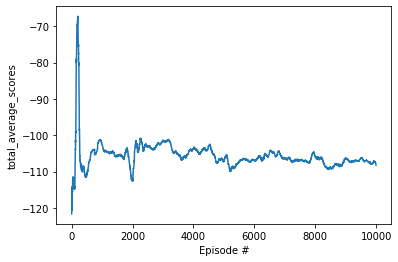

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

In [14]:
glosses = np.array(losses)[0]

In [15]:
dlosses = -np.array(losses)[1]

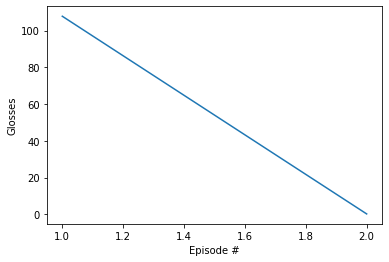

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(glosses)+1), glosses)
plt.ylabel('Glosses')
plt.xlabel('Episode #')
plt.show()

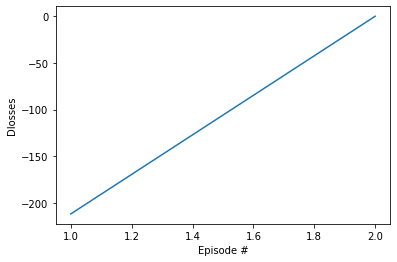

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(dlosses)+1), dlosses)
plt.ylabel('Dlosses')
plt.xlabel('Episode #')
plt.show()

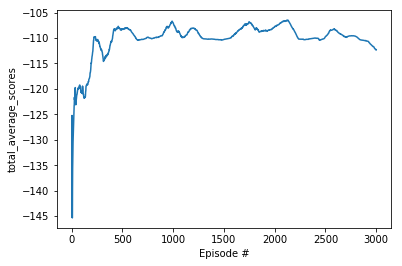

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

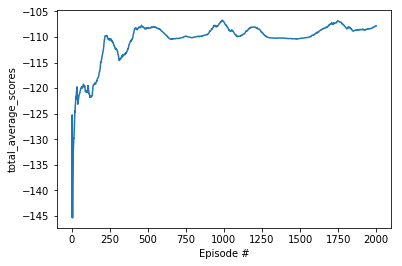

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

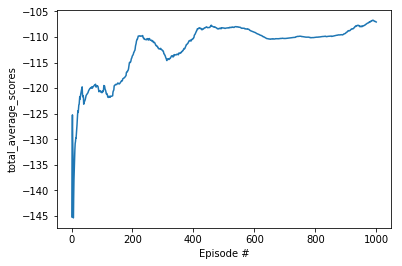

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [36]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-bipedal.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-bipedal.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)
# print(s.shape)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    #a = agent.act(s)
    #print(s.shape, a.shape)
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    #s2, r, done = env.step(a)
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

Average of total scores: -106.75700939138544


When finished, you can close the environment.

In [37]:
env.close()